In [60]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 999

In [61]:
# df = pd.read_csv('./datos/top_consultas.csv')

In [62]:
metadatos = pd.read_csv('./datos/series-tiempo-metadatos.csv')

distrib_consultas = metadatos.groupby(['distribucion_id', 'distribucion_titulo', 'indice_tiempo_frecuencia', 'distribucion_url_descarga'])[['consultas_180_dias']].sum()
distrib_consultas.to_csv('./datos/distrib_consultas.csv')

## Filtro por frecuencia de descarga 
x = distrib_consultas['consultas_180_dias'].sort_values(ascending=False)
(x.cumsum()/x.sum() < .9).sum() # 2630
x.iloc[:316].sort_index().to_csv('./datos/dist_top_consultas.csv')

In [63]:
# Leer el archivo CSV que contiene los valores de las series de tiempo en otro DataFrame\n,
series_tiempo_valores = pd.read_csv('./datos/series-tiempo-valores.csv')
# series_tiempo_valores = series_tiempo_valores.loc[series_tiempo_valores.serie_id.isin(top_series)] # Filtrar los IDs de las series principales\n,
series_tiempo_valores['indice_tiempo'] = pd.to_datetime(series_tiempo_valores['indice_tiempo']) # Convertir la columna 'indice_tiempo' al tipo de dato 'datetime'\n,
series_tiempo_valores.set_index('indice_tiempo', inplace=True)
numeric_df = series_tiempo_valores.select_dtypes(include=[np.number]) # Seleccionar las columnas numéricas del DataFrame filtrado\n,


In [64]:
## Organizar los datos

unstacked = series_tiempo_valores.reset_index().drop_duplicates().set_index(['indice_tiempo', 'serie_id', 'indice_tiempo_frecuencia'])['valor'].unstack(0).T
data = unstacked.loc['2000':'2023'].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0)

In [65]:
consultas = pd.read_csv('./datos/consultas.csv')
serie = pd.read_csv('./datos/serie.csv')


In [66]:
def show_summary_for_distribucion(distribucion_id, metadatos):
    # Filter the metadata for the given distribucion_id
    filtered_metadata = metadatos[metadatos['distribucion_id'] == distribucion_id]
    
    # Find and print unique values for all columns where nunique == 1
    print(f"Summary for distribucion_id: {distribucion_id}\n")
    for column in filtered_metadata.columns:
        if filtered_metadata[column].nunique() == 1:
            print(f"{column}: {filtered_metadata[column].iloc[0]}")
    
    # Print the non-unique values with drop_duplicates for specified columns
    non_unique_columns = ['serie_id', 'serie_titulo', 'serie_descripcion', 'serie_valor_ultimo',
                          'consultas_180_dias']
    print("\nDetails of non-unique columns:")

    unique_values = filtered_metadata[non_unique_columns].drop_duplicates().sort_values('serie_valor_ultimo', ascending = False)
    display(unique_values)

## Macroeconomía y Producción Nacional:

- Producto Interno Bruto (PIB)
- Oferta y Demanda Global
- Valor Agregado Bruto sectorial

### Producto Interno Bruto (PIB):

In [67]:
show_summary_for_distribucion(6.2, metadatos)

Summary for distribucion_id: 6.2

catalogo_id: sspm
dataset_id: 6
distribucion_id: 6.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Millones de pesos a precios de 2004
distribucion_titulo: Producto Interno Bruto. Precios constantes. Base 2004. Valores trimestrales.
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/6/distribution/6.2/download/producto-interno-bruto-valores-trimestrales-base-2004.csv
dataset_responsable: Producto Interno Bruto a Precios de Mercado. Precios constantes. Base 2004
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Producto Interno Bruto a Precios de Mercado. Precios constantes. Base 2004
dataset_descripcion: Valor agregado bruto sectorial a precios de productor en pesos constantes de 2004
dataset_tema: Actividad
serie_indice_inicio: 2004-01-01
serie_indice_final: 2023-04-01
serie_valores_cant: 78
serie_dias_no_cubiertos: 129
ser

serie_id  \
18116     6.2_PIBPM_2004_T_38   
18123     6.2_VABPB_2004_T_36   
18120       6.2_SPS_2004_T_30   
18119       6.2_SPB_2004_T_27   
18112        6.2_IM_2004_T_23   
18104      6.2_CMMR_2004_T_41   
18102      6.2_AIEA_2004_T_48   
18113      6.2_IPNS_2004_T_35   
18122       6.2_TAC_2004_T_40   
18114       6.2_IVA_2004_T_23   
18101      6.2_AGCS_2004_T_39   
18103  6.2_APDPSSAO_2004_T_60   
18108         6.2_E_2004_T_10   
18121       6.2_SSS_2004_T_24   
18107       6.2_EMC_2004_T_26   
18111        6.2_IF_2004_T_25   
18105         6.2_C_2004_T_12   
18115    6.2_OASCSP_2004_T_60   
18118      6.2_SEGA_2004_T_32   
18110        6.2_HR_2004_T_20   
18106        6.2_DI_2004_T_20   
18109      6.2_HPSD_2004_T_32   
18117          6.2_P_2004_T_5   

                                                       serie_titulo  \
18116                        producto_interno_bruto_precios_mercado   
18123                          valor_agregado_bruto_precios_basicos   
18120                                sectores_productores_servicios   
18119                                   sectores_productores_bienes   
18112                                       industria_manufacturera   
18104                     comercio_mayorista_minorista_reparaciones   
18102              actividades_inmobiliarias_empresariales_alquiler   
18113                           impuestos_productos_netos_subsidios   
18122                      transporte_almacenamiento_comunicaciones   
18114                                       impuesto_valor_agregado   
18101                       agricultura_ganaderia_caza_silvicultura   
18103  admin_publica_planes_seguridad_social_afiliacion_obligatoria   
18108                                                    ensenianza   
18121                                      servicios_sociales_salud   
18107                                    explotacion_minas_canteras   
18111                                     intermediacion_financiera   
18105                                                  construccion   
18115  otras_actividades_servicios_comunitarias_sociales_personales   
18118                              suministro_electricidad_gas_agua   
18110                                          hoteles_restaurantes   
18106                                          derechos_importacion   
18109                              hogares_privs_servicio_domestico   
18117                                                         pesca   

                                                                                                                                                      serie_descripcion  \
18116                                            Valor agregado bruto trimestral a precios de productor de producto interno bruto a precios de mercado en pesos de 2004   
18123                                                 Valor agregado bruto trimestral a precios de productor de valor agregado bruto a precios básicos en pesos de 2004   
18120                                                      Valor agregado bruto trimestral a precios de productor de sectores productores de servicios en pesos de 2004   
18119                                                         Valor agregado bruto trimestral a precios de productor de sectores productores de bienes en pesos de 2004   
18112                                                                Valor agregado bruto trimestral a precios de productor de industria manufacturera en pesos de 2004   
18104                                          Valor agregado bruto trimestral a precios de productor de comercio mayorista y minorista y reparaciones en pesos de 2004   
18102                                  Valor agregado bruto trimestral a precios de productor de actividades inmobiliarias empresariales y de alquiler en pesos de 2004   
18113                                           Valor agregado bruto trimestral a precios de productor de impuestos a los productos netos de subsidios en p

In [68]:
selected = ['6.2_IM_2004_T_23', '6.2_SPB_2004_T_27', '6.2_SPS_2004_T_30', '6.2_VABPB_2004_T_36', '6.2_PIBPM_2004_T_38', '6.2_CMMR_2004_T_41']

<Axes: xlabel='indice_tiempo'>

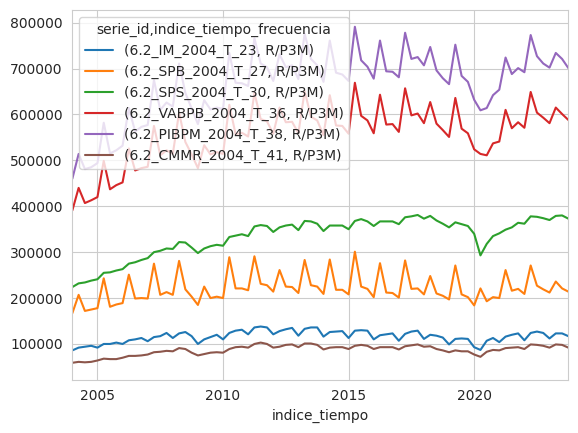

In [69]:
filtered_data = data[selected]

plot_data = filtered_data.dropna(how = 'all').round(-3).astype(int)

plot_data.plot()

### Oferta y Demanda Global:

In [70]:
show_summary_for_distribucion(2.1, metadatos)

Summary for distribucion_id: 2.1

catalogo_id: sspm
dataset_id: 2
distribucion_id: 2.1
indice_tiempo_frecuencia: R/P1Y
serie_unidades: Millones de pesos a precios de 1993
distribucion_titulo: Oferta y Demanda Global. Precios constantes. Base 1993. Valores anuales.
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/2/distribution/2.1/download/oferta-demanda-globales-valores-anuales-base-1993.csv
dataset_responsable: Oferta y Demanda Globales. Base 1993
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Oferta y Demanda Globales. Base 1993
dataset_descripcion: Componentes de la oferta y demanda globales, según la base 1993.
dataset_tema: Actividad
serie_indice_inicio: 1993-01-01
serie_indice_final: 2012-01-01
serie_valores_cant: 20
serie_dias_no_cubiertos: 3962
serie_actualizada: False
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
4956        2.1_OGT_1993_A_19   
4953        2.1_DGT_1993_A_20   
4955        2.1_OGP_1993_A_17   
4939       2.1_DGCP_1993_A_27   
4952        2.1_DGI_1993_A_19   
4954        2.1_OGI_1993_A_25   
4940       2.1_DGCP_1993_A_30   
4942       2.1_DGIC_1993_A_32   
4941        2.1_DGE_1993_A_26   
4951     2.1_DGIEDP_1993_A_45   
4946  2.1_DGIEDPMET_1993_A_51   
4943    2.1_DGIEDPI_1993_A_55   
4944  2.1_DGIEDPMEI_1993_A_55   
4950    2.1_DGIEDPN_1993_A_54   
4949  2.1_DGIEDPMTT_1993_A_53   
4945  2.1_DGIEDPMEN_1993_A_54   
4947  2.1_DGIEDPMTI_1993_A_57   
4948  2.1_DGIEDPMTN_1993_A_56   
4938       2.1_DEVE_1993_A_46   

                                                   serie_titulo  \
4956                                        oferta_global_total   
4953                                       demanda_global_total   
4955                                          oferta_global_pib   
4939                                demanda_global_consumo_priv   
4952                                        demanda_global_ibif   
4954                                  oferta_global_importacion   
4940                             demanda_global_consumo_publico   
4942                           demanda_global_ibif_construccion   
4941                                 demanda_global_exportacion   
4951              demanda_global_ibif_equipo_durable_produccion   
4946        dg_ibif_equipo_durable_prod_maquinaria_equipo_total   
4943    demanda_global_ibif_equipo_durable_produccion_importado   
4944    dg_ibif_equipo_durable_prod_maquinaria_equipo_importado   
4950     demanda_global_ibif_equipo_durable_produccion_nacional   
4949      dg_ibif_equipo_durable_prod_material_transporte_total   
4945     dg_ibif_equipo_durable_prod_maquinaria_equipo_nacional   
4947  dg_ibif_equipo_durable_prod_material_transporte_importado   
4948   dg_ibif_equipo_durable_prod_material_transporte_nacional   
4938             discrepancia_estadistica_variacion_existencias   

                                                                                                  serie_descripcion  \
4956                              Oferta global total a precios de comprador, en millones de pesos de 1993 y Anual.   
4953                                                     Demanda global total, en millones de pesos de 1993 y Anual   
4955                                              PIB a precios de comprador, en millones de pesos de 1993 y Anual.   
4939                                                         Consumo privado, en millones de pesos de 1993 y Anual.   
4952                                            Inversion bruta interna fija, en millones de pesos de 1993 y Anual.   
4954                                      Importación a precios de comprador, en millones de pesos de 1993 y Anual.   
4940                                                         Consumo publico, en millones de pesos de 1993 y Anual.   
4942                            Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Anual.   
4941                                                           Exportaciones, en millones de pesos de 1993 y Anual.   
4951            Inversion bruta interna fija de equipo durable de produccion, en millones de pesos de 1993 y Anual.   
4946               Inversion bruta interna fija de maquinaria y equipo total, en millones de pesos de 1993 y Anual.   
4943  Inversion bruta interna fija de equipo durable de produccion importado, en millones de pesos de 1993 y Anual.   
4944           Inversion bruta interna fija de maquinaria y equipo importado, en millones de pesos de 1993 y Anual.   
4950   Inversion bruta interna fija de equipo durable de produccion nacional, en millones de pesos de 1993 y Anual.   
4949            Inversion bruta interna fija de material de transporte total, en millones de pesos de 1993 y Anual.   
4945            Inversion bruta interna fija de maquinaria y equipo nacional, en millones de pesos de 1993 y Anual.

In [71]:
show_summary_for_distribucion(3.2, metadatos)

Summary for distribucion_id: 3.2

catalogo_id: sspm
dataset_id: 3
distribucion_id: 3.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Millones de pesos a precios de 2004
distribucion_titulo: Oferta y Demanda Global. Precios constantes desestacionalizados. Base 2004. Valores trimestrales.
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/3/distribution/3.2/download/oferta-demanda-globales-datos-desestacionalizados-valores-trimestral-base-2004.csv
dataset_responsable: Oferta y Demanda Globales. Datos desestacionalizados. Base 2004
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Oferta y Demanda Globales. Datos desestacionalizados. Base 2004
dataset_descripcion: Componentes desestacionalizados de la oferta y demanda globales a precios de 2004.
dataset_tema: Actividad
serie_indice_inicio: 2004-01-01
serie_indice_final: 2023-04-01
serie_valores_cant: 78
serie_d

serie_id                    serie_titulo  \
5377   3.2_OGP_D_2004_T_17               oferta_global_pib   
5373  3.2_DGCP_D_2004_T_30  demanda_global_consumo_publico   
5376   3.2_OGI_D_2004_T_25       oferta_global_importacion   
5375   3.2_DGI_D_2004_T_19             demanda_global_ibif   
5374   3.2_DGE_D_2004_T_26      demanda_global_exportacion   
5372  3.2_DGCP_D_2004_T_27     demanda_global_consumo_priv   

                                                                      serie_descripcion  \
5377  Oferta global total a precios de comprador, en millones de pesos de 2004 y Anual.   
5373                             Consumo publico, en millones de pesos de 2004 y Anual.   
5376     Importación a precios de comprador, en millones de pesos de 2004 y Trimestral.   
5375                Inversion bruta interna fija, en millones de pesos de 2004 y Anual.   
5374     Exportación a precios de comprador, en millones de pesos de 2004 y Trimestral.   
5372                             Consumo privado, en millones de pesos de 2004 y Anual.   

      serie_valor_ultimo  consultas_180_dias  
5377       706412.472253                1609  
5373       526990.057826                1606  
5376       211662.669816                 124  
5375       156803.216072                 119  
5374       136901.886715                 100  
5372        99442.567911                 120

<Axes: xlabel='indice_tiempo'>

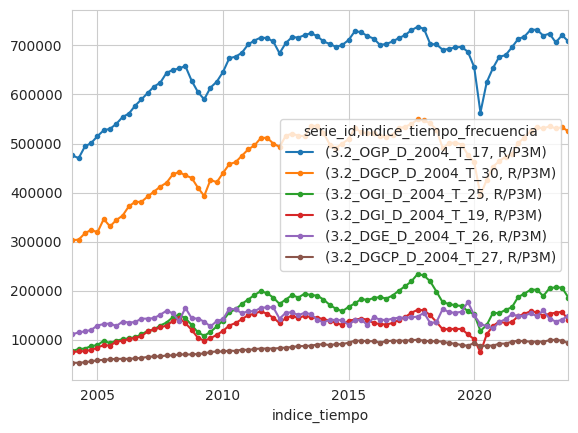

In [72]:
selected = ['3.2_OGP_D_2004_T_17', '3.2_DGCP_D_2004_T_30', '3.2_OGI_D_2004_T_25', '3.2_DGI_D_2004_T_19', '3.2_DGE_D_2004_T_26', '3.2_DGCP_D_2004_T_27']
filtered_data = data[selected]

plot_data = filtered_data.dropna(how = 'all').round(-3).astype(int)

plot_data.plot(marker = '.')


In [73]:
show_summary_for_distribucion(4.2, metadatos)

Summary for distribucion_id: 4.2

catalogo_id: sspm
dataset_id: 4
distribucion_id: 4.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Millones de pesos a precios de 2004
distribucion_titulo: Oferta y Demanda Global, Precios constantes. Base 2004. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/4/distribution/4.2/download/oferta-demanda-globales-precios-2004-valores-trimestrales-base-2004.csv
dataset_responsable: Oferta y Demanda Globales. Base 2004
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Oferta y Demanda Globales. Base 2004
dataset_descripcion: Componentes de la oferta y demanda globales, según la base 2004.
dataset_tema: Actividad
serie_indice_final: 2023-04-01
serie_dias_no_cubiertos: 129
serie_actualizada: True
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
15349               4.2_DGT_2004_T_20   
15354               4.2_OGT_2004_T_19   
15353               4.2_OGP_2004_T_17   
15350              4.2_MGCP_2004_T_25   
15352               4.2_OGI_2004_T_25   
15348              4.2_DGIT_2004_T_25   
15335               4.2_DGE_2004_T_26   
15334              4.2_DGCP_2004_T_30   
15345            4.2_DGIEDP_2004_T_45   
15340         4.2_DGIEDPMET_2004_T_51   
15336              4.2_DGIC_2004_T_32   
15344           4.2_DGIEDPN_2004_T_54   
15337           4.2_DGIEDPI_2004_T_55   
15338         4.2_DGIEDPMEI_2004_T_55   
15339         4.2_DGIEDPMEN_2004_T_54   
15343         4.2_DGIEDPMTT_2004_T_53   
15342         4.2_DGIEDPMTN_2004_T_56   
15347             4.2_DGIOC_2004_T_40   
15341         4.2_DGIEDPMTI_2004_T_57   
15346            4.2_DGIOAF_2004_T_39   
15351  4.2_OBJETOS_VASOS_2004_T_16_84   
15333                4.2_DE_2004_T_24   
15355                4.2_VE_2004_T_21   

                                                    serie_titulo  \
15349                                       demanda_global_total   
15354                                        oferta_global_total   
15353                                          oferta_global_pib   
15350                                  manda_global_consumo_priv   
15352                                  oferta_global_importacion   
15348                                  demanda_global_ibif_total   
15335                                 demanda_global_exportacion   
15334                             demanda_global_consumo_publico   
15345              demanda_global_ibif_equipo_durable_produccion   
15340        dg_ibif_equipo_durable_prod_maquinaria_equipo_total   
15336                           demanda_global_ibif_construccion   
15344     demanda_global_ibif_equipo_durable_produccion_nacional   
15337    demanda_global_ibif_equipo_durable_produccion_importado   
15338    dg_ibif_equipo_durable_prod_maquinaria_equipo_importado   
15339     dg_ibif_equipo_durable_prod_maquinaria_equipo_nacional   
15343      dg_ibif_equipo_durable_prod_material_transporte_total   
15342   dg_ibif_equipo_durable_prod_material_transporte_nacional   
15347                   demanda_global_ibif_otras_construcciones   
15341  dg_ibif_equipo_durable_prod_material_transporte_importado   
15346                    demanda_global_ibif_otros_activos_fijos   
15351                                           objetos_valiosos   
15333                                   discrepancia_estadistica   
15355                                      variacion_existencias   

                                                                                                        serie_descripcion  \
15349                                                     Demanda global total, en millones de pesos de 2004 y Trimestral   
15354                              Oferta global total a precios de comprador, en millones de pesos de 2004 y Trimestral.   
15353                                              PIB a precios de comprador, en millones de pesos de 2004 y Trimestral.   
15350                                                         Consumo privado, en millones de pesos de 2004 y Trimestral.   
15352                                      Importación a precios de comprador, en millones de pesos de 2004 y Trimestral.   
15348                                            Inversion bruta interna fija, en millones de pesos de 2004 y Trimestral.   
15335                                                            Exportaciones, en millones de pesos de 2004 y Trimestral   
15334                                                         Consumo publico, en millones de pesos de 2004 y Trimestral.   
15345            Inversion bruta interna fija de equipo durable de produccion, en millones de pesos de 2004 y Trimestral.   
15340               Inversion bruta interna fija de maquinaria y equipo total, en millones de pesos de 2004 y Trimestral.   
15336                            Inv

### Valor Agregado Bruto sectorial:

In [74]:
show_summary_for_distribucion(5.1, metadatos)

Summary for distribucion_id: 5.1

catalogo_id: sspm
dataset_id: 5
distribucion_id: 5.1
indice_tiempo_frecuencia: R/P1Y
serie_unidades: Millones de pesos a precios de 1993
distribucion_titulo: Valor agregado bruto sectorial a precios de productor. Base 1993. Datos Anuales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/5/distribution/5.1/download/producto-interno-bruto-valores-anuales-base-1993.csv
dataset_responsable: Producto Interno Bruto a precios de mercado - Valor Agregado Bruto a precios de productor. Base 1993
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Producto Interno Bruto a precios de mercado - Valor Agregado Bruto a precios de productor. Base 1993
dataset_descripcion: Valor agregado bruto sectorial a precios de productor en pesos constantes de 1993
dataset_tema: Actividad
serie_indice_inicio: 1993-01-01
serie_indice_final: 2012-01-01
serie

serie_id  \
17976     5.1_VABPP_1993_A_38   
17974       5.1_SPS_1993_A_30   
17973       5.1_SPB_1993_A_27   
17967        5.1_IM_1993_A_23   
17960      5.1_CMMR_1993_A_41   
17975       5.1_TAC_1993_A_40   
17958      5.1_AIEA_1993_A_48   
17963      5.1_ESSS_1993_A_35   
17968       5.1_IVA_1993_A_23   
17965        5.1_IF_1993_A_25   
17961         5.1_C_1993_A_12   
17969  5.1_OASCSPSD_1993_A_52   
17959       5.1_APD_1993_A_30   
17957      5.1_AGCS_1993_A_39   
17971      5.1_SEGA_1993_A_32   
17964        5.1_HR_1993_A_20   
17966        5.1_II_1993_A_22   
17972     5.1_SIFMI_1993_A_58   
17962       5.1_EMC_1993_A_26   
17970          5.1_P_1993_A_5   

                                                     serie_titulo  \
17976                      valor_agregado_bruto_precios_productor   
17974                              sectores_productores_servicios   
17973                                 sectores_productores_bienes   
17967                                     industria_manufacturera   
17960                   comercio_mayorista_minorista_reparaciones   
17975                    transporte_almacenamiento_comunicaciones   
17958            actividades_inmobiliarias_empresariales_alquiler   
17963                         ensenianza_servicios_sociales_salud   
17968                                     impuesto_valor_agregado   
17965                                   intermediacion_financiera   
17961                                                construccion   
17969        otras_actividades_servicios_soc_personales_domestico   
17959                              administracion_publica_defensa   
17957                     agricultura_ganaderia_caza_silvicultura   
17971                            suministro_electricidad_gas_agua   
17964                                        hoteles_restaurantes   
17966                                      impuesto_importaciones   
17972  servicios_intermediacion_financiera_medidos_indirectamente   
17962                                  explotacion_minas_canteras   
17970                                                       pesca   

                                                                                                                                                 serie_descripcion  \
17976                                           Valor agregado bruto anual a precios de productor, de valor agregado bruto a precios de productor en pesos de 1993   
17974                                                     Valor agregado bruto anual a precios de productor, de sectores productores de servicios en pesos de 1993   
17973                                                        Valor agregado bruto anual a precios de productor, de sectores productores de bienes en pesos de 1993   
17967                                                               Valor agregado bruto anual a precios de productor, de industria manufacturera en pesos de 1993   
17960                                         Valor agregado bruto anual a precios de productor, de comercio mayorista y minorista y reparaciones en pesos de 1993   
17975                                            Valor agregado bruto anual a precios de productor, de transporte almacenamiento y comunicaciones en pesos de 1993   
17958                                 Valor agregado bruto anual a precios de productor, de actividades inmobiliarias empresariales y de alquiler en pesos de 1993   
17963                                               Valor agregado bruto anual a precios de productor, de enseñanza servicios sociales y de salud en pesos de 1993   
17968                                                            Valor agregado bruto anual a precios de productor, de impuesto al valor agregado en pesos de 1993   
17965                                                             Valor agregado bruto anual a precios de productor, de intermediacion financiera en pesos de 1993   
17961                                              

## Índices de Obreros Ocupados (IOO)

### 16.2 Índices de Obreros Ocupados (IOO). Valores trimestrales.

In [75]:
show_summary_for_distribucion(16.2, metadatos)

Summary for distribucion_id: 16.2

catalogo_id: sspm
dataset_id: 16
distribucion_id: 16.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Índice 1997=100
distribucion_titulo: Índices de Obreros Ocupados (IOO). Valores trimestrales.
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/16/distribution/16.2/download/encuesta-industrial-indices-obreros-ocupados-valores-trimestrales-base-1997.csv
dataset_responsable: Índices de Obreros Ocupados (IOO)
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Índices de Obreros Ocupados (IOO)
dataset_descripcion: Índices de Obreros Ocupados (IOO) en la industria manufacturera.  Encuesta Industrial Base 1997
dataset_tema: Actividad
serie_indice_inicio: 1990-01-01
serie_dias_no_cubiertos: 2959
serie_actualizada: False
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
2623           16.2_FSPQ_1997_T_41   
2608        16.2_FCPRPCN_1997_T_54   
2610            16.2_FET_1997_T_29   
2617           16.2_FPCP_1997_T_37   
2615            16.2_FME_1997_T_30   
2607            16.2_EPT_1997_T_28   
2606           16.2_EPAB_1997_T_42   
2619          16.2_FPMNM_1997_T_44   
2624          16.2_FVARS_1997_T_58   
2625             16.2_NG_1997_T_13   
2614            16.2_FMC_1997_T_27   
2609         16.2_FEARTC_1997_T_60   
2613          16.2_FMCIM_1997_T_55   
2620           16.2_FPPP_1997_T_33   
2612           16.2_FMAE_1997_T_44   
2618        16.2_FPEMEME_1997_T_57   
2604     16.2_CTCFAMTCSP_1997_T_53   
2621            16.2_FPT_1997_T_30   
2605           16.2_EIRG_1997_T_42   
2611         16.2_FIMOPR_1997_T_58   
2626  16.2_PMFPMCEMFAPMT_1997_T_58   
2622         16.2_FPVTTP_1997_T_52   
2616          16.2_FMOCI_1997_T_55   

                                                      serie_titulo  \
2623                     fabricacion_sustancias_productos_quimicos   
2608        fab_coque_prod_refinacion_petroleo_combustible_nuclear   
2610                                 fabricacion_equipo_transporte   
2617                         fabricacion_productos_caucho_plastico   
2615                                fabricacion_maquinaria_equipos   
2607                                  elaboracion_productos_tabaco   
2606                    elaboracion_productos_alimenticios_bebidas   
2619                  fabricacion_productos_minerales_no_metalicos   
2624    fabricacion_vehiculos_automotores_remolques_semirremolques   
2625                                                 nivel_general   
2614                                   fabricacion_metales_comunes   
2609  fabricacion_equipos_aparatos_radio_television_comunicaciones   
2613       fabricacion_muebles_colchones_industrias_manufactureras   
2620                             fabricacion_papel_productos_papel   
2612                  fabricacion_maquinaria_aparatos_electronicos   
2618     fabricacion_productos_elaborados_metal_excepto_maquinaria   
2604         curtido_cueros_art_marroquineria_talabarteria_calzado   
2621                                fabricacion_productos_textiles   
2605                    edicion_impresion_reproduccion_grabaciones   
2611    fabricacion_instrumentos_medicos_opticos_precision_relojes   
2626    prod_madera_fab_corcho_excepto_muebles_art_paja_trenzables   
2622          fabricacion_prendas_vestir_terminacion_tenido_pieles   
2616       fabricacion_maquinaria_oficina_contabilidad_informatica   

                                                                                                                                           serie_descripcion  \
2623                                                                  Índice de Obreros Ocupados (IOO). Fabricación sustencias y productos químicos. Anuales   
2608            Índice de Obreros Ocupados (IOO). Fabricación de coque, productos de la refinación del petroleo, combustibles y productos nucleares. Anuales   
2610                                                                         Índice de Obreros Ocupados (IOO). Fabricación de equipos de transporte. Anuales   
2617                                                                           Índice de Obreros Ocupados (IOO). Fabricación de productos de caucho. Anuales   
2615                                                                             Índice de Obreros Ocupados (IOO). Fabricación maquinaria y equipos. Anuales   
2607                                                                          Índice de Obreros Ocupados (IOO). Elaboración de productos con tabaco. Anuales   
2606                                                              Índice de Obreros Ocupados (IOO). Elaboración de productos alimenticios y bebidas. Anuales   
2619                                                              Índice de Obreros Ocupados (IOO). Fabricación de productos minerales no metálicos. Anu

## Índices de Horas Trabajadas (IHT)

### 17.2 Índices de Horas trabajadas (IHT). Valores trimestrales.

In [76]:
show_summary_for_distribucion(17.2, metadatos)

Summary for distribucion_id: 17.2

catalogo_id: sspm
dataset_id: 17
distribucion_id: 17.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Índice 1997=100
distribucion_titulo: Índices de Horas trabajadas (IHT). Valores trimestrales.
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/17/distribution/17.2/download/encuesta-industrial-indices-horas-trabajadas-valores-trimestrales-base-1997.csv
dataset_responsable: Índices de Horas trabajadas (IHT)
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Índices de Horas trabajadas (IHT)
dataset_descripcion: Índices de Horas trabajadas (IHT) en la industria manufacturera.  Encuesta Industrial Base 1997
dataset_tema: Actividad
serie_indice_inicio: 1990-01-01
serie_dias_no_cubiertos: 2959
serie_actualizada: False
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
3724        17.2_FCPRPCN_1997_T_53   
3739           17.2_FSPQ_1997_T_41   
3723            17.2_EPT_1997_T_28   
3733           17.2_FPCP_1997_T_37   
3731            17.2_FME_1997_T_30   
3726            17.2_FET_1997_T_29   
3722           17.2_EPAB_1997_T_42   
3741             17.2_NG_1997_T_13   
3730            17.2_FMC_1997_T_27   
3735          17.2_FPMNM_1997_T_44   
3740          17.2_FVARS_1997_T_58   
3729          17.2_FMCIM_1997_T_55   
3725         17.2_FEARTC_1997_T_60   
3728           17.2_FMAE_1997_T_44   
3736           17.2_FPPP_1997_T_33   
3721           17.2_EIRG_1997_T_42   
3734        17.2_FPEMEME_1997_T_57   
3720     17.2_CTCFAMTCSP_1997_T_52   
3742  17.2_PMFPMCEMFAPMT_1997_T_56   
3737            17.2_FPT_1997_T_30   
3727         17.2_FIMOPR_1997_T_58   
3738         17.2_FPVTTP_1997_T_52   
3732          17.2_FMOCI_1997_T_55   

                                                      serie_titulo  \
3724         ab_coque_prod_refinacion_petroleo_combustible_nuclear   
3739                     fabricacion_sustancias_productos_quimicos   
3723                                  elaboracion_productos_tabaco   
3733                         fabricacion_productos_caucho_plastico   
3731                                fabricacion_maquinaria_equipos   
3726                                 fabricacion_equipo_transporte   
3722                    elaboracion_productos_alimenticios_bebidas   
3741                                                 nivel_general   
3730                                   fabricacion_metales_comunes   
3735                  fabricacion_productos_minerales_no_metalicos   
3740    fabricacion_vehiculos_automotores_remolques_semirremolques   
3729       fabricacion_muebles_colchones_industrias_manufactureras   
3725  fabricacion_equipos_aparatos_radio_television_comunicaciones   
3728                  fabricacion_maquinaria_aparatos_electronicos   
3736                             fabricacion_papel_productos_papel   
3721                    edicion_impresion_reproduccion_grabaciones   
3734     fabricacion_productos_elaborados_metal_excepto_maquinaria   
3720          curtido_terminacion_cueros_fab_marroq_talaba_calzado   
3742      fabricacion_prod_madera_corcho_no_muebles_art_trenzables   
3737                                fabricacion_productos_textiles   
3727    fabricacion_instrumentos_medicos_opticos_precision_relojes   
3738          fabricacion_prendas_vestir_terminacion_tenido_pieles   
3732       fabricacion_maquinaria_oficina_contabilidad_informatica   

                                                                                                                                                serie_descripcion  \
3724            Índice de Horas trabajadas (IHT). Fabricación de coque, productos de la refinación del petroleo, combustibles y productos nucleares. Trimestrales   
3739                                                                  Índice de Horas trabajadas (IHT). Fabricación sustencias y productos químicos. Trimestrales   
3723                                                                          Índice de Horas trabajadas (IHT). Elaboración de productos con tabaco. Trimestrales   
3733                                                                           Índice de Horas trabajadas (IHT). Fabricación de productos de caucho. Trimestrales   
3731                                                                             Índice de Horas trabajadas (IHT). Fabricación maquinaria y equipos. Trimestrales   
3726                                                                         Índice de Horas trabajadas (IHT). Fabricación de equipos de transporte. Trimestrales   
3722                                                              Índice de Horas trabajadas (IHT). Elaboración de productos alimenticios y bebidas. Trimestrales   
3741                                                                                               Índice de Hor

## Índice de Salario por Obrero (ISO)

### 18.2 Índice de Salario por Obrero (ISO). Valores trimestrales.

In [77]:
show_summary_for_distribucion(18.2, metadatos)

Summary for distribucion_id: 18.2

catalogo_id: sspm
dataset_id: 18
distribucion_id: 18.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Índice 1997=100
distribucion_titulo: Índice de Salario por Obrero (ISO). Valores trimestrales.
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/18/distribution/18.2/download/encuesta-industrial-indices-salario-por-obrero-valores-trimestrales-base-1997.csv
dataset_responsable: Índice de Salario por Obrero (ISO)
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Índice de Salario por Obrero (ISO)
dataset_descripcion: Índice de Salario por Obrero (ISO) en la industria manufacturera.  Encuesta Industrial Base 1997
dataset_tema: Actividad
serie_indice_inicio: 1990-01-01
serie_dias_no_cubiertos: 2959
serie_actualizada: False
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
4453           18.2_EPAB_1997_T_42   
4472             18.2_NG_1997_T_13   
4469         18.2_FPVTTP_1997_T_52   
4473  18.2_PMFPMCEMFAPMT_1997_T_56   
4457            18.2_FET_1997_T_29   
4466          18.2_FPMNM_1997_T_44   
4470           18.2_FSPQ_1997_T_41   
4462            18.2_FME_1997_T_30   
4456         18.2_FEARTC_1997_T_52   
4468            18.2_FPT_1997_T_30   
4459           18.2_FMAE_1997_T_44   
4460          18.2_FMCIM_1997_T_55   
4461            18.2_FMC_1997_T_27   
4465        18.2_FPEMEME_1997_T_57   
4458         18.2_FIMOPR_1997_T_58   
4471          18.2_FVARS_1997_T_58   
4464           18.2_FPCP_1997_T_37   
4455        18.2_FCPRPCN_1997_T_53   
4467           18.2_FPPP_1997_T_33   
4451     18.2_CTCFAMTCSP_1997_T_53   
4452           18.2_EIRG_1997_T_42   
4454            18.2_EPT_1997_T_28   
4463          18.2_FMOCI_1997_T_55   

                                                    serie_titulo  \
4453                  elaboracion_productos_alimenticios_bebidas   
4472                                               nivel_general   
4469        fabricacion_prendas_vestir_terminacion_tenido_pieles   
4473    fabricacion_prod_madera_corcho_no_muebles_art_trenzables   
4457                               fabricacion_equipo_transporte   
4466                fabricacion_productos_minerales_no_metalicos   
4470                   fabricacion_sustancias_productos_quimicos   
4462                              fabricacion_maquinaria_equipos   
4456        fabricacion_aparatos_radio_television_comunicaciones   
4468                              fabricacion_productos_textiles   
4459                fabricacion_maquinaria_aparatos_electronicos   
4460     fabricacion_muebles_colchones_industrias_manufactureras   
4461                                 fabricacion_metales_comunes   
4465   fabricacion_productos_elaborados_metal_excepto_maquinaria   
4458  fabricacion_instrumentos_medicos_opticos_precision_relojes   
4471  fabricacion_vehiculos_automotores_remolques_semirremolques   
4464                       fabricacion_productos_caucho_plastico   
4455       ab_coque_prod_refinacion_petroleo_combustible_nuclear   
4467                           fabricacion_papel_productos_papel   
4451       curtido_term_cueros_fabricacion_marroq_talaba_calzado   
4452                  edicion_impresion_reproduccion_grabaciones   
4454                                elaboracion_productos_tabaco   
4463     fabricacion_maquinaria_oficina_contabilidad_informatica   

                                                                                                                                                   serie_descripcion  \
4453                                                              Índice de Salarios por Obrero (ISO). Elaboración de productos alimenticios y bebidas. Trimestrales   
4472                                                                                               Índice de Salarios por Obrero (ISO). Índice General. Trimestrales   
4469                                           Índice de Salarios por Obrero (ISO). Fabricación de prendas para vestir, terminación y tenido de pieles. Trimestrales   
4473  Índice de Salarios por Obrero (ISO). Producción y fabricación de productos de madera y corcho expto muebles y articulos de materiales trenzables. Trimestrales   
4457                                                                         Índice de Salarios por Obrero (ISO). Fabricación de equipos de transporte. Trimestrales   
4466                                                              Índice de Salarios por Obrero (ISO). Fabricación de productos minerales no metálicos. Trimestrales   
4470                                                                  Índice de Salarios por Obrero (ISO). Fabricación sustencias y productos químicos. Trimestrales   
4462                                                                             Índice de Salarios por Obrero (ISO). Fabricación maquin

## Tasa de actividad, empleo, desempleo, subocupación

### 43.2 Tasa de actividad. Valores trimestrales.

In [78]:
show_summary_for_distribucion(43.2, metadatos)

Summary for distribucion_id: 43.2

catalogo_id: sspm
dataset_id: 43
distribucion_id: 43.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Porcentaje
distribucion_titulo: Tasa de actividad. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/43/distribution/43.2/download/tasa-actividad-valores-trimestrales.csv
dataset_responsable: Principales variables ocupacionales. EPH continua. Actividad
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Principales variables ocupacionales. EPH continua. Actividad
dataset_descripcion: Tasa de actividad por aglomerados urbanos
dataset_tema: Empleo e Ingresos
serie_indice_final: 2023-04-01
serie_dias_no_cubiertos: 129
serie_actualizada: True
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
15766    43.2_ECTATC_0_T_38   
15772  43.2_ECTATGLP_0_T_47   
15763   43.2_ECTATBB_0_T_46   
15775   43.2_ECTATGR_0_T_46   
15770   43.2_ECTATGC_0_T_46   
15799  43.2_ECTATURG_0_T_52   
15792   43.2_ECTATRP_0_T_49   
15788    43.2_ECTATP_0_T_41   
15773   43.2_ECTATGM_0_T_46   
15783  43.2_ECTATMDP_0_T_47   
15774   43.2_ECTATGP_0_T_45   
15797   43.2_ECTATSR_0_T_44   
15780    43.2_ECTATG_0_T_37   
15801     43.2_ECTAT_0_T_33   
15790   43.2_ECTATRC_0_T_44   
15786    43.2_ECTATN_0_T_41   
15781    43.2_ECTATJ_0_T_39   
15765   43.2_ECTATCU_0_T_38   
15779   43.2_ECTATGT_0_T_46   
15791   43.2_ECTATRG_0_T_46   
15777  43.2_ECTATGSF_0_T_47   
15768    43.2_ECTATC_0_T_44   
15787   43.2_ECTATPG_0_T_46   
15782   43.2_ECTATLR_0_T_42   
15785   43.2_ECTATNO_0_T_42   
15795   43.2_ECTATSL_0_T_42   
15789    43.2_ECTATP_0_T_43   
15798    43.2_ECTATS_0_T_39   
15771   43.2_ECTATGC_0_T_48   
15793   43.2_ECTATRT_0_T_47   
15794  43.2_ECTATSDE_0_T_53   
15784   43.2_ECTATNE_0_T_42   
15778  43.2_ECTATGSJ_0_T_47   
15764   43.2_ECTATCR_0_T_52   
15776   43.2_ECTATGR_0_T_50   
15767    43.2_ECTATC_0_T_43   
15796   43.2_ECTATSN_0_T_45   
15800  43.2_ECTATVCP_0_T_57   
15769    43.2_ECTATF_0_T_41   

                                                    serie_titulo  \
15766                     eph_continua_tasa_actividad_total_caba   
15772            eph_continua_tasa_actividad_total_gran_la_plata   
15763             eph_continua_tasa_actividad_total_bahia_blanca   
15775             eph_continua_tasa_actividad_total_gran_rosario   
15770             eph_continua_tasa_actividad_total_gran_cordoba   
15799       eph_continua_tasa_actividad_total_ushuaia_rio_grande   
15792          eph_continua_tasa_actividad_total_region_pampeana   
15788                  eph_continua_tasa_actividad_total_posadas   
15773             eph_continua_tasa_actividad_total_gran_mendoza   
15783            eph_continua_tasa_actividad_total_mar_del_plata   
15774              eph_continua_tasa_actividad_total_gran_parana   
15797               eph_continua_tasa_actividad_total_santa_rosa   
15780                      eph_continua_tasa_actividad_total_gba   
15801                          eph_continua_tasa_actividad_total   
15790               eph_continua_tasa_actividad_total_rio_cuarto   
15786                  eph_continua_tasa_actividad_total_neuquen   
15781                    eph_continua_tasa_actividad_total_jujuy   
15765                     eph_continua_tasa_actividad_total_cuyo   
15779             eph_continua_tasa_actividad_total_gran_tucuman   
15791             eph_continua_tasa_actividad_total_rio_gallegos   
15777            eph_continua_tasa_actividad_total_gran_santa_fe   
15768               eph_continua_tasa_actividad_total_corrientes   
15787             eph_continua_tasa_actividad_total_partidos_gba   
15782                 eph_continua_tasa_actividad_total_la_rioja   
15785                 eph_continua_tasa_actividad_total_noroeste   
15795                 eph_continua_tasa_actividad_total_san_luis   
15789                eph_continua_tasa_actividad_total_patagonia   
15798                    eph_continua_tasa_actividad_total_salta   
15771           eph_continua_tasa_actividad_total_gran_catamarca   
15793            eph_continua_tasa_actividad_total_rawson_trelew   
15794      eph_continua_tasa_actividad_total_santiago_del_estero   
15784                 eph_continua_tasa_actividad_total_nordeste   
15778            eph_continua_tasa_actividad_total_gran_san_juan   
15764       eph_continua_tasa_actividad_total_comodoro_rivadavia   
15776         eph_continua_tasa_actividad_total_gran_resistencia   
15767                eph_continua_tasa_actividad_total_concordia   
15796              eph_continua_tasa_actividad_total_san_nicolas   
15800  eph_continua_tasa_actividad_total_viedma_carmen_patagones   
15769                  eph_continua_tasa_actividad_total_formosa   

                                                         

<Axes: xlabel='indice_tiempo'>

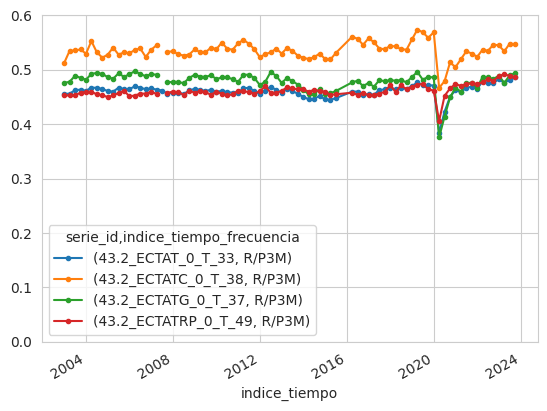

In [79]:
selected = ['43.2_ECTAT_0_T_33', '43.2_ECTATC_0_T_38', '43.2_ECTATG_0_T_37', '43.2_ECTATRP_0_T_49']
filtered_data = data[selected]
plot_data = filtered_data.dropna(how = 'all')

plot_data.plot(marker = '.', ylim=(0, .6))


### 44.2 Tasa de empleo. Valores trimestrales.

In [80]:
show_summary_for_distribucion(44.2, metadatos)

Summary for distribucion_id: 44.2

catalogo_id: sspm
dataset_id: 44
distribucion_id: 44.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Porcentaje
distribucion_titulo: Tasa de empleo. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/44/distribution/44.2/download/tasa-empleo-valores-trimestrales.csv
dataset_responsable: Principales variables ocupacionales. EPH continua. Empleo
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Principales variables ocupacionales. EPH continua. Empleo
dataset_descripcion: Tasa de empleo por aglomerados urbanos
dataset_tema: Empleo e Ingresos
serie_indice_final: 2023-04-01
serie_dias_no_cubiertos: 129
serie_actualizada: True
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
16143    44.2_ECTETC_0_T_35   
16149  44.2_ECTETGLP_0_T_44   
16140   44.2_ECTETBB_0_T_43   
16176  44.2_ECTETURG_0_T_49   
16152   44.2_ECTETGR_0_T_43   
16165    44.2_ECTETP_0_T_38   
16150   44.2_ECTETGM_0_T_43   
16169   44.2_ECTETRP_0_T_46   
16147   44.2_ECTETGC_0_T_43   
16151   44.2_ECTETGP_0_T_42   
16142   44.2_ECTETCU_0_T_35   
16174   44.2_ECTETSR_0_T_41   
16168   44.2_ECTETRG_0_T_43   
16172   44.2_ECTETSL_0_T_39   
16163    44.2_ECTETN_0_T_38   
16158    44.2_ECTETJ_0_T_36   
16178     44.2_ECTET_0_T_30   
16157    44.2_ECTETG_0_T_34   
16145    44.2_ECTETC_0_T_41   
16159   44.2_ECTETLR_0_T_39   
16160  44.2_ECTETMDP_0_T_44   
16171  44.2_ECTETSDE_0_T_50   
16167   44.2_ECTETRC_0_T_41   
16166    44.2_ECTETP_0_T_40   
16161   44.2_ECTETNE_0_T_39   
16156   44.2_ECTETGT_0_T_43   
16175    44.2_ECTETS_0_T_36   
16155  44.2_ECTETGSJ_0_T_44   
16148   44.2_ECTETGC_0_T_45   
16154  44.2_ECTETGSF_0_T_44   
16164   44.2_ECTETPG_0_T_43   
16162   44.2_ECTETNO_0_T_39   
16141   44.2_ECTETCR_0_T_49   
16170   44.2_ECTETRT_0_T_44   
16153   44.2_ECTETGR_0_T_47   
16177  44.2_ECTETVCP_0_T_54   
16144    44.2_ECTETC_0_T_40   
16173   44.2_ECTETSN_0_T_42   
16146    44.2_ECTETF_0_T_38   

                                                 serie_titulo  \
16143                     eph_continua_tasa_empleo_total_caba   
16149            eph_continua_tasa_empleo_total_gran_la_plata   
16140             eph_continua_tasa_empleo_total_bahia_blanca   
16176       eph_continua_tasa_empleo_total_ushuaia_rio_grande   
16152             eph_continua_tasa_empleo_total_gran_rosario   
16165                  eph_continua_tasa_empleo_total_posadas   
16150             eph_continua_tasa_empleo_total_gran_mendoza   
16169          eph_continua_tasa_empleo_total_region_pampeana   
16147             eph_continua_tasa_empleo_total_gran_cordoba   
16151              eph_continua_tasa_empleo_total_gran_parana   
16142                     eph_continua_tasa_empleo_total_cuyo   
16174               eph_continua_tasa_empleo_total_santa_rosa   
16168             eph_continua_tasa_empleo_total_rio_gallegos   
16172                 eph_continua_tasa_empleo_total_san_luis   
16163                  eph_continua_tasa_empleo_total_neuquen   
16158                    eph_continua_tasa_empleo_total_jujuy   
16178                          eph_continua_tasa_empleo_total   
16157                      eph_continua_tasa_empleo_total_gba   
16145               eph_continua_tasa_empleo_total_corrientes   
16159                 eph_continua_tasa_empleo_total_la_rioja   
16160            eph_continua_tasa_empleo_total_mar_del_plata   
16171      eph_continua_tasa_empleo_total_santiago_del_estero   
16167               eph_continua_tasa_empleo_total_rio_cuarto   
16166                eph_continua_tasa_empleo_total_patagonia   
16161                 eph_continua_tasa_empleo_total_noroeste   
16156             eph_continua_tasa_empleo_total_gran_tucuman   
16175                    eph_continua_tasa_empleo_total_salta   
16155            eph_continua_tasa_empleo_total_gran_san_juan   
16148           eph_continua_tasa_empleo_total_gran_catamarca   
16154            eph_continua_tasa_empleo_total_gran_santa_fe   
16164             eph_continua_tasa_empleo_total_partidos_gba   
16162                 eph_continua_tasa_empleo_total_nordeste   
16141       eph_continua_tasa_empleo_total_comodoro_rivadavia   
16170            eph_continua_tasa_empleo_total_rawson_trelew   
16153         eph_continua_tasa_empleo_total_gran_resistencia   
16177  eph_continua_tasa_empleo_total_viedma_carmen_patagones   
16144                eph_continua_tasa_empleo_total_concordia   
16173              eph_continua_tasa_empleo_total_san_nicolas   
16146                  eph_continua_tasa_empleo_total_formosa   

                                                       serie_descripcion  \
16143                          Tasa de empleo total CABA. En porcentaje.   
16149                 Tas

<Axes: xlabel='indice_tiempo'>

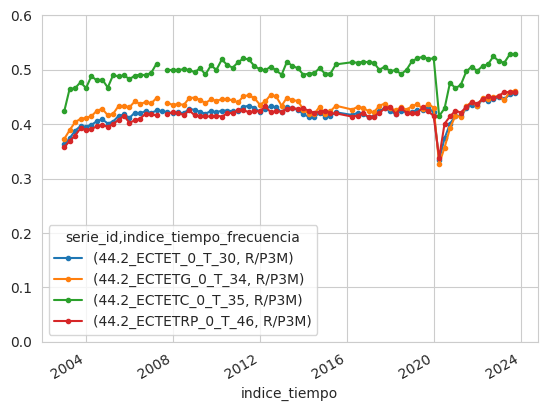

In [81]:
selected = ['44.2_ECTET_0_T_30', '44.2_ECTETG_0_T_34', '44.2_ECTETC_0_T_35', '44.2_ECTETRP_0_T_46']
filtered_data = data[selected]
plot_data = filtered_data.dropna(how = 'all')

plot_data.plot(marker = '.', ylim=(0, .6))


### 45.2 Tasa de desempleo. Valores trimestrales.

In [82]:
show_summary_for_distribucion(45.2, metadatos)

Summary for distribucion_id: 45.2

catalogo_id: sspm
dataset_id: 45
distribucion_id: 45.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Porcentaje
distribucion_titulo: Tasa de desempleo. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/45/distribution/45.2/download/tasa-desempleo-valores-trimestrales.csv
dataset_responsable: Principales variables ocupacionales. EPH continua. Desempleo
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Principales variables ocupacionales. EPH continua. Desempleo
dataset_descripcion: Tasa de desempleo por aglomerados urbanos
dataset_tema: Empleo e Ingresos
serie_indice_final: 2023-04-01
serie_dias_no_cubiertos: 129
serie_actualizada: True
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
17321   45.2_ECTDTGC_0_T_46   
17334  45.2_ECTDTMDP_0_T_47   
17328  45.2_ECTDTGSF_0_T_47   
17338   45.2_ECTDTPG_0_T_46   
17341   45.2_ECTDTRC_0_T_44   
17344   45.2_ECTDTRT_0_T_47   
17318    45.2_ECTDTC_0_T_43   
17343   45.2_ECTDTRP_0_T_49   
17331    45.2_ECTDTG_0_T_37   
17347   45.2_ECTDTSN_0_T_45   
17330   45.2_ECTDTGT_0_T_46   
17352     45.2_ECTDT_0_T_33   
17325   45.2_ECTDTGP_0_T_45   
17314   45.2_ECTDTBB_0_T_46   
17348   45.2_ECTDTSR_0_T_44   
17332    45.2_ECTDTJ_0_T_39   
17327   45.2_ECTDTGR_0_T_50   
17337    45.2_ECTDTN_0_T_41   
17323  45.2_ECTDTGLP_0_T_47   
17326   45.2_ECTDTGR_0_T_46   
17324   45.2_ECTDTGM_0_T_46   
17336   45.2_ECTDTNO_0_T_42   
17349    45.2_ECTDTS_0_T_39   
17322   45.2_ECTDTGC_0_T_48   
17319    45.2_ECTDTC_0_T_44   
17340    45.2_ECTDTP_0_T_43   
17335   45.2_ECTDTNE_0_T_42   
17316   45.2_ECTDTCU_0_T_38   
17333   45.2_ECTDTLR_0_T_42   
17339    45.2_ECTDTP_0_T_41   
17317    45.2_ECTDTC_0_T_38   
17342   45.2_ECTDTRG_0_T_46   
17350  45.2_ECTDTURG_0_T_52   
17315   45.2_ECTDTCR_0_T_52   
17329  45.2_ECTDTGSJ_0_T_47   
17346   45.2_ECTDTSL_0_T_42   
17320    45.2_ECTDTF_0_T_41   
17345  45.2_ECTDTSDE_0_T_53   
17351  45.2_ECTDTVCP_0_T_57   

                                                    serie_titulo  \
17321             eph_continua_tasa_desempleo_total_gran_cordoba   
17334            eph_continua_tasa_desempleo_total_mar_del_plata   
17328            eph_continua_tasa_desempleo_total_gran_santa_fe   
17338             eph_continua_tasa_desempleo_total_partidos_gba   
17341               eph_continua_tasa_desempleo_total_rio_cuarto   
17344            eph_continua_tasa_desempleo_total_rawson_trelew   
17318                eph_continua_tasa_desempleo_total_concordia   
17343          eph_continua_tasa_desempleo_total_region_pampeana   
17331                      eph_continua_tasa_desempleo_total_gba   
17347              eph_continua_tasa_desempleo_total_san_nicolas   
17330             eph_continua_tasa_desempleo_total_gran_tucuman   
17352                          eph_continua_tasa_desempleo_total   
17325              eph_continua_tasa_desempleo_total_gran_parana   
17314             eph_continua_tasa_desempleo_total_bahia_blanca   
17348               eph_continua_tasa_desempleo_total_santa_rosa   
17332                    eph_continua_tasa_desempleo_total_jujuy   
17327         eph_continua_tasa_desempleo_total_gran_resistencia   
17337                  eph_continua_tasa_desempleo_total_neuquen   
17323            eph_continua_tasa_desempleo_total_gran_la_plata   
17326             eph_continua_tasa_desempleo_total_gran_rosario   
17324             eph_continua_tasa_desempleo_total_gran_mendoza   
17336                 eph_continua_tasa_desempleo_total_noroeste   
17349                    eph_continua_tasa_desempleo_total_salta   
17322           eph_continua_tasa_desempleo_total_gran_catamarca   
17319               eph_continua_tasa_desempleo_total_corrientes   
17340                eph_continua_tasa_desempleo_total_patagonia   
17335                 eph_continua_tasa_desempleo_total_nordeste   
17316                     eph_continua_tasa_desempleo_total_cuyo   
17333                 eph_continua_tasa_desempleo_total_la_rioja   
17339                  eph_continua_tasa_desempleo_total_posadas   
17317                     eph_continua_tasa_desempleo_total_caba   
17342             eph_continua_tasa_desempleo_total_rio_gallegos   
17350       eph_continua_tasa_desempleo_total_ushuaia_rio_grande   
17315       eph_continua_tasa_desempleo_total_comodoro_rivadavia   
17329            eph_continua_tasa_desempleo_total_gran_san_juan   
17346                 eph_continua_tasa_desempleo_total_san_luis   
17320                  eph_continua_tasa_desempleo_total_formosa   
17345      eph_continua_tasa_desempleo_total_santiago_del_estero   
17351  eph_continua_tasa_desempleo_total_viedma_carmen_patagones   

                                                         

/tmp/ipykernel_377955/1087993336.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_data.plot(marker = '.', ylim=(0, .25))
/tmp/ipykernel_377955/1087993336.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_data.plot(marker = '.', ylim=(0, .25))
/tmp/ipykernel_377955/1087993336.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_data.plot(marker = '.', ylim=(0, .25))
/tmp/ipykernel_377955/1087993336.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_data.plot(marker = '.', ylim=(0, .25))


<Axes: xlabel='indice_tiempo'>

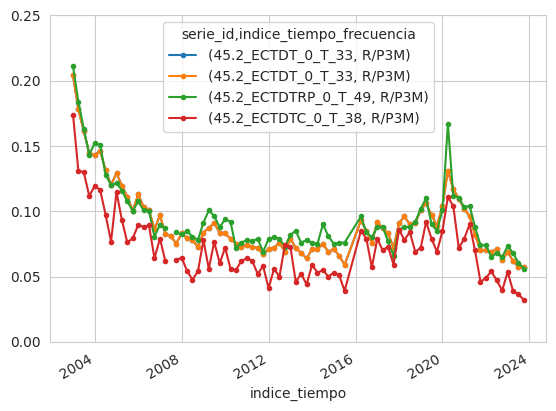

In [83]:
selected = ['45.2_ECTDT_0_T_33', '45.2_ECTDT_0_T_33', '45.2_ECTDTRP_0_T_49', '45.2_ECTDTC_0_T_38']
filtered_data = data[selected]
plot_data = filtered_data.dropna(how = 'all')

plot_data.plot(marker = '.', ylim=(0, .25))


### 47.2 Tasa de subocupación demandante. Valores trimestrales.

In [84]:
show_summary_for_distribucion(47.2, metadatos)

Summary for distribucion_id: 47.2

catalogo_id: sspm
dataset_id: 47
distribucion_id: 47.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Porcentaje
distribucion_titulo: Tasa de subocupación demandante. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/47/distribution/47.2/download/tasa-subocupacion-demandante-valores-trimestrales.csv
dataset_responsable: Principales variables ocupacionales. EPH continua. Subocupación demandante
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Principales variables ocupacionales. EPH continua. Subocupación demandante
dataset_descripcion: Tasa de subocupación demanadante por aglomerados urbanos
dataset_tema: Empleo e Ingresos
serie_indice_final: 2023-04-01
serie_dias_no_cubiertos: 129
serie_actualizada: True
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
17822   47.2_ECTSDTGM_0_T_60   
17820   47.2_ECTSDTGC_0_T_60   
17831   47.2_ECTSDTLR_0_T_56   
17816    47.2_ECTSDTC_0_T_57   
17846   47.2_ECTSDTSR_0_T_58   
17814   47.2_ECTSDTCU_0_T_52   
17828   47.2_ECTSDTGT_0_T_60   
17821  47.2_ECTSDTGLP_0_T_50   
17837    47.2_ECTSDTP_0_T_55   
17839   47.2_ECTSDTRC_0_T_58   
17841   47.2_ECTSDTRP_0_T_52   
17827  47.2_ECTSDTGSJ_0_T_50   
17834   47.2_ECTSDTNO_0_T_56   
17823   47.2_ECTSDTGP_0_T_59   
17832  47.2_ECTSDTMDP_0_T_50   
17826  47.2_ECTSDTGSF_0_T_50   
17836   47.2_ECTSDTPG_0_T_60   
17850     47.2_ECTSDT_0_T_47   
17835    47.2_ECTSDTN_0_T_55   
17843  47.2_ECTSDTSDE_0_T_56   
17830    47.2_ECTSDTJ_0_T_53   
17847    47.2_ECTSDTS_0_T_53   
17829    47.2_ECTSDTG_0_T_51   
17812   47.2_ECTSDTBB_0_T_60   
17842   47.2_ECTSDTRT_0_T_50   
17848  47.2_ECTSDTURG_0_T_55   
17817    47.2_ECTSDTC_0_T_58   
17833   47.2_ECTSDTNE_0_T_56   
17819   47.2_ECTSDTGC_0_T_51   
17838    47.2_ECTSDTP_0_T_57   
17844   47.2_ECTSDTSL_0_T_56   
17840   47.2_ECTSDTRG_0_T_60   
17845   47.2_ECTSDTSN_0_T_59   
17818    47.2_ECTSDTF_0_T_55   
17825   47.2_ECTSDTGR_0_T_60   
17813   47.2_ECTSDTCR_0_T_55   
17815    47.2_ECTSDTC_0_T_52   
17824   47.2_ECTSDTGR_0_T_53   
17849  47.2_ECTSDTVCP_0_T_60   

                                                       serie_titulo  \
17822  eph_continua_tasa_subocupacion_demandante_total_gran_mendoza   
17820  eph_continua_tasa_subocupacion_demandante_total_gran_cordoba   
17831      eph_continua_tasa_subocupacion_demandante_total_la_rioja   
17816     eph_continua_tasa_subocupacion_demandante_total_concordia   
17846    eph_continua_tasa_subocupacion_demandante_total_santa_rosa   
17814          eph_continua_tasa_subocupacion_demandante_total_cuyo   
17828  eph_continua_tasa_subocupacion_demandante_total_gran_tucuman   
17821            eph_continuasubocup_demandante_total_gran_la_plata   
17837       eph_continua_tasa_subocupacion_demandante_total_posadas   
17839    eph_continua_tasa_subocupacion_demandante_total_rio_cuarto   
17841          eph_continuasubocup_demandante_total_region_pampeana   
17827            eph_continuasubocup_demandante_total_gran_san_juan   
17834      eph_continua_tasa_subocupacion_demandante_total_noroeste   
17823   eph_continua_tasa_subocupacion_demandante_total_gran_parana   
17832            eph_continuasubocup_demandante_total_mar_del_plata   
17826            eph_continuasubocup_demandante_total_gran_santa_fe   
17836  eph_continua_tasa_subocupacion_demandante_total_partidos_gba   
17850               eph_continua_tasa_subocupacion_demandante_total   
17835       eph_continua_tasa_subocupacion_demandante_total_neuquen   
17843      eph_continuasubocup_demandante_total_santiago_del_estero   
17830         eph_continua_tasa_subocupacion_demandante_total_jujuy   
17847         eph_continua_tasa_subocupacion_demandante_total_salta   
17829           eph_continua_tasa_subocupacion_demandante_total_gba   
17812  eph_continua_tasa_subocupacion_demandante_total_bahia_blanca   
17842            eph_continuasubocup_demandante_total_rawson_trelew   
17848       eph_continuasubocup_demandante_total_ushuaia_rio_grande   
17817    eph_continua_tasa_subocupacion_demandante_total_corrientes   
17833      eph_continua_tasa_subocupacion_demandante_total_nordeste   
17819           eph_continuasubocup_demandante_total_gran_catamarca   
17838     eph_continua_tasa_subocupacion_demandante_total_patagonia   
17844      eph_continua_tasa_subocupacion_demandante_total_san_luis   
17840  eph_continua_tasa_subocupacion_demandante_total_rio_gallegos   
17845   eph_continua_tasa_subocupacion_demandante_total_san_nicolas   
17818       eph_continua_tasa_subocupacion_demandante_total_formosa   
17825  eph_continua_tasa_subocupacion_demandante_total_gran_rosario   
17813       eph_continuasubocup_demandante_total_comodoro_rivadavia   
17815          eph_continua_tasa_subocupacion_demandante_total_caba   
17824         eph_continuasubocup_demanda

<Axes: xlabel='indice_tiempo'>

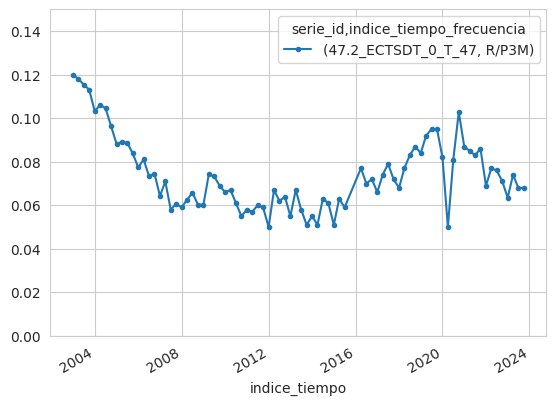

In [85]:
selected = ['47.2_ECTSDT_0_T_47']
filtered_data = data[selected]
plot_data = filtered_data.dropna(how = 'all')

plot_data.plot(marker = '.', ylim=(0, .15))


### 48.2 Tasa de subocupación no demandante. Valores trimestrales.

In [86]:
show_summary_for_distribucion(48.2, metadatos)

Summary for distribucion_id: 48.2

catalogo_id: sspm
dataset_id: 48
distribucion_id: 48.2
indice_tiempo_frecuencia: R/P3M
serie_unidades: Porcentaje
distribucion_titulo: Tasa de subocupación no demandante. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/48/distribution/48.2/download/tasa-subocupacion-no-demandante-valores-trimestrales.csv
dataset_responsable: Principales variables ocupacionales. EPH continua. Subocupación no demandante
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Principales variables ocupacionales. EPH continua. Subocupación no demandante
dataset_descripcion: Tasa de subocupación no demandante por aglomerados urbanos
dataset_tema: Empleo e Ingresos
serie_indice_final: 2023-04-01
serie_dias_no_cubiertos: 129
serie_actualizada: True
serie_discontinuada: False

Details of non-unique columns:


serie_id  \
17925    48.2_ECTSNDTS_0_T_56   
17918   48.2_ECTSNDTRG_0_T_52   
17901   48.2_ECTSNDTGP_0_T_51   
17905  48.2_ECTSNDTGSJ_0_T_53   
17892   48.2_ECTSNDTCU_0_T_55   
17893    48.2_ECTSNDTC_0_T_50   
17914   48.2_ECTSNDTPG_0_T_52   
17895    48.2_ECTSNDTC_0_T_60   
17900   48.2_ECTSNDTGM_0_T_52   
17896    48.2_ECTSNDTF_0_T_58   
17924   48.2_ECTSNDTSR_0_T_50   
17907    48.2_ECTSNDTG_0_T_54   
17912   48.2_ECTSNDTNO_0_T_59   
17906   48.2_ECTSNDTGT_0_T_52   
17928     48.2_ECTSNDT_0_T_50   
17922   48.2_ECTSNDTSL_0_T_59   
17926  48.2_ECTSNDTURG_0_T_58   
17908    48.2_ECTSNDTJ_0_T_56   
17910  48.2_ECTSNDTMDP_0_T_53   
17911   48.2_ECTSNDTNE_0_T_59   
17915    48.2_ECTSNDTP_0_T_58   
17894    48.2_ECTSNDTC_0_T_55   
17923   48.2_ECTSNDTSN_0_T_51   
17904  48.2_ECTSNDTGSF_0_T_53   
17919   48.2_ECTSNDTRP_0_T_55   
17909   48.2_ECTSNDTLR_0_T_59   
17903   48.2_ECTSNDTGR_0_T_56   
17916    48.2_ECTSNDTP_0_T_60   
17917   48.2_ECTSNDTRC_0_T_50   
17920   48.2_ECTSNDTRT_0_T_53   
17902   48.2_ECTSNDTGR_0_T_52   
17899  48.2_ECTSNDTGLP_0_T_53   
17890   48.2_ECTSNDTBB_0_T_52   
17897   48.2_ECTSNDTGC_0_T_52   
17913    48.2_ECTSNDTN_0_T_58   
17891   48.2_ECTSNDTCR_0_T_58   
17898   48.2_ECTSNDTGC_0_T_54   
17921  48.2_ECTSNDTSDE_0_T_59   
17927  48.2_ECTSNDTVCP_0_T_57   

                                                       serie_titulo  \
17925      eph_continua_tasa_subocupacion_no_demandante_total_salta   
17918          eph_continuasubocup_no_demandante_total_rio_gallegos   
17901           eph_continuasubocup_no_demandante_total_gran_parana   
17905         eph_continuasubocup_no_demandante_total_gran_san_juan   
17892       eph_continua_tasa_subocupacion_no_demandante_total_cuyo   
17893            eph_continuasubocup_no_demandante_total_corrientes   
17914          eph_continuasubocup_no_demandante_total_partidos_gba   
17895  eph_continua_tasa_subocupacion_no_demandante_total_concordia   
17900          eph_continuasubocup_no_demandante_total_gran_mendoza   
17896    eph_continua_tasa_subocupacion_no_demandante_total_formosa   
17924            eph_continuasubocup_no_demandante_total_santa_rosa   
17907        eph_continua_tasa_subocupacion_no_demandante_total_gba   
17912   eph_continua_tasa_subocupacion_no_demandante_total_noroeste   
17906          eph_continuasubocup_no_demandante_total_gran_tucuman   
17928            eph_continua_tasa_subocupacion_no_demandante_total   
17922   eph_continua_tasa_subocupacion_no_demandante_total_san_luis   
17926    eph_continuasubocup_no_demandante_total_ushuaia_rio_grande   
17908      eph_continua_tasa_subocupacion_no_demandante_total_jujuy   
17910         eph_continuasubocup_no_demandante_total_mar_del_plata   
17911   eph_continua_tasa_subocupacion_no_demandante_total_nordeste   
17915    eph_continua_tasa_subocupacion_no_demandante_total_posadas   
17894       eph_continua_tasa_subocupacion_no_demandante_total_caba   
17923           eph_continuasubocup_no_demandante_total_san_nicolas   
17904         eph_continuasubocup_no_demandante_total_gran_santa_fe   
17919       eph_continuasubocup_no_demandante_total_region_pampeana   
17909   eph_continua_tasa_subocupacion_no_demandante_total_la_rioja   
17903      eph_continuasubocup_no_demandante_total_gran_resistencia   
17916  eph_continua_tasa_subocupacion_no_demandante_total_patagonia   
17917            eph_continuasubocup_no_demandante_total_rio_cuarto   
17920         eph_continuasubocup_no_demandante_total_rawson_trelew   
17902          eph_continuasubocup_no_demandante_total_gran_rosario   
17899         eph_continuasubocup_no_demandante_total_gran_la_plata   
17890          eph_continuasubocup_no_demandante_total_bahia_blanca   
17897          eph_continuasubocup_no_demandante_total_gran_cordoba   
17913    eph_continua_tasa_subocupacion_no_demandante_total_neuquen   
17891    eph_continuasubocup_no_demandante_total_comodoro_rivadavia   
17898        eph_continuasubocup_no_demandante_total_gran_catamarca   
17

<Axes: xlabel='indice_tiempo'>

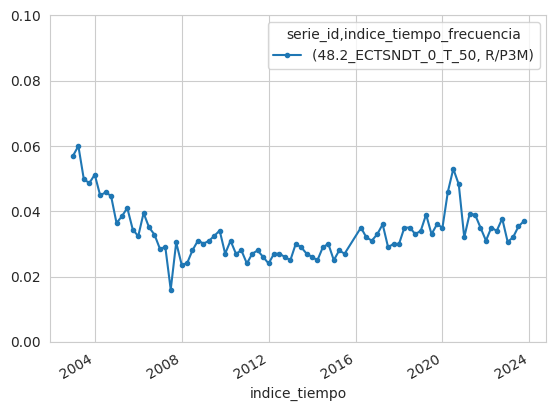

In [87]:
selected = ['48.2_ECTSNDT_0_T_50']
filtered_data = data[selected]
plot_data = filtered_data.dropna(how = 'all')

plot_data.plot(marker = '.', ylim=(0, .1))


In [88]:
# show_summary_for_distribucion(51.3, metadatos)

In [89]:
show_summary_for_distribucion(53.1, metadatos)

Summary for distribucion_id: 53.1

catalogo_id: sspm
dataset_id: 53
distribucion_id: 53.1
indice_tiempo_frecuencia: R/P3M
serie_unidades: Porcentaje
distribucion_titulo: Distribución funcional del ingreso en el total de la economía y en el sector privado. Como porcentaje del Producto Interno Bruto a costo de factores. Valores trimestrales
distribucion_descripcion: Subsecretaría de Programación Macroeconómica
distribucion_url_descarga: https://infra.datos.gob.ar/catalog/sspm/dataset/53/distribution/53.1/download/distribucion-funcional-ingreso-sector-privado-pib-costo-factores-anual.csv
dataset_responsable: Distribución funcional del ingreso respecto al Producto Interno Bruto
dataset_fuente: Instituto Nacional de Estadística y Censos (INDEC)
dataset_titulo: Distribución funcional del ingreso respecto al Producto Interno Bruto
dataset_descripcion: Distribución funcional del ingreso en el total de la economía y en el sector privado respecto al PIB a costo de factores
dataset_tema: Empleo e

serie_id                               serie_titulo  \
18029    53.1_TPC_0_0_12                               total_pib_cf   
18026    53.1_EBE_0_0_27                excedente_bruto_explotacion   
18030   53.1_TRTA_0_0_37      total_remuneracion_trabajo_asalariado   
18027   53.1_TIMB_0_0_25                  total_ingreso_mixto_bruto   
18028  53.1_TINSA_0_0_41  total_impuestos_netos_subsidios_actividad   

                                                  serie_descripcion  \
18029                                       PIB a costo de factores   
18026       Excedente bruto de explotación del total de la economía   
18030  Remuneración del trabajo asalariado del total de la economía   
18027                  Ingreso mixto bruto del total de la economía   
18028                   Impuestos netos de subsidios a la actividad   

       serie_valor_ultimo  consultas_180_dias  
18029               1.000                 143  
18026               0.454                1440  
18030               0.446                1448  
18027               0.128                1440  
18028              -0.028                1442

<Axes: xlabel='indice_tiempo'>

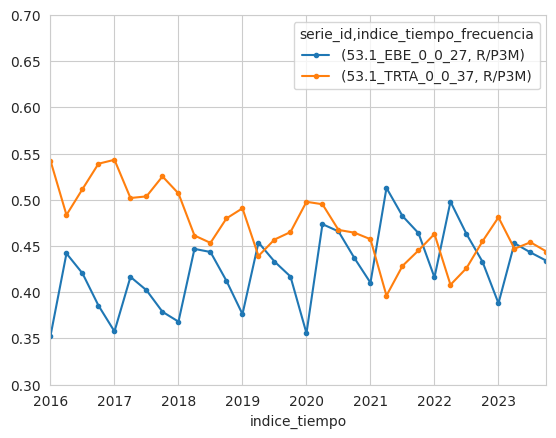

In [90]:
selected = ['53.1_EBE_0_0_27', '53.1_TRTA_0_0_37']
filtered_data = data[selected]
plot_data = filtered_data.dropna(how = 'all')

plot_data.plot(marker = '.', ylim=(.3, .7))


In [91]:


data_m = data.resample('M').mean()

In [92]:

# # Agrupar el DataFrame numérico por 'serie_id' y muestrear con frecuencia mensual, agregando los valores promedio\n,
# grouped_df = numeric_df.groupby(series_tiempo_valores.serie_id).resample('M').mean()

# # Restablecer el índice para convertir los datos agrupados en un DataFrame\n,
# grouped_df = grouped_df.reset_index()

In [93]:
import pandas as pd
import numpy as np

def compute_correlations(df, column_name, min_periods=1, method='pearson'):
    """
    Compute correlations of a specific column with all other columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which to compute correlations.
    min_periods (int): Minimum number of observations required per pair of columns to have a valid result.
    method (str): Method of correlation:
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation

    Returns:
    pd.Series: A Series containing the correlation coefficients.
    """
    # Find the full column tuple that corresponds to the given column name
    column_tuple = df.columns[df.columns.get_level_values(0) == column_name][0]
    
    
    # Select the column of interest
    target_series = df[column_tuple]
    
    # Initialize the result Series
    result = pd.Series(index=df.columns, dtype='float64')
    
    # Compute correlations
    for col in df.columns:
        valid = target_series.notna() & df[col].notna()
        if valid.sum() >= min_periods:
            result[col] = target_series[valid].corr(df[col][valid], method=method)
    
    # Drop the original column from the result
    result = result.drop(column_tuple)
    
    # Create a MultiIndex for the result
    result_index = pd.MultiIndex.from_tuples(result.index, names=['serie_id', 'indice_tiempo_frecuencia'])
    result.index = result_index
    
    result= result.reset_index().rename(columns = {0: 'corrw'})
    
    return result


In [94]:
def find_equivalent_series(df, consultas, series_info, focal_series, 
                            correlation_threshold=0.96, 
                            consultas_threshold=30, 
                            min_periods=20):
    """
    Find time series that are nearly equivalent to the focal series.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the time series data.
    consultas (pd.DataFrame): The DataFrame containing the consultation information.
    series_info (pd.DataFrame): The DataFrame containing additional information about the series.
    focal_series (str): The ID of the focal time series.
    correlation_threshold (float): The threshold for considering two series as nearly equivalent.
    consultas_threshold (int): The minimum number of consultations required to consider a series.
    min_periods (int): The minimum number of non-missing observations required to compute the correlation.

    Returns:
    pd.DataFrame: A DataFrame containing information about the nearly equivalent series.
    """
    # Compute correlations
    correlations = compute_correlations(df, focal_series, min_periods=min_periods)
    
    # Filter based on correlation threshold
    # correlations = correlations.fillna(0)
    equivalent_series = correlations[abs(correlations.corrw) > correlation_threshold].dropna()
    
    # Reset index for merging
    equivalent_series = equivalent_series.reset_index()
    
    # Merge with consultation information
    equivalent_series = equivalent_series.merge(consultas[['serie_id', 'consultas_180_dias']], 
                                                on='serie_id', how='left')
    
    # Merge with series information
    equivalent_series = equivalent_series.merge(series_info[['serie_id', 'serie_titulo', 
                                                             'serie_unidades', 'serie_descripcion']], 
                                                on='serie_id', how='left')
    
    # Filter based on consultation threshold
    equivalent_series = equivalent_series[equivalent_series.consultas_180_dias > consultas_threshold]
    
    # Sort results
    equivalent_series = equivalent_series.sort_values(by='serie_id')
    
    return equivalent_series


In [95]:
column = '38.3_CEM_1994_M_7'
threshold = 0.96
consultas_threshold = 30
min_periods = 20

result = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [96]:

# df = data_m
# consultas = consultas
# series_info = serie
# column = '38.3_CEM_1994_M_7'
# focal_series = column
# correlation_threshold = 0.96
# consultas_threshold = 30
# min_periods = 20

# # result = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)

# # def find_equivalent_series(df, consultas, series_info, focal_series, 
#                             # correlation_threshold=0.96, 
#                             # consultas_threshold=30, 
#                             # min_periods=20):

# # Compute correlations
# correlations = compute_correlations(df, focal_series, min_periods=min_periods)

# # Filter based on correlation threshold
# # correlations = correlations.fillna(0)
# equivalent_series = correlations[abs(correlations) > correlation_threshold].dropna()

# # Reset index for merging
# equivalent_series = equivalent_series.reset_index()

# # Merge with consultation information
# equivalent_series = equivalent_series.merge(consultas[['serie_id', 'consultas_180_dias']], 
#                                             on='serie_id', how='left')

# # Merge with series information
# equivalent_series = equivalent_series.merge(series_info[['serie_id', 'serie_titulo', 
#                                                             'serie_unidades', 'serie_descripcion']], 
#                                             on='serie_id', how='left')

# # Filter based on consultation threshold
# equivalent_series = equivalent_series[equivalent_series.consultas_180_dias > consultas_threshold]

# # Sort results
# equivalent_series = equivalent_series.sort_values(by='serie_id')

# equivalent_series

In [97]:
# correlations[abs(correlations.corrw) > correlation_threshold].dropna()
# abs(correlations)

In [98]:
# correlations.dtypes

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 120

In [100]:
column = '116.4_TCRZE_2015_D_36_4'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)

In [101]:
# Step 1: Extract 'serie_id' and 'indice_tiempo_frecuencia' values
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()

# Step 2: Use these tuples to select columns from 'data_m'
selected_data = data[series_tuples]

filtered_data = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('116.')]

# # Step 1: Create a dictionary for renaming series
# rename_dict = equivalent_series.set_index(['serie_id', 'indice_tiempo_frecuencia'])['serie_titulo'].to_dict()

# # Step 2: Rename the columns of filtered_data
# filtered_data = filtered_data.rename(columns=rename_dict)


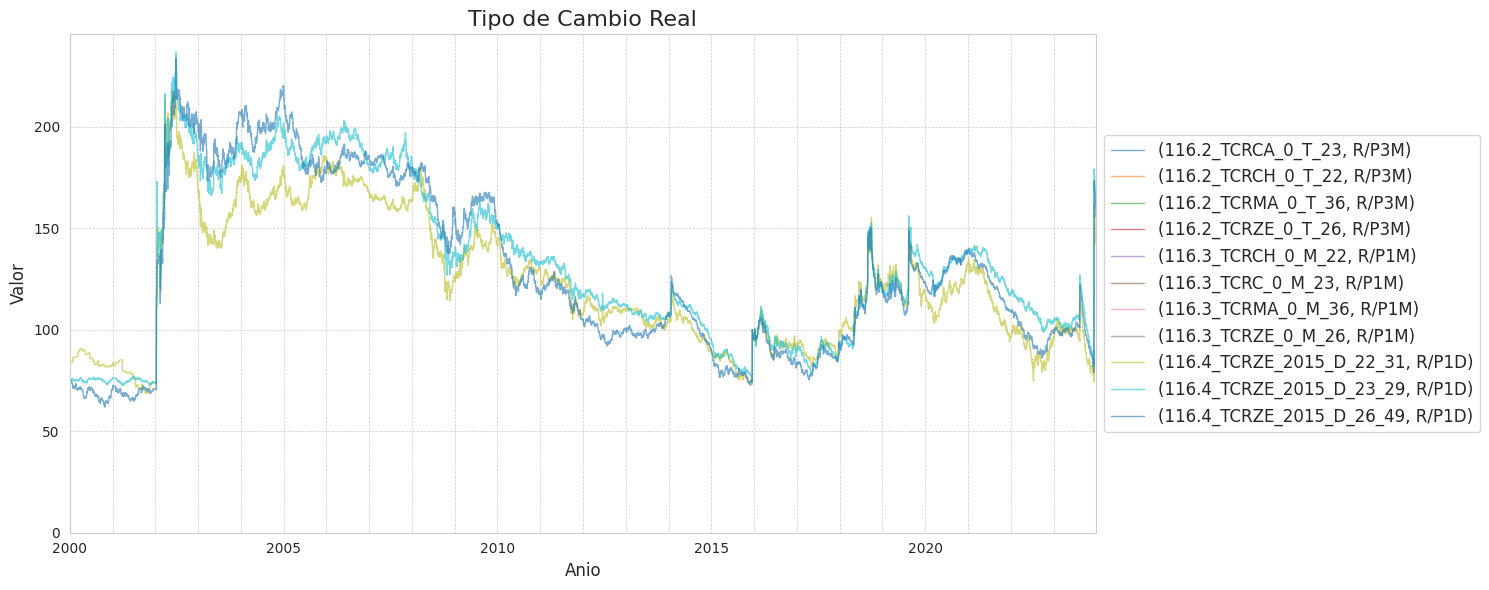

In [102]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
filtered_data.plot(ax=ax, linewidth=1, alpha = .6)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Tipo de Cambio Real', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Tasas de interes

In [103]:
column = '89.2_TS_INTE_PM_0_D_16'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [104]:
equivalent_series

index                         serie_id indice_tiempo_frecuencia     corrw  \
0    3624            174.1_T_INTERD_0_0_41                    R/P1M  0.976818   
1    3627            174.1_T_INTERO_0_0_57                    R/P1M  0.983507   
2    3868       179.1_AA19_COTIZION_0_0_15                    R/P1D  0.975187   
3   14693  430.1_MEDIANA_IP018_M_0_0_27_82                    R/P1M  0.963982   
4   14703  430.1_MEDIANA_IP019_M_0_0_44_45                    R/P1M -0.969858   
7   14728  430.1_MEDIANA_IPT_3_M_0_0_41_26                    R/P1M  0.977908   
8   14734   430.1_MEDIANA_IPT_4_M_0_0_41_5                    R/P1M  0.972569   
11  14794  430.1_REM_IPC_NA023_M_0_0_23_17                    R/P1M  0.991856   
15  17593           89.1_IR_BCRADIA_0_M_36                    R/P1M  0.977189   
16  17595     89.1_IR_BCRAIAS_1_DIA_0_M_37                    R/P1M  0.982714   
17  17597           89.1_IR_BCRARIA_0_M_34                    R/P1M  0.999961   
18  17598                 89.1_TIAC_0_0_26                    R/P1M  0.977969   
19  17599                  89.1_TIB_0_0_20                    R/P1M  0.978892   
20  17601                  89.1_TIC_0_0_18                    R/P1M  0.967126   
21  17602              89.1_TIPF35D_0_0_35                    R/P1M  0.977047   
22  17603              89.1_TIPFM6D_0_0_36                    R/P1M  0.975429   
23  17606           89.1_TS_INTEIOS_0_M_34                    R/P1M  0.974888   
24  17607           89.1_TS_INTELES_0_M_32                    R/P1M  0.961294   
25  17609           89.1_TS_INTETOS_0_M_31                    R/P1M  0.986003   
26  17610           89.1_TS_INTETOS_0_M_32                    R/P1M  0.983147   
27  17611           89.2_TS_INTEALL_0_D_18                    R/P1D  0.967134   
28  17612           89.2_TS_INTELAR_0_D_20                    R/P1D  0.978741   

    consultas_180_dias  \
0                127.0   
1                 52.0   
2                211.0   
3                121.0   
4                 32.0   
7                 35.0   
8                 41.0   
11                45.0   
15               240.0   
16               217.0   
17              3268.0   
18               546.0   
19              3565.0   
20              3483.0   
21              6566.0   
22               454.0   
23               146.0   
24               155.0   
25               149.0   
26               151.0   
27              7268.0   
28              7430.0   

                                               serie_titulo  \
0             tasa_interes_deposito_plazo_fijo_30_59d_pesos   
1   tasa_interes_prestamos_interfinancieros_hasta_15d_pesos   
2                                           aa19_cotizacion   
3                                   rem_ipc_nac_var_ia_2018   
4                                       rem_pib_var_ia_2019   
7                         rem_tasa_politica_var_mensual_t_3   
8                         rem_tasa_politica_var_mensual_t_4   
11                                  rem_ipc_nac_var_ia_2023   
15                     instr_bcra_pases_pesos_pasivos_1_dia   
16                    instr_bcra_pases_pesos_activos_1_dias   
17                       instr_bcra_tasa_politica_monetaria   
18                               tasas_interes_adelantos_cc   
19                                     tasas_interes_badlar   
20                                       tasas_interes_call   
21                      tasas_interes_plazo_fijo_30_59_dias   
22                     tasas_interes_plazo_fijo_mas_60_dias   
23                       tasas_interes_activas_hipotecarios   
24                         tasas_interes_activas_personales   
25                          tasas_interes_activas_adelantos   
26                         tasas_interes_activas_documentos   
27                                       tasas_interes_call   
28                                     tasas_interes_badlar   

          serie_unidades  \
0             Porcentaje   
1             Porcentaje   
2      

In [105]:

series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]


# aa19_cotizacion = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('179.')]
# rem_ipc_nac_var_ia_ = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('430.')]
# tasas_interes_badlar = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('89.')]
# tasa_interes_prestamos_interfinancieros_hasta_15d_pesos = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('174.')]



In [106]:
import numpy as np
import pandas as pd

def align_time_series(data, anchor_col=None):
    # Step 1: Resample to monthly frequency
    data_resampled = data.resample('M').mean()
    
    # If no anchor column provided, use the first column
    if anchor_col is None:
        anchor_col = data_resampled.columns[0]
    
    # Initialize the aligned data with the anchor column
    aligned_data = data_resampled[[anchor_col]].copy()
    
    # Step 3: Iterate over the other columns
    for col in data_resampled.columns:
        if col == anchor_col:
            continue
        
        # Step 4: Find Proportionality Factor
        # Minimize the squared difference to the median of the aligned data
        def objective(factor):
            return np.sum((data_resampled[col] * factor - aligned_data.median(axis=1))**2)
        
        from scipy.optimize import minimize_scalar
        result = minimize_scalar(objective)
        
        # Step 5: Apply Proportionality Factor
        aligned_data[col] = data_resampled[col] * result.x
    
    return aligned_data


In [107]:
aligned_data = align_time_series(selected_data, anchor_col='89.2_TS_INTELAR_0_D_20')


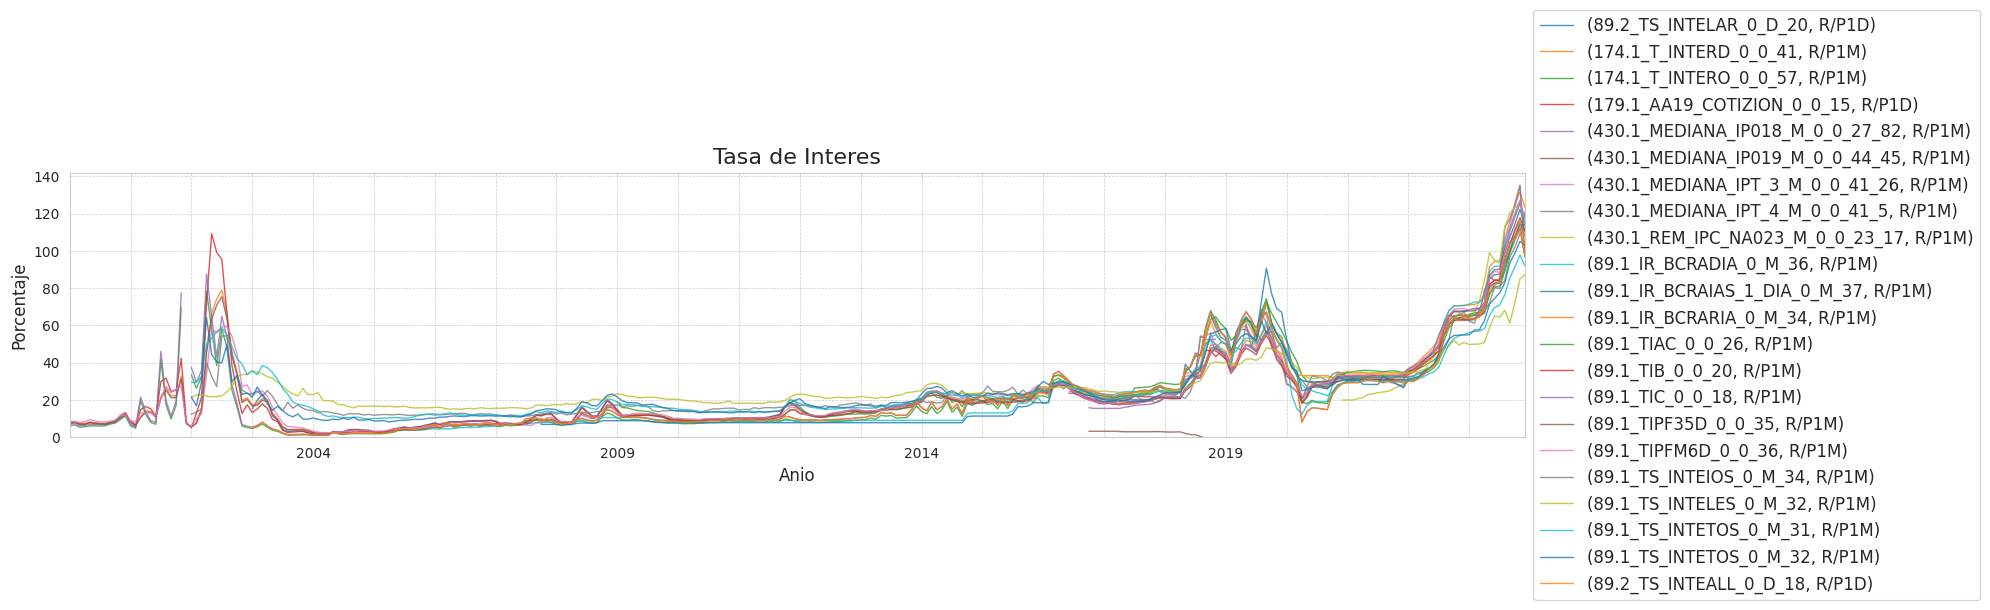

In [108]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the data
# filtered_data.plot()
aligned_data.plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Tasa de Interes', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Empleo

In [109]:
column = '45.2_ECTDT_0_T_33'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [110]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]
selected_data

# aa19_cotizacion = selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('179.')]

serie_id                 16.2_FMCIM_1997_T_55 16.2_FPMNM_1997_T_44  \
indice_tiempo_frecuencia                R/P3M                R/P3M   
indice_tiempo                                                        
2000-01-31                          84.051398            80.253628   
2000-02-29                                NaN                  NaN   
2000-03-31                                NaN                  NaN   
2000-04-30                          84.266302            78.569576   
2000-05-31                                NaN                  NaN   
...                                       ...                  ...   
2023-08-31                                NaN                  NaN   
2023-09-30                                NaN                  NaN   
2023-10-31                                NaN                  NaN   
2023-11-30                                NaN                  NaN   
2023-12-31                                NaN                  NaN   

serie_id                 16.2_NG_1997_T_13 313.1_EN_PORCENTPIB_0_T_21  \
indice_tiempo_frecuencia             R/P3M                      R/P3M   
indice_tiempo                                                           
2000-01-31                       84.995104                        NaN   
2000-02-29                             NaN                        NaN   
2000-03-31                             NaN                        NaN   
2000-04-30                       82.756152                        NaN   
2000-05-31                             NaN                        NaN   
...                                    ...                        ...   
2023-08-31                             NaN                        NaN   
2023-09-30                             NaN                        NaN   
2023-10-31                             NaN                        NaN   
2023-11-30                             NaN                        NaN   
2023-12-31                             NaN                        NaN   

serie_id                 325.2_CONSTRUCCIION__12 325.2_INDUSTRIA_ERA__23  \
indice_tiempo_frecuencia                   R/P3M                   R/P3M   
indice_tiempo                                                              
2000-01-31                                   NaN                     NaN   
2000-02-29                                   NaN                     NaN   
2000-03-31                                   NaN                     NaN   
2000-04-30                                   NaN                     NaN   
2000-05-31                                   NaN                     NaN   
...                                          ...                     ...   
2023-08-31                                   NaN                     NaN   
2023-09-30                                   NaN                     NaN   
2023-10-31                                   NaN                     NaN   
2023-11-30                                   NaN                     NaN   
2023-12-31                                   NaN                     NaN   

serie_id                 42.1_EPDA_0_A_28 42.1_EPDG_0_A_28 42.1_EPDT_0_A_30  \
indice_tiempo_frecuencia            R/P1Y            R/P1Y            R/P1Y   
indice_tiempo                                                                 
2000-01-31                         0.1455           0.1535           0.1505   
2000-02-29                            NaN              NaN              NaN   
2000-03-31                            NaN              NaN              NaN   
2000-04-30                            NaN              NaN              NaN   
2000-05-31                            NaN              NaN              NaN   
...                                   ...              ...              ...   
2023-08-31                            NaN              NaN              NaN   
2023-09-30                            NaN              NaN              NaN   
2023-10-31                            NaN              NaN    

<Axes: xlabel='indice_tiempo'>

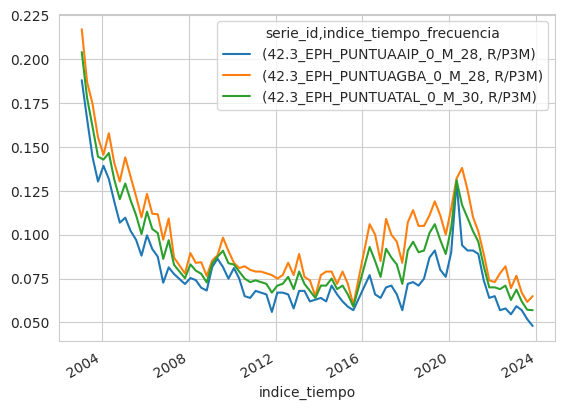

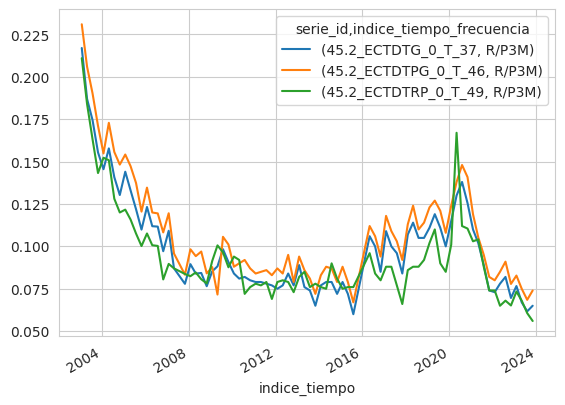

In [111]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('42.3')].dropna().plot()
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('45.2')].dropna().plot()

<Axes: xlabel='indice_tiempo'>

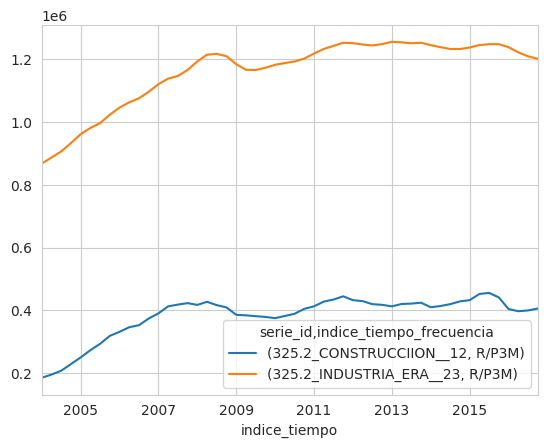

In [112]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('325.2')].dropna().plot()

<Axes: xlabel='indice_tiempo'>

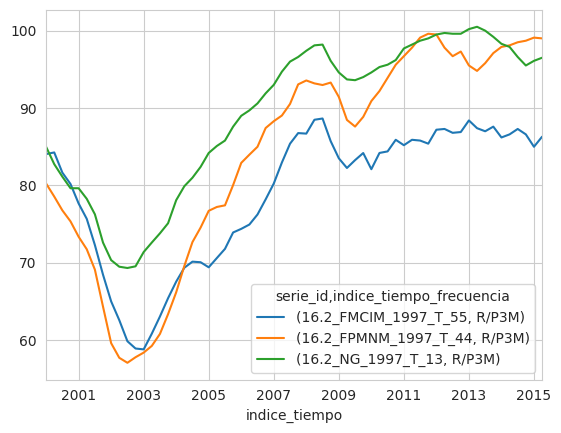

In [113]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('16.2')].dropna().plot()

In [114]:
equivalent_series

index                    serie_id indice_tiempo_frecuencia     corrw  \
0    2427        16.2_FMCIM_1997_T_55                    R/P3M -0.961066   
1    2433        16.2_FPMNM_1997_T_44                    R/P3M -0.971060   
2    2439           16.2_NG_1997_T_13                    R/P3M -0.965158   
3    5985  313.1_EN_PORCENTPIB_0_T_21                    R/P3M  0.966204   
4    6514     325.2_CONSTRUCCIION__12                    R/P3M -0.962806   
6    6548     325.2_INDUSTRIA_ERA__23                    R/P3M -0.960532   
7   14565            42.1_EPDA_0_A_28                    R/P1Y  0.967809   
8   14566            42.1_EPDG_0_A_28                    R/P1Y  0.961538   
9   14567            42.1_EPDT_0_A_30                    R/P1Y  0.972013   
10  14582   42.3_EPH_PUNTUAAIP_0_M_28                    R/P3M  0.980414   
11  14588   42.3_EPH_PUNTUAGBA_0_M_28                    R/P3M  0.990249   
12  14596   42.3_EPH_PUNTUATAL_0_M_30                    R/P3M  1.000000   
13  15121          45.2_ECTDTG_0_T_37                    R/P3M  0.989913   
14  15128         45.2_ECTDTPG_0_T_46                    R/P3M  0.981155   
15  15133         45.2_ECTDTRP_0_T_49                    R/P3M  0.969035   
18  15810           54.2_IOO_T_0_0_23                    R/P3M -0.964172   

    consultas_180_dias  \
0                 36.0   
1                 37.0   
2                 38.0   
3                 48.0   
4                 32.0   
6                 47.0   
7                 44.0   
8                 43.0   
9                 83.0   
10                44.0   
11                45.0   
12               220.0   
13               183.0   
14               186.0   
15               183.0   
18                36.0   

                                               serie_titulo  \
0   fabricacion_muebles_colchones_industrias_manufactureras   
1              fabricacion_productos_minerales_no_metalicos   
2                                             nivel_general   
3                                     en_porcentaje_del_pib   
4                                              construccion   
6                                   industria_manufacturera   
7                              eph_puntual_desocupacion_aip   
8                              eph_puntual_desocupacion_gba   
9                            eph_puntual_desocupacion_total   
10                             eph_puntual_desocupacion_aip   
11                             eph_puntual_desocupacion_gba   
12                           eph_puntual_desocupacion_total   
13                    eph_continua_tasa_desempleo_total_gba   
14           eph_continua_tasa_desempleo_total_partidos_gba   
15        eph_continua_tasa_desempleo_total_region_pampeana   
18                                  indice_obreros_ocupados   

          serie_unidades  \
0        Índice 1997=100   
1        Índice 1997=100   
2        Índice 1997=100   
3    Porecentaje del PIB   
4   En millones de pesos   
6   En millones de pesos   
7             Porcentaje   
8             Porcentaje   
9             Porcentaje   
10            Porcentaje   
11            Porcentaje   
12            Porcentaje   
13            Porcentaje   
14            Porcentaje   
15            Porcentaje   
18                Índice   

                                                                                         serie_descripcion  
0   Índice de Obreros Ocupados (IOO). Fabricación de muebles, colchones (industria manufacturera). Anuales  
1               Índice de Obreros Ocupados (IOO). Fabricación de productos minerales no metálicos. Anuales  
2                                                Índice de Obreros Ocupados (IOO). Índice General. Anuales  
3                                                        Stock deuda externa privada en porcentaje del PIB  
4                                                                                             construcción  
6                                                                

In [115]:
column = '154.2_COBAOBA_S_0_0_7'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [116]:
equivalent_series

index                       serie_id indice_tiempo_frecuencia     corrw  \
0      14             10.2_ISD_1993_T_31                    R/P3M  0.981529   
1      17             10.3_ISD_1993_M_31                    R/P1M  0.981998   
2      19             10.3_ITS_1993_M_26                    R/P1M  0.983257   
3    2280     152.1_TL_SIN_EST_2009_M_13                    R/P1M  0.967645   
4    2290          154.1_COBAOBA_C_0_0_7                    R/P1M  0.989632   
5    2303         154.1_SA_FE_FE_C_0_0_8                    R/P1M  0.966269   
6    2309      154.2_BOS_AIRRES_S_0_0_12                    R/P1M  0.962237   
7    2326         154.2_SA_FE_FE_S_0_0_8                    R/P1M  0.970934   
8    2339            155.1_TLTAL_C_0_0_5                    R/P3M  0.965277   
9    2347            155.2_TLTAL_S_0_0_5                    R/P3M  0.972537   
10   2361              156.1_TLTAL_0_0_5                    R/P3M  0.961713   
11   3844     179.1_A2E3_DURDUR_0_0_8_49                    R/P1D  0.990040   
12   3845  179.1_A2E3_PPV_EIOS_0_0_17_67                    R/P1D  0.987657   
13   3852     179.1_A2E8_DURDUR_0_0_8_32                    R/P1D  0.976880   
14   3853  179.1_A2E8_PPV_EIOS_0_0_17_79                    R/P1D  0.985884   
17   3897  179.1_AA48_PPV_EIOS_0_0_17_98                    R/P1D  0.976233   
28  16094             66.2_CMMR_E_0_T_41                    R/P3M  0.968523   
29  16103                66.2_M_E_0_T_19                    R/P3M  0.987019   
30  16109               66.2_SP_E_0_T_14                    R/P3M  0.961513   
31  16111              66.2_TAC_E_0_T_40                    R/P3M  0.963970   
32  16112               66.2_TM_E_0_T_29                    R/P3M  0.972233   

    consultas_180_dias                               serie_titulo  \
0                   52            indice_serie_desestacionalizada   
1                  187            indice_serie_desestacionalizada   
2                   74                 indice_tendencia_suavizada   
3                 1494                              total_sin_est   
4                   93                   asalariados_priv_cordoba   
5                   55                  asalariados_priv_santa_fe   
6                  280    asalariados_priv_sin_estac_buenos_aires   
7                  273        asalariados_priv_sin_estac_santa_fe   
8                  225               empleo_registrado_priv_total   
9                   43     empleo_registrado_priv_sin_estac_total   
10                 109                                      total   
11                 154                                   a2e3_dur   
12                 133                          a2e3_ppv_en_anios   
13                  59                                   a2e8_dur   
14                  54                          a2e8_ppv_en_anios   
17                  34                          aa48_ppv_en_anios   
28                  61  comercio_mayorista_minorista_reparaciones   
29                  76                        maquinarias_equipos   
30                  31                             sector_privado   
31                  40   transporte_almacenamiento_comunicaciones   
32                  83              total_industria_manufacturera   

        serie_unidades  \
0      Índice 1993=100   
1      Índice 1993=100   
2      Índice 1993=100   
3    Miles de Personas   
4    Miles de personas   
5    Miles de personas   
6    Miles de personas   
7    Miles de personas   
8   Puestos de trabajo   
9   Puestos de trabajo   
10  Puestos de trabajo   
11                Años   
12                Años   
13                Años   
14                Años   
17                Años   
28   Miles de personas   
29   Miles de personas   
30   Miles de personas   
31   Miles de personas   
32   Miles de personas   

                                                                       serie_descripcion  
0                                Serie desestacionalizada EMAE en Trimestral (base

In [117]:
## EMpleo por ramas:

# 66.2_CMMR_E_0_T_41	R/P3M	0.968645	61.0	comercio_mayorista_minorista_reparaciones	Miles de personas	Miles de puestos de trabajo declarados. Comercio Mayorista, Minorista y Reparaciones
# 27	66.2_M_E_0_T_19	R/P3M	0.987133	76.0	maquinarias_equipos	Miles de personas	Miles de puestos de trabajo declarados. Maquinarias y equipos
# 28	66.2_SP_E_0_T_14	R/P3M	0.961665	31.0	sector_privado	Miles de personas	Miles de puestos de trabajo declarados. Sector privado
# 29	66.2_TAC_E_0_T_40	R/P3M	0.964018	40.0	transporte_almacenamiento_comunicaciones	Miles de personas	Miles de puestos de trabajo declarados. Transporte, Almacenamiento y Comunicaciones
# 30	66.2_TM_E_0_T_29	R/P3M	0.972360	83.0	total_industria_manufacturera	Miles de personas	Miles de puestos de trabajo declarados. Total Industria manufacturera

In [118]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]
selected_data


serie_id                 10.2_ISD_1993_T_31 10.3_ISD_1993_M_31  \
indice_tiempo_frecuencia              R/P3M              R/P1M   
indice_tiempo                                                    
2000-01-31                       118.212322         117.916341   
2000-02-29                              NaN         118.643355   
2000-03-31                              NaN         118.077269   
2000-04-30                       116.198519         117.148142   
2000-05-31                              NaN         115.721309   
...                                     ...                ...   
2023-08-31                              NaN                NaN   
2023-09-30                              NaN                NaN   
2023-10-31                              NaN                NaN   
2023-11-30                              NaN                NaN   
2023-12-31                              NaN                NaN   

serie_id                 10.3_ITS_1993_M_26 152.1_TL_SIN_EST_2009_M_13  \
indice_tiempo_frecuencia              R/P1M                      R/P1M   
indice_tiempo                                                            
2000-01-31                       118.313366                        NaN   
2000-02-29                       118.132418                        NaN   
2000-03-31                       117.791471                        NaN   
2000-04-30                       117.354234                        NaN   
2000-05-31                       116.893372                        NaN   
...                                     ...                        ...   
2023-08-31                              NaN                   6405.180   
2023-09-30                              NaN                   6392.065   
2023-10-31                              NaN                   6381.583   
2023-11-30                              NaN                   6374.030   
2023-12-31                              NaN                   6362.820   

serie_id                 154.1_COBAOBA_C_0_0_7 154.1_SA_FE_FE_C_0_0_8  \
indice_tiempo_frecuencia                 R/P1M                  R/P1M   
indice_tiempo                                                           
2000-01-31                                 NaN                    NaN   
2000-02-29                                 NaN                    NaN   
2000-03-31                                 NaN                    NaN   
2000-04-30                                 NaN                    NaN   
2000-05-31                                 NaN                    NaN   
...                                        ...                    ...   
2023-08-31                             530.384                522.576   
2023-09-30                             529.621                522.759   
2023-10-31                             531.286                523.477   
2023-11-30                             532.075                524.260   
2023-12-31                             532.594                523.510   

serie_id                 154.2_BOS_AIRRES_S_0_0_12 154.2_SA_FE_FE_S_0_0_8  \
indice_tiempo_frecuencia                     R/P1M                  R/P1M   
indice_tiempo                                                               
2000-01-31                                     NaN                    NaN   
2000-02-29                                     NaN                    NaN   
2000-03-31                                     NaN                    NaN   
2000-04-30                                     NaN                    NaN   
2000-05-31                                     NaN                    NaN   
...                                            ...                    ...   
2023-08-31                                2025.752                523.569   
2023-09-30                                2022.652                523.237   
2023-10-31                                2021.460                522.566   
2023-11-30                                2020.974                521.546   
2023-12-31    

In [119]:
# selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('10.3')].plot()

<Axes: xlabel='indice_tiempo'>

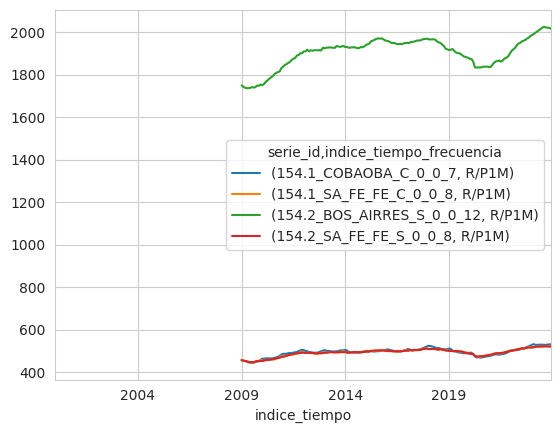

In [120]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('154')].plot()

<Axes: xlabel='indice_tiempo'>

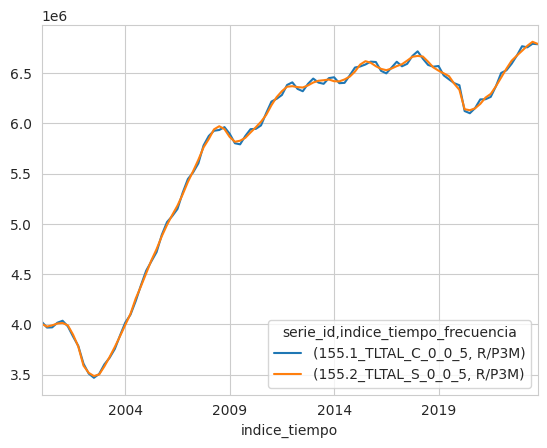

In [121]:
selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('155')].dropna().plot()

<Axes: xlabel='indice_tiempo'>

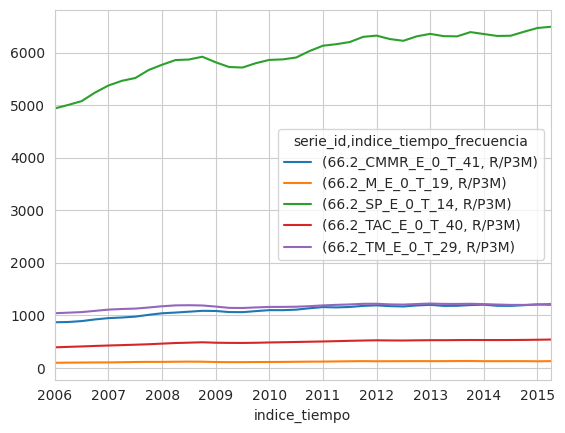

In [122]:
# selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('179')].plot()

selected_data.loc[:, selected_data.columns.get_level_values('serie_id').str.startswith('66')].dropna().plot()

# Construccion

In [123]:
column = '38.3_CEM_1994_M_7'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [124]:
equivalent_series

index                      serie_id indice_tiempo_frecuencia     corrw  \
0       9           1.2_DGI_D_1993_T_19                    R/P3M  0.969930   
3     621             12.3_MM_2004_M_19                    R/P1M  0.973661   
5    2224          15.2_FPMNM_1997_T_44                    R/P3M  0.977491   
6    4608            2.2_DGIC_1993_T_32                    R/P3M  0.973395   
7    4618             2.2_DGI_1993_T_19                    R/P3M  0.969044   
18   6133           32.3_IEOD_2004_M_29                    R/P1M  0.993089   
20   6135            32.3_ING_2004_M_18                    R/P1M  0.990605   
24   6968  33.3_ISAC_CEMENAND_0_0_21_29                    R/P1M  0.999591   
27   9709       357.1_PBA_PARAGUUAY__12                    R/P1Y  0.961976   
28  14097             38.1_CEM_1994_A_7                    R/P1Y  0.970164   
29  14125             38.2_CEM_1994_T_7                    R/P3M  0.972799   
33  15321     453.2_CEMENTONTO_0_0_7_59                    R/P1M  0.990124   
34  15756               5.2_C_1993_T_12                    R/P3M  0.984482   
35  15773               50.1_ICS_0_0_25                    R/P1Y  0.960375   
36  15776                50.1_IT_0_0_12                    R/P1Y  0.964183   
37  15786               51.1_IGC_0_0_19                    R/P1Y  0.963624   

    consultas_180_dias                                  serie_titulo  \
0                   33                           demanda_global_ibif   
3                   32                           minerales_metalicos   
5                   46  fabricacion_productos_minerales_no_metalicos   
6                   31              demanda_global_ibif_construccion   
7                   36                           demanda_global_ibif   
18                  33                 isac_edificios_otros_destinos   
20                  42                            isac_nivel_general   
24                  58                         isac_cemento_portland   
27                  47                                  pba_paraguay   
28                  47                                       cemento   
29                  42                                       cemento   
33                  40                                       cemento   
34                  33                                  construccion   
35                 154                     indice_comercio_servicios   
36                 172                                  indice_total   
37                  75                           indice_gran_cordoba   

                         serie_unidades  \
0   Millones de pesos a precios de 1993   
3                       Índice 2004=100   
5                       Índice 1997=100   
6   Millones de pesos a precios de 1993   
7   Millones de pesos a precios de 1993   
18                      Índice 2004=100   
20                      Índice 2004=100   
24                      Índice 2004=100   
27                  Millones de dolares   
28                   Miles de toneladas   
29                   Miles de toneladas   
33                    Índice 2004 = 100   
34  Millones de pesos a precios de 1993   
35                               Índice   
36                               Índice   
37                               Índice   

                                                                            serie_descripcion  
0                                      Consumo privado, en millones de pesos de 1993 y Anual.  
3                                                EMI. Minerales metálicos. Índice (Base 2004)  
5    Índice de Volumen Físico (IVF). Fabricación de productos minerales no metálicos. Anuales  
6    Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Trimestral.  
7                    Inversion bruta interna fija, en millones de pesos de 1993 y Trimestral.  
18  Indicador sintético de la actividad de la construcción de edificicios para otros destinos  
20                                     Indicador

In [125]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]


In [126]:
aligned_data = align_time_series(selected_data, anchor_col='32.3_ING_2004_M_18')


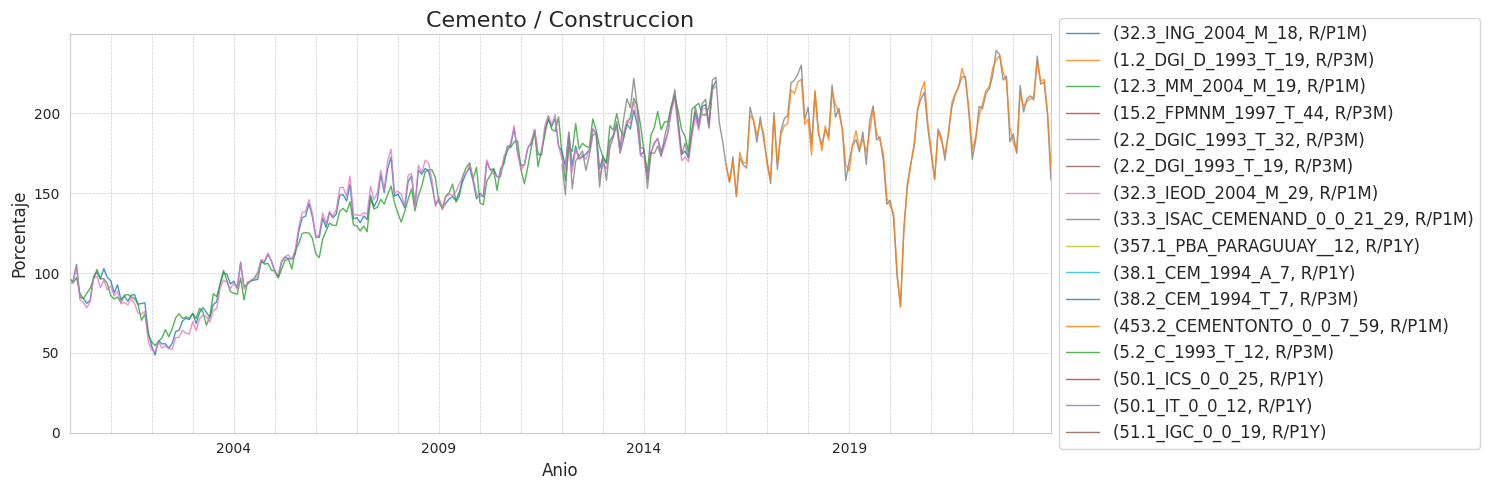

In [127]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data
# filtered_data.plot()
aligned_data.plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Cemento / Construccion', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


# Producto

In [128]:
column = '143.3_NO_PR_2004_A_21'
equivalent_series = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)


In [129]:
series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]


In [130]:
aligned_data = align_time_series(selected_data, anchor_col='4.2_OGP_2004_T_17')

In [131]:
aligned_data.dropna().shape

(10, 9)

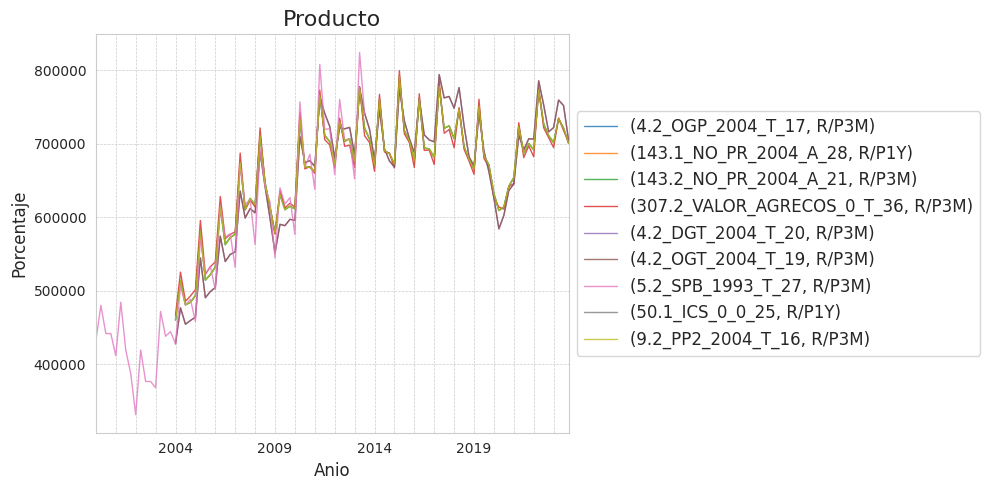

In [132]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
aligned_data.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Producto', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


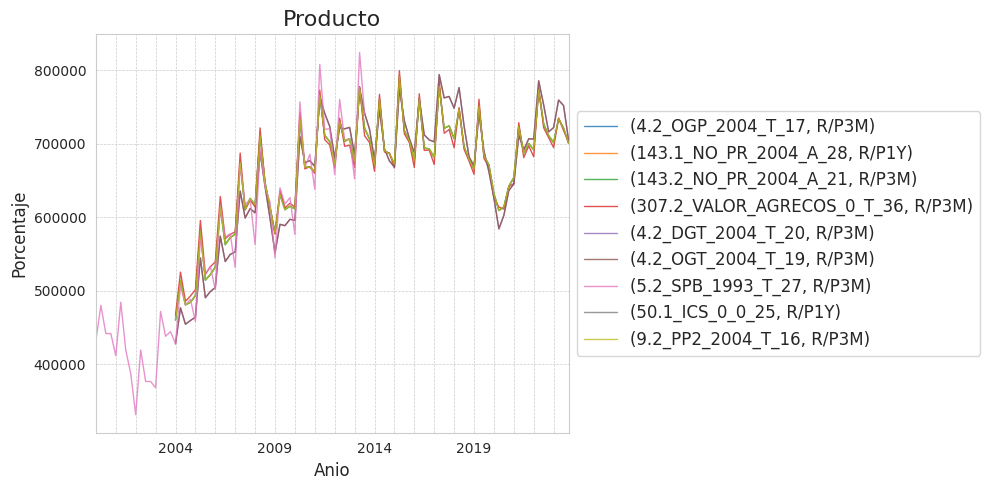

In [133]:

series_tuples = equivalent_series[['serie_id', 'indice_tiempo_frecuencia']].apply(tuple, axis=1).tolist()
selected_data = data_m[series_tuples]

aligned_data = align_time_series(selected_data, anchor_col='4.2_OGP_2004_T_17')
aligned_data.dropna().shape

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
aligned_data.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Producto', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [134]:
top_consultas = pd.read_csv('./datos/top_consultas.csv')

for column in top_consultas.serie_id.unique():
    display(serie.loc[serie.serie_id == column][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']])

    result = find_equivalent_series(data_m, consultas, serie, column, threshold, consultas_threshold, min_periods)
    display(result)


serie_id                          serie_titulo  \
1068  116.4_TCRZE_2015_D_36_4  tipo_cambio_real_multilateral_actual   

              serie_unidades                           serie_descripcion  
1068  Índice 17-Dic-2015=100  Índice de Tipo de Cambio Real Multilateral

index                    serie_id indice_tiempo_frecuencia     corrw  \
0     544          116.2_TCRCA_0_T_23                    R/P3M  0.978761   
1     545          116.2_TCRCH_0_T_22                    R/P3M  0.972510   
2     550          116.2_TCRMA_0_T_36                    R/P3M  0.990721   
3     555          116.2_TCRZE_0_T_26                    R/P3M  0.968291   
4     558          116.3_TCRCH_0_M_22                    R/P1M  0.983702   
5     560           116.3_TCRC_0_M_23                    R/P1M  0.985237   
6     564          116.3_TCRMA_0_M_36                    R/P1M  0.999980   
7     569          116.3_TCRZE_0_M_26                    R/P1M  0.974695   
8     574    116.4_TCRZE_2015_D_22_31                    R/P1D  0.983702   
9     576    116.4_TCRZE_2015_D_23_29                    R/P1D  0.985237   
10    580    116.4_TCRZE_2015_D_26_49                    R/P1D  0.974695   
11   3867  179.1_AA19_COTIZION_0_0_15                    R/P1D  0.960997   
12   5102  300.1_AP_ACT_TITFMI_0_M_59                    R/P1M  0.968581   

    consultas_180_dias  \
0                   57   
1                   53   
2                   81   
3                   69   
4                   69   
5                   72   
6                 1699   
7                   84   
8                   66   
9                  100   
10                  67   
11                 211   
12                  73   

                                                   serie_titulo  \
0                                       tipo_cambio_real_canada   
1                                        tipo_cambio_real_chile   
2                          tipo_cambio_real_multilateral_actual   
3                                    tipo_cambio_real_zona_euro   
4                                        tipo_cambio_real_chile   
5                                       tipo_cambio_real_canada   
6                          tipo_cambio_real_multilateral_actual   
7                                    tipo_cambio_real_zona_euro   
8                                        tipo_cambio_real_chile   
9                                       tipo_cambio_real_canada   
10                                   tipo_cambio_real_zona_euro   
11                                              aa19_cotizacion   
12  ap_act_tit_pub_ley_extranjera_letras_sobre_obligaciones_fmi   

            serie_unidades  \
0   Índice 17-Dic-2015=100   
1   Índice 17-Dic-2015=100   
2   Índice 17-Dic-2015=100   
3   Índice 17-Dic-2015=100   
4   Índice 17-Dic-2015=100   
5   Índice 17-Dic-2015=100   
6   Índice 17-Dic-2015=100   
7   Índice 17-Dic-2015=100   
8   Índice 17-Dic-2015=100   
9   Índice 17-Dic-2015=100   
10  Índice 17-Dic-2015=100   
11                 Dólares   
12          Miles de pesos   

                                                                                       serie_descripcion  
0                                                                   Índice de Tipo de Cambio Real Canadá  
1                                                                    Índice de Tipo de Cambio Real Chile  
2                                                             Índice de Tipo de Cambio Real Multilateral  
3                                                                Índice de Tipo de Cambio Real Zona Euro  
4                                                                    Índice de Tipo de Cambio Real Chile  
5                                                                   Índice de Tipo de Cambio Real Canadá  
6                                                             Índice de Tipo de Cambio Real Multilateral  
7                                                                Índice de Tipo de Cambio Real Zona Euro  
8                                                                    Índice de Tipo de Cambio Real Chile  
9                                                                   Índice de Tipo de Cambio Real Canadá  
10                                   

serie_id     serie_titulo       serie_unidades  \
136  103.1_I2N_2016_M_15  ipc_2016_nucleo  Índice Dic-2016=100   

                           serie_descripcion  
136  IPC-GBA. Núcleo. Base abr 2016. Mensual

index                      serie_id indice_tiempo_frecuencia     corrw  \
0        43         101.1_I2ABA_2016_M_28                    R/P1M  0.997920   
1        44          101.1_I2AB_2016_M_26                    R/P1M  0.999631   
2        45         101.1_I2AMS_2016_M_30                    R/P1M  0.999528   
3        46         101.1_I2BSV_2016_M_15                    R/P1M  0.999030   
4        47         101.1_I2EDH_2016_M_31                    R/P1M  0.999787   
...     ...                           ...                      ...       ...   
1738  17744  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.970959   
1739  17752  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.987348   
1740  17783              94.2_CD_D_0_0_10                    R/P1D  0.993367   
1741  17784            94.2_UVAD_D_0_0_10                    R/P1D  0.993258   
1742  17785            94.2_UVID_D_0_0_10                    R/P1D  0.989146   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1738                58.0                pasivos_monetarios   
1739               516.0             tipo_cambio_valuacion   
1740              2816.0                        cer_diario   
1741              9652.0                        uva_diario   
1742              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1738           Millones de pesos   
1739  Pesos argentinos por dólar   
1740        Índice 02-feb-2002=1   
1741    Índice 31-mar-2016=14,05   
1742    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1738                    Pasivos monetarios, en millones de pesos  
1739                Tipo de cambio de valuación (peso por dólar)  
1740                                                  CER diario  
1741                                                  UVA diario  
1742                                                  UVI diario  

[824 rows x 8 columns]

serie_id                            serie_titulo  \
2087  145.3_INGNACUAL_DICI_M_38  ipc_ng_nacional_tasa_variacion_mensual   

              serie_unidades  \
2087  Variación intermensual   

                                                            serie_descripcion  
2087  IPC. Tasa de variación mensual. Nivel General. Nacional. Base dic 2016.

index                         serie_id indice_tiempo_frecuencia     corrw  \
0    1909        145.3_INGCUYUAL_DICI_M_34                    R/P1M  0.993690   
1    1913        145.3_INGGBAUAL_DICI_M_33                    R/P1M  0.998046   
2    1918        145.3_INGNEAUAL_DICI_M_33                    R/P1M  0.988129   
3    1921        145.3_INGNOAUAL_DICI_M_33                    R/P1M  0.991542   
4    1924        145.3_INGPAMUAL_DICI_M_38                    R/P1M  0.998522   
5    1927        145.3_INGPATUAL_DICI_M_39                    R/P1M  0.987164   
6    3589       173.1_INUCLEOLEO_DIC-_0_10                    R/P1M  0.991068   
22   9131          347.1_GBA_IPC_NUUAL__22                    R/P1M  0.988856   
23   9133          347.1_GBA_NIVEL_UAL__25                    R/P1M  0.997934   
24   9139          347.1_NEA_IPC_NUUAL__22                    R/P1M  0.978674   
25   9141          347.1_NEA_NIVEL_UAL__25                    R/P1M  0.988064   
27   9149          347.1_NOA_NIVEL_UAL__25                    R/P1M  0.991809   
28   9155          347.1_PAMPEANA_IUAL__27                    R/P1M  0.989923   
32  14801  430.1_REM_IPC_NAL_T_M_0_0_25_28                    R/P1M  0.984195   
33  14802  430.1_REM_IPC_NAL_T_M_0_0_32_63                    R/P1M  0.981684   

    consultas_180_dias                             serie_titulo  \
0                153.0       ipc_ng_cuyo_tasa_variacion_mensual   
1                202.0        ipc_ng_gba_tasa_variacion_mensual   
2                169.0        ipc_ng_nea_tasa_variacion_mensual   
3                156.0        ipc_ng_noa_tasa_variacion_mensual   
4                157.0   ipc_ng_pampeana_tasa_variacion_mensual   
5                152.0  ipc_ng_patagonia_tasa_variacion_mensual   
6               1716.0                               ipc_nucleo   
22                32.0                   gba_ipc_nucleo_mensual   
23                38.0                gba_nivel_general_mensual   
24                31.0                   nea_ipc_nucleo_mensual   
25                37.0                nea_nivel_general_mensual   
27                32.0                noa_nivel_general_mensual   
28                31.0              pampeana_ipc_nucleo_mensual   
32                81.0                rem_ipc_nac_var_mensual_t   
33                53.0         rem_ipc_nac_nucleo_var_mensual_t   

          serie_unidades  \
0   Variación Porcentual   
1   Variación Porcentual   
2   Variación Porcentual   
3   Variación Porcentual   
4   Variación Porcentual   
5   Variación Porcentual   
6   Variación porcentual   
22                Índice   
23                Índice   
24                Índice   
25                Índice   
27                Índice   
28                Índice   
32  Variación Porcentual   
33  Variación Porcentual   

                                                                   serie_descripcion  
0                IPC. Tasa de variación mensual. Nivel General. Cuyo. Base dic 2016.  
1   IPC. Tasa de variación mensual. Nivel General. Gran Buenos Aires. Base dic 2016.  
2      IPC. Tasa de variación mensual. Nivel General. Región Noreste. Base dic 2016.  
3     IPC. Tasa de variación mensual. Nivel General. región Noroeste. Base dic 2016.  
4     IPC. Tasa de variación mensual. Nivel General. Región Pampeana. Base dic 2016.  
5   IPC. Tasa de variación mensual. Nivel General. Región Patagónica. Base dic 2016.  
6                                                                         IPC núcleo  
22                                        Incidencia absoluta mensual GBA ipc nucleo  
23                                     Incidencia absoluta mensual GBA nivel general  
24                                        Incidencia absoluta mensual NEA ipc nucleo  
25                                     Incidencia absoluta mensual NEA nivel general  
27                                     Incidencia absoluta mensual NOA nivel general  
28                                   Incidencia absolu

serie_id      serie_titulo      serie_unidades  \
19512  89.2_TS_INTE_PM_0_D_16  tasas_interes_pm  Porcentaje (0-100)   

                                        serie_descripcion  
19512  Instrumentos del BCRA. Tasa de Política Monetaria.

index                         serie_id indice_tiempo_frecuencia     corrw  \
0    3624            174.1_T_INTERD_0_0_41                    R/P1M  0.976818   
1    3627            174.1_T_INTERO_0_0_57                    R/P1M  0.983507   
2    3868       179.1_AA19_COTIZION_0_0_15                    R/P1D  0.975187   
3   14693  430.1_MEDIANA_IP018_M_0_0_27_82                    R/P1M  0.963982   
4   14703  430.1_MEDIANA_IP019_M_0_0_44_45                    R/P1M -0.969858   
7   14728  430.1_MEDIANA_IPT_3_M_0_0_41_26                    R/P1M  0.977908   
8   14734   430.1_MEDIANA_IPT_4_M_0_0_41_5                    R/P1M  0.972569   
11  14794  430.1_REM_IPC_NA023_M_0_0_23_17                    R/P1M  0.991856   
15  17593           89.1_IR_BCRADIA_0_M_36                    R/P1M  0.977189   
16  17595     89.1_IR_BCRAIAS_1_DIA_0_M_37                    R/P1M  0.982714   
17  17597           89.1_IR_BCRARIA_0_M_34                    R/P1M  0.999961   
18  17598                 89.1_TIAC_0_0_26                    R/P1M  0.977969   
19  17599                  89.1_TIB_0_0_20                    R/P1M  0.978892   
20  17601                  89.1_TIC_0_0_18                    R/P1M  0.967126   
21  17602              89.1_TIPF35D_0_0_35                    R/P1M  0.977047   
22  17603              89.1_TIPFM6D_0_0_36                    R/P1M  0.975429   
23  17606           89.1_TS_INTEIOS_0_M_34                    R/P1M  0.974888   
24  17607           89.1_TS_INTELES_0_M_32                    R/P1M  0.961294   
25  17609           89.1_TS_INTETOS_0_M_31                    R/P1M  0.986003   
26  17610           89.1_TS_INTETOS_0_M_32                    R/P1M  0.983147   
27  17611           89.2_TS_INTEALL_0_D_18                    R/P1D  0.967134   
28  17612           89.2_TS_INTELAR_0_D_20                    R/P1D  0.978741   

    consultas_180_dias  \
0                127.0   
1                 52.0   
2                211.0   
3                121.0   
4                 32.0   
7                 35.0   
8                 41.0   
11                45.0   
15               240.0   
16               217.0   
17              3268.0   
18               546.0   
19              3565.0   
20              3483.0   
21              6566.0   
22               454.0   
23               146.0   
24               155.0   
25               149.0   
26               151.0   
27              7268.0   
28              7430.0   

                                               serie_titulo  \
0             tasa_interes_deposito_plazo_fijo_30_59d_pesos   
1   tasa_interes_prestamos_interfinancieros_hasta_15d_pesos   
2                                           aa19_cotizacion   
3                                   rem_ipc_nac_var_ia_2018   
4                                       rem_pib_var_ia_2019   
7                         rem_tasa_politica_var_mensual_t_3   
8                         rem_tasa_politica_var_mensual_t_4   
11                                  rem_ipc_nac_var_ia_2023   
15                     instr_bcra_pases_pesos_pasivos_1_dia   
16                    instr_bcra_pases_pesos_activos_1_dias   
17                       instr_bcra_tasa_politica_monetaria   
18                               tasas_interes_adelantos_cc   
19                                     tasas_interes_badlar   
20                                       tasas_interes_call   
21                      tasas_interes_plazo_fijo_30_59_dias   
22                     tasas_interes_plazo_fijo_mas_60_dias   
23                       tasas_interes_activas_hipotecarios   
24                         tasas_interes_activas_personales   
25                          tasas_interes_activas_adelantos   
26                         tasas_interes_activas_documentos   
27                                       tasas_interes_call   
28                                     tasas_interes_badlar   

          serie_unidades  \
0             Porcentaje   
1             Porcentaje   
2      

serie_id              serie_titulo  \
3675  168.1_T_CAMBIOR_D_0_0_26  tipo_cambio_bna_vendedor   

                  serie_unidades              serie_descripcion  
3675  Pesos argentinos por dólar  Tipo de Cambio BNA (Vendedor)

index                      serie_id indice_tiempo_frecuencia     corrw  \
0        43         101.1_I2ABA_2016_M_28                    R/P1M  0.982041   
1        44          101.1_I2AB_2016_M_26                    R/P1M  0.987301   
2        45         101.1_I2AMS_2016_M_30                    R/P1M  0.989409   
3        46         101.1_I2BSV_2016_M_15                    R/P1M  0.988286   
4        47         101.1_I2EDH_2016_M_31                    R/P1M  0.988599   
...     ...                           ...                      ...       ...   
1568  17744  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.973341   
1569  17752  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.999960   
1570  17783              94.2_CD_D_0_0_10                    R/P1D  0.977111   
1571  17784            94.2_UVAD_D_0_0_10                    R/P1D  0.975025   
1572  17785            94.2_UVID_D_0_0_10                    R/P1D  0.971393   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1568                58.0                pasivos_monetarios   
1569               516.0             tipo_cambio_valuacion   
1570              2816.0                        cer_diario   
1571              9652.0                        uva_diario   
1572              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1568           Millones de pesos   
1569  Pesos argentinos por dólar   
1570        Índice 02-feb-2002=1   
1571    Índice 31-mar-2016=14,05   
1572    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1568                    Pasivos monetarios, en millones de pesos  
1569                Tipo de cambio de valuación (peso por dólar)  
1570                                                  CER diario  
1571                                                  UVA diario  
1572                                                  UVI diario  

[741 rows x 8 columns]

serie_id         serie_titulo       serie_unidades  \
18478  74.3_ISC_0_M_19  ica_saldo_comercial  Millones de dólares   

                              serie_descripcion  
18478  Saldo comercial. En millones de dólares.

Empty DataFrame
Columns: [index, serie_id, indice_tiempo_frecuencia, corrw, consultas_180_dias, serie_titulo, serie_unidades, serie_descripcion]
Index: []

serie_id                       serie_titulo serie_unidades  \
17053  45.2_ECTDT_0_T_33  eph_continua_tasa_desempleo_total     Porcentaje   

                             serie_descripcion  
17053  Tasa de desempleo total. En porcentaje.

index                    serie_id indice_tiempo_frecuencia     corrw  \
0    2427        16.2_FMCIM_1997_T_55                    R/P3M -0.961066   
1    2433        16.2_FPMNM_1997_T_44                    R/P3M -0.971060   
2    2439           16.2_NG_1997_T_13                    R/P3M -0.965158   
3    5985  313.1_EN_PORCENTPIB_0_T_21                    R/P3M  0.966204   
4    6514     325.2_CONSTRUCCIION__12                    R/P3M -0.962806   
6    6548     325.2_INDUSTRIA_ERA__23                    R/P3M -0.960532   
7   14565            42.1_EPDA_0_A_28                    R/P1Y  0.967809   
8   14566            42.1_EPDG_0_A_28                    R/P1Y  0.961538   
9   14567            42.1_EPDT_0_A_30                    R/P1Y  0.972013   
10  14582   42.3_EPH_PUNTUAAIP_0_M_28                    R/P3M  0.980414   
11  14588   42.3_EPH_PUNTUAGBA_0_M_28                    R/P3M  0.990249   
12  14596   42.3_EPH_PUNTUATAL_0_M_30                    R/P3M  1.000000   
13  15121          45.2_ECTDTG_0_T_37                    R/P3M  0.989913   
14  15128         45.2_ECTDTPG_0_T_46                    R/P3M  0.981155   
15  15133         45.2_ECTDTRP_0_T_49                    R/P3M  0.969035   
18  15810           54.2_IOO_T_0_0_23                    R/P3M -0.964172   

    consultas_180_dias  \
0                 36.0   
1                 37.0   
2                 38.0   
3                 48.0   
4                 32.0   
6                 47.0   
7                 44.0   
8                 43.0   
9                 83.0   
10                44.0   
11                45.0   
12               220.0   
13               183.0   
14               186.0   
15               183.0   
18                36.0   

                                               serie_titulo  \
0   fabricacion_muebles_colchones_industrias_manufactureras   
1              fabricacion_productos_minerales_no_metalicos   
2                                             nivel_general   
3                                     en_porcentaje_del_pib   
4                                              construccion   
6                                   industria_manufacturera   
7                              eph_puntual_desocupacion_aip   
8                              eph_puntual_desocupacion_gba   
9                            eph_puntual_desocupacion_total   
10                             eph_puntual_desocupacion_aip   
11                             eph_puntual_desocupacion_gba   
12                           eph_puntual_desocupacion_total   
13                    eph_continua_tasa_desempleo_total_gba   
14           eph_continua_tasa_desempleo_total_partidos_gba   
15        eph_continua_tasa_desempleo_total_region_pampeana   
18                                  indice_obreros_ocupados   

          serie_unidades  \
0        Índice 1997=100   
1        Índice 1997=100   
2        Índice 1997=100   
3    Porecentaje del PIB   
4   En millones de pesos   
6   En millones de pesos   
7             Porcentaje   
8             Porcentaje   
9             Porcentaje   
10            Porcentaje   
11            Porcentaje   
12            Porcentaje   
13            Porcentaje   
14            Porcentaje   
15            Porcentaje   
18                Índice   

                                                                                         serie_descripcion  
0   Índice de Obreros Ocupados (IOO). Fabricación de muebles, colchones (industria manufacturera). Anuales  
1               Índice de Obreros Ocupados (IOO). Fabricación de productos minerales no metálicos. Anuales  
2                                                Índice de Obreros Ocupados (IOO). Índice General. Anuales  
3                                                        Stock deuda externa privada en porcentaje del PIB  
4                                                                                             construcción  
6                                                                

serie_id                        serie_titulo  \
2485  154.2_COBAOBA_S_0_0_7  asalariados_priv_sin_estac_cordoba   

         serie_unidades  \
2485  Miles de personas   

                                                           serie_descripcion  
2485  Asalariados. Sector privado. Sin Estacionalidad. Provincia de Córdoba.

index                       serie_id indice_tiempo_frecuencia     corrw  \
0      14             10.2_ISD_1993_T_31                    R/P3M  0.981529   
1      17             10.3_ISD_1993_M_31                    R/P1M  0.981998   
2      19             10.3_ITS_1993_M_26                    R/P1M  0.983257   
3    2280     152.1_TL_SIN_EST_2009_M_13                    R/P1M  0.967645   
4    2290          154.1_COBAOBA_C_0_0_7                    R/P1M  0.989632   
5    2303         154.1_SA_FE_FE_C_0_0_8                    R/P1M  0.966269   
6    2309      154.2_BOS_AIRRES_S_0_0_12                    R/P1M  0.962237   
7    2326         154.2_SA_FE_FE_S_0_0_8                    R/P1M  0.970934   
8    2339            155.1_TLTAL_C_0_0_5                    R/P3M  0.965277   
9    2347            155.2_TLTAL_S_0_0_5                    R/P3M  0.972537   
10   2361              156.1_TLTAL_0_0_5                    R/P3M  0.961713   
11   3844     179.1_A2E3_DURDUR_0_0_8_49                    R/P1D  0.990040   
12   3845  179.1_A2E3_PPV_EIOS_0_0_17_67                    R/P1D  0.987657   
13   3852     179.1_A2E8_DURDUR_0_0_8_32                    R/P1D  0.976880   
14   3853  179.1_A2E8_PPV_EIOS_0_0_17_79                    R/P1D  0.985884   
17   3897  179.1_AA48_PPV_EIOS_0_0_17_98                    R/P1D  0.976233   
28  16094             66.2_CMMR_E_0_T_41                    R/P3M  0.968523   
29  16103                66.2_M_E_0_T_19                    R/P3M  0.987019   
30  16109               66.2_SP_E_0_T_14                    R/P3M  0.961513   
31  16111              66.2_TAC_E_0_T_40                    R/P3M  0.963970   
32  16112               66.2_TM_E_0_T_29                    R/P3M  0.972233   

    consultas_180_dias                               serie_titulo  \
0                   52            indice_serie_desestacionalizada   
1                  187            indice_serie_desestacionalizada   
2                   74                 indice_tendencia_suavizada   
3                 1494                              total_sin_est   
4                   93                   asalariados_priv_cordoba   
5                   55                  asalariados_priv_santa_fe   
6                  280    asalariados_priv_sin_estac_buenos_aires   
7                  273        asalariados_priv_sin_estac_santa_fe   
8                  225               empleo_registrado_priv_total   
9                   43     empleo_registrado_priv_sin_estac_total   
10                 109                                      total   
11                 154                                   a2e3_dur   
12                 133                          a2e3_ppv_en_anios   
13                  59                                   a2e8_dur   
14                  54                          a2e8_ppv_en_anios   
17                  34                          aa48_ppv_en_anios   
28                  61  comercio_mayorista_minorista_reparaciones   
29                  76                        maquinarias_equipos   
30                  31                             sector_privado   
31                  40   transporte_almacenamiento_comunicaciones   
32                  83              total_industria_manufacturera   

        serie_unidades  \
0      Índice 1993=100   
1      Índice 1993=100   
2      Índice 1993=100   
3    Miles de Personas   
4    Miles de personas   
5    Miles de personas   
6    Miles de personas   
7    Miles de personas   
8   Puestos de trabajo   
9   Puestos de trabajo   
10  Puestos de trabajo   
11                Años   
12                Años   
13                Años   
14                Años   
17                Años   
28   Miles de personas   
29   Miles de personas   
30   Miles de personas   
31   Miles de personas   
32   Miles de personas   

                                                                       serie_descripcion  
0                                Serie desestacionalizada EMAE en Trimestral (base

serie_id serie_titulo serie_unidades       serie_descripcion
3679  169.1_MALVAL_0_0_6       merval         Índice  Índice Merval del IAMC

index                   serie_id indice_tiempo_frecuencia     corrw  \
0        43      101.1_I2ABA_2016_M_28                    R/P1M  0.969320   
1        44       101.1_I2AB_2016_M_26                    R/P1M  0.979775   
2        45      101.1_I2AMS_2016_M_30                    R/P1M  0.974921   
3        46      101.1_I2BSV_2016_M_15                    R/P1M  0.972589   
4        47      101.1_I2EDH_2016_M_31                    R/P1M  0.979342   
...     ...                        ...                      ...       ...   
1282  17628           9.2_TU_2004_T_17                    R/P3M  0.965831   
1283  17638         90.1_DCAPRI_0_0_29                    R/P1M  0.976465   
1284  17639         90.1_DCAPUB_0_0_29                    R/P1M  0.973827   
1285  17640           90.1_DCAT_0_0_27                    R/P1M  0.982816   
1286  17713  91.1_DETALLE_PRTOS_0_0_56                    R/P1M  0.970171   

      consultas_180_dias  \
0                   53.0   
1                   53.0   
2                   49.0   
3                   62.0   
4                   55.0   
...                  ...   
1282               187.0   
1283               147.0   
1284              3172.0   
1285              3172.0   
1286                50.0   

                                                  serie_titulo  \
0                                 ipc_2016_bebidas_alcoholicas   
1                                   ipc_2016_alimentos_bebidas   
2                               ipc_2016_atencion_medica_salud   
3                             ipc_2016_bienes_servicios_varios   
4                              ipc_2016_equipamiento_del_hogar   
...                                                        ...   
1282                                         tcn_pesos_dolares   
1283                             depositos_caja_ahorro_publico   
1284                             depositos_caja_ahorro_privado   
1285                               depositos_caja_ahorro_total   
1286  detalle_prestamos_sect_priv_pesos_comerciales_documentos   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1282  Pesos argentinos por dólar   
1283           Millones de pesos   
1284           Millones de pesos   
1285           Millones de pesos   
1286           Millones de pesos   

                                                                     serie_descripcion  
0                                 IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1                                 IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2                             IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3                           IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4                              IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                                                ...  
1282                                   Tipo de cambio nominal entre el peso y el dólar  
1283  Depósitos del sector privado y del sector público. Caja de ahorro sector público  
1284  Depósitos del sector privado y del sector público. Caja de ahorro sector privado  
1285           Depósitos del sector privado y del sector público. Caja de ahorro total  
1286              Detalle préstamos al sector privado en pesos: comerciales documentos  

[611 rows x 8 columns]

serie_id              serie_titulo  \
3826  172.3_TL_RECA_IA_M_0_0_24  total_recaudacion_var_ia   

            serie_unidades                        serie_descripcion  
3826  Variación interanual  Total recaudación. Variación interanual

index                   serie_id indice_tiempo_frecuencia     corrw  \
0   3584  172.3_SOTAL_D_IA_M_0_0_19                    R/P1M  0.982641   

   consultas_180_dias         serie_titulo serie_unidades  \
0                1279  subtotal_dgi_var_ia     Porcentaje   

                       serie_descripcion  
0  Recaudación DGI. Variación interanual

serie_id                serie_titulo  \
1638  143.3_ICE_SER_VM_2004_A_34  emae_desestacionalizada_vm   

         serie_unidades  \
1638  Variación mensual   

                                            serie_descripcion  
1638  EMAE desestacionalizado. Base 2004. Variación % mensual

Empty DataFrame
Columns: [index, indice_tiempo_frecuencia, corrw, consultas_180_dias, serie_id, serie_titulo, serie_unidades, serie_descripcion]
Index: []

serie_id  serie_titulo serie_unidades  \
1485  131.1_FET_0_0_12  ff_eeuu_tasa     Porcentaje   

                      serie_descripcion  
1485  FF (Federal Funds) - EE.UU - Tasa

index                   serie_id indice_tiempo_frecuencia     corrw  \
0   1616          132.1_IT_0_D_7_14                    R/P1D  0.995310   
1   1617          132.1_IT_0_D_7_88                    R/P1D  0.960622   
3   3868    179.1_AA19_DURDUR_0_0_8                    R/P1D -0.989945   
4   3869  179.1_AA19_PPVEIOS_0_0_17                    R/P1D -0.990187   

   consultas_180_dias        serie_titulo serie_unidades  \
0                42.0  titulos_us_3_meses     Porcentaje   
1               104.0  titulos_us_2_anios     Porcentaje   
3               204.0            aa19_dur           Años   
4               206.0   aa19_ppv_en_anios           Años   

                                                           serie_descripcion  
0                                     Rendimiento Letra del Tesoro a 3 meses  
1                                       Rendimiento Bono del Tesoro a 2 años  
3                         Bono de la Nación Argentina Bonar 2025 - AA19. Dur  
4  Bono de la Nación Argentina Bonar 2025 - AA19. Promedio ponderado de vida

serie_id serie_titulo      serie_unidades  \
14544  38.3_CEM_1994_M_7      cemento  Miles de toneladas   

                                                                       serie_descripcion  
14544  Ventas al mercado interno de Producción Nacional de cemento en miles de toneladas

index                      serie_id indice_tiempo_frecuencia     corrw  \
0       9           1.2_DGI_D_1993_T_19                    R/P3M  0.969930   
3     621             12.3_MM_2004_M_19                    R/P1M  0.973661   
5    2224          15.2_FPMNM_1997_T_44                    R/P3M  0.977491   
6    4608            2.2_DGIC_1993_T_32                    R/P3M  0.973395   
7    4618             2.2_DGI_1993_T_19                    R/P3M  0.969044   
18   6133           32.3_IEOD_2004_M_29                    R/P1M  0.993089   
20   6135            32.3_ING_2004_M_18                    R/P1M  0.990605   
24   6968  33.3_ISAC_CEMENAND_0_0_21_29                    R/P1M  0.999591   
27   9709       357.1_PBA_PARAGUUAY__12                    R/P1Y  0.961976   
28  14097             38.1_CEM_1994_A_7                    R/P1Y  0.970164   
29  14125             38.2_CEM_1994_T_7                    R/P3M  0.972799   
33  15321     453.2_CEMENTONTO_0_0_7_59                    R/P1M  0.990124   
34  15756               5.2_C_1993_T_12                    R/P3M  0.984482   
35  15773               50.1_ICS_0_0_25                    R/P1Y  0.960375   
36  15776                50.1_IT_0_0_12                    R/P1Y  0.964183   
37  15786               51.1_IGC_0_0_19                    R/P1Y  0.963624   

    consultas_180_dias                                  serie_titulo  \
0                   33                           demanda_global_ibif   
3                   32                           minerales_metalicos   
5                   46  fabricacion_productos_minerales_no_metalicos   
6                   31              demanda_global_ibif_construccion   
7                   36                           demanda_global_ibif   
18                  33                 isac_edificios_otros_destinos   
20                  42                            isac_nivel_general   
24                  58                         isac_cemento_portland   
27                  47                                  pba_paraguay   
28                  47                                       cemento   
29                  42                                       cemento   
33                  40                                       cemento   
34                  33                                  construccion   
35                 154                     indice_comercio_servicios   
36                 172                                  indice_total   
37                  75                           indice_gran_cordoba   

                         serie_unidades  \
0   Millones de pesos a precios de 1993   
3                       Índice 2004=100   
5                       Índice 1997=100   
6   Millones de pesos a precios de 1993   
7   Millones de pesos a precios de 1993   
18                      Índice 2004=100   
20                      Índice 2004=100   
24                      Índice 2004=100   
27                  Millones de dolares   
28                   Miles de toneladas   
29                   Miles de toneladas   
33                    Índice 2004 = 100   
34  Millones de pesos a precios de 1993   
35                               Índice   
36                               Índice   
37                               Índice   

                                                                            serie_descripcion  
0                                      Consumo privado, en millones de pesos de 1993 y Anual.  
3                                                EMI. Minerales metálicos. Índice (Base 2004)  
5    Índice de Volumen Físico (IVF). Fabricación de productos minerales no metálicos. Anuales  
6    Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Trimestral.  
7                    Inversion bruta interna fija, en millones de pesos de 1993 y Trimestral.  
18  Indicador sintético de la actividad de la construcción de edificicios para otros destinos  
20                                     Indicador

serie_id                serie_titulo serie_unidades  \
2333  148.3_INIVELNAL_DICI_M_26  ipc_nivel_general_nacional         Índice   

                                         serie_descripcion  
2333  IPC. Nivel General Nacional. Base dic 2016. Mensual.

index                      serie_id indice_tiempo_frecuencia     corrw  \
0        43         101.1_I2ABA_2016_M_28                    R/P1M  0.999014   
1        44          101.1_I2AB_2016_M_26                    R/P1M  0.999003   
2        45         101.1_I2AMS_2016_M_30                    R/P1M  0.999226   
3        46         101.1_I2BSV_2016_M_15                    R/P1M  0.999489   
4        47         101.1_I2EDH_2016_M_31                    R/P1M  0.999255   
...     ...                           ...                      ...       ...   
1746  17744  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.975379   
1747  17752  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.985568   
1748  17783              94.2_CD_D_0_0_10                    R/P1D  0.995527   
1749  17784            94.2_UVAD_D_0_0_10                    R/P1D  0.995439   
1750  17785            94.2_UVID_D_0_0_10                    R/P1D  0.991667   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1746                58.0                pasivos_monetarios   
1747               516.0             tipo_cambio_valuacion   
1748              2816.0                        cer_diario   
1749              9652.0                        uva_diario   
1750              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1746           Millones de pesos   
1747  Pesos argentinos por dólar   
1748        Índice 02-feb-2002=1   
1749    Índice 31-mar-2016=14,05   
1750    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1746                    Pasivos monetarios, en millones de pesos  
1747                Tipo de cambio de valuación (peso por dólar)  
1748                                                  CER diario  
1749                                                  UVA diario  
1750                                                  UVI diario  

[829 rows x 8 columns]

serie_id   serie_titulo   serie_unidades serie_descripcion
1639  143.3_NO_PR_2004_A_21  emae_original  Índice 2004=100   EMAE. Base 2004

index                    serie_id indice_tiempo_frecuencia     corrw  \
0    1747       143.1_NO_PR_2004_A_28                    R/P1Y  0.968707   
1    1752       143.2_NO_PR_2004_A_21                    R/P3M  0.978317   
3    5928  307.2_VALOR_AGRECOS_0_T_36                    R/P3M  0.967741   
4   14222           4.2_DGT_2004_T_20                    R/P3M  0.976928   
5   14226           4.2_OGP_2004_T_17                    R/P3M  0.978317   
6   14227           4.2_OGT_2004_T_19                    R/P3M  0.976928   
9   15769           5.2_SPB_1993_T_27                    R/P3M  0.969957   
10  15773             50.1_ICS_0_0_25                    R/P1Y  0.978094   
14  17623           9.2_PP2_2004_T_16                    R/P3M  0.978317   

    consultas_180_dias                          serie_titulo  \
0                   50                  emae_tendencia_ciclo   
1                   56                         emae_original   
3                  155  valor_agregado_bruto_precios_basicos   
4                   68                  demanda_global_total   
5                  914                     oferta_global_pib   
6                  436                   oferta_global_total   
9                   34           sectores_productores_bienes   
10                 154             indice_comercio_servicios   
14                 168                      pib_precios_2004   

                         serie_unidades  \
0                       Índice 2004=100   
1                       Índice 2004=100   
3          millones de pesos corrientes   
4   Millones de pesos a precios de 2004   
5   Millones de pesos a precios de 2004   
6   Millones de pesos a precios de 2004   
9   Millones de pesos a precios de 1993   
10                               Índice   
14         Millones de pesos corrientes   

                                                                                             serie_descripcion  
0                                                                             EMAE tendencia cliclo. Base 2004  
1                                                                                              EMAE. Base 2004  
3                                                             Valor agregado bruto a precios básicos del total  
4                                              Demanda global total, en millones de pesos de 2004 y Trimestral  
5                                       PIB a precios de comprador, en millones de pesos de 2004 y Trimestral.  
6                       Oferta global total a precios de comprador, en millones de pesos de 2004 y Trimestral.  
9   Valor agregado bruto trimestral a precios de productor, de sectores productores de bienes en pesos de 1993  
10                        Índice del Empleo en el Comercio y Servicios de la Encuesta de Indicadores Laborales  
14                                                          PIB a precios constantes 2004 en millones de pesos

serie_id  serie_titulo   serie_unidades   serie_descripcion
916  11.3_VMATC_2004_M_12  construccion  Índice 2004=100  EMAE. Construcción

index                    serie_id indice_tiempo_frecuencia     corrw  \
0     412        11.2_VMATC_2004_T_12                    R/P3M  0.973627   
2     891         122.2_ACH_1999_0_24                    R/P1M  0.984821   
20   2428          16.2_FME_1997_T_30                    R/P3M  0.971068   
21   2432        16.2_FPMNM_1997_T_44                    R/P3M  0.961469   
22   2438           16.2_NG_1997_T_13                    R/P3M  0.964110   
23   3829     178.1_ACION_MLUD_0_0_21                    R/P1M  0.977892   
24   3830     178.1_AENTOS_DAS_0_0_17                    R/P1M  0.985940   
25   3831     178.1_BES_SERIOS_0_0_23                    R/P1M  0.967456   
26   3832       178.1_EACIONION_0_0_9                    R/P1M  0.975512   
27   3833     178.1_EPAMIENGAR_0_0_32                    R/P1M  0.982405   
28   3836     178.1_NL_GENERAL_0_0_13                    R/P1M  0.984773   
29   3837     178.1_TSPORTENES_0_0_25                    R/P1M  0.966180   
30   3838     178.1_VENDA_SCOS_0_0_26                    R/P1M  0.979256   
31   5871  307.2_CONSTRUCCIION_0_T_12                    R/P3M  0.973627   
32  15848      59.4_CSTA_BARIA_0_0_26                    R/P1M  0.963670   
33  15849      59.4_CSTA_BATAL_0_0_20                    R/P1M  0.971862   
34  15851      59.4_LA_INDICIA_0_0_16                    R/P1M  0.963670   
35  15852      59.4_LA_POBREZA_0_0_13                    R/P1M  0.971862   

    consultas_180_dias                                  serie_titulo  \
0                   68                                  construccion   
2                   35                      alimentos_consumir_hogar   
20                  37                fabricacion_maquinaria_equipos   
21                  37  fabricacion_productos_minerales_no_metalicos   
22                  38                                 nivel_general   
23                 101                         atencion_medica_salud   
24                 113                             alimentos_bebidas   
25                 101                       bienes_servicios_varios   
26                 114                                     educacion   
27                 107              equipamiento_mantenimiento_hogar   
28                 982                                 nivel_general   
29                 102                     transporte_comunicaciones   
30                 112                    vivienda_servicios_basicos   
31                  66                                  construccion   
32                  36                    canasta_basica_alimentaria   
33                  32                          canasta_basica_total   
34                  33                              linea_indigencia   
35                  35                                 linea_pobreza   

                  serie_unidades  \
0                Índice 2004=100   
2                Índice 1999=100   
20               Índice 1997=100   
21               Índice 1997=100   
22               Índice 1997=100   
23               Índice base 100   
24               Índice base 100   
25               Índice base 100   
26               Índice base 100   
27               Índice base 100   
28               Índice base 100   
29               Índice base 100   
30               Índice base 100   
31  millones de pesos corrientes   
32              Pesos corrientes   
33              Pesos corrientes   
34              Pesos corrientes   
35              Pesos corrientes   

                                                                             serie_descripcion  
0                                                                           EMAE. Construcción  
2                                           Alimentos para consumir en el hogar índice mensual  
20                 Índice de Obreros Ocupados (IOO). Fabricación maquinaria y equipos. Anuales  
21  Índice de Obreros Ocupados (IOO). Fabricación de productos minerales no metálicos. Anuales  
22                  

serie_id             serie_titulo   serie_unidades  \
915  11.3_VMASD_2004_M_23  industria_manufacturera  Índice 2004=100   

                 serie_descripcion  
915  EMAE. Industria Manufacturera

index                       serie_id indice_tiempo_frecuencia     corrw  \
0   4607             2.2_DGIC_1993_T_32                    R/P3M  0.968008   
1   5913     307.2_RECICLAMIENTO_0_T_13                    R/P3M  0.966820   
2  15306  453.1_SERIE_ORIGNAL_0_0_14_46                    R/P1M  0.962505   
3  15384  453.2_RECLICLAMINTO_0_0_51_47                    R/P1M  0.962505   

   consultas_180_dias                                         serie_titulo  \
0                  31                     demanda_global_ibif_construccion   
1                  50                                        reciclamiento   
2                1241                                       serie_original   
3                 426  recliclamiento_reparacion_instalacion_mantenimiento   

                        serie_unidades  \
0  Millones de pesos a precios de 1993   
1         millones de pesos corrientes   
2                    Índice 2004 = 100   
3                    Índice 2004 = 100   

                                                                          serie_descripcion  
0  Inversion bruta interna fija en construccion, en millones de pesos de 1993 y Trimestral.  
1                           Valor agregado bruto a precios básicos del sector reciclamiento  
2                                                          IPI Nivel General Serie Original  
3        IPI Divisiones y Subclases Reciclamiento y reparación, instalación y mantenimiento

serie_id             serie_titulo  \
15594  430.1_MEDIANA_IP_12_M_0_0_27_96  rem_ipc_nac_var_ia_t_12   

             serie_unidades                      serie_descripcion  
15594  Variación Porcentual  REM: Mediana IPC Nacional var ia t 12

index                   serie_id indice_tiempo_frecuencia     corrw  \
0        43      101.1_I2ABA_2016_M_28                    R/P1M  0.976728   
1        44       101.1_I2AB_2016_M_26                    R/P1M  0.967914   
2        45      101.1_I2AMS_2016_M_30                    R/P1M  0.969745   
3        46      101.1_I2BSV_2016_M_15                    R/P1M  0.974648   
4        47      101.1_I2EDH_2016_M_31                    R/P1M  0.968607   
...     ...                        ...                      ...       ...   
1267  17727  91.1_PRESTAMOS_LES_0_0_51                    R/P1M  0.981120   
1268  17730           91.1_TPEF_0_0_58                    R/P1M  0.986818   
1269  17783           94.2_CD_D_0_0_10                    R/P1D  0.981920   
1270  17784         94.2_UVAD_D_0_0_10                    R/P1D  0.981931   
1271  17785         94.2_UVID_D_0_0_10                    R/P1D  0.975746   

      consultas_180_dias  \
0                   53.0   
1                   53.0   
2                   49.0   
3                   62.0   
4                   55.0   
...                  ...   
1267                60.0   
1268                68.0   
1269              2816.0   
1270              9652.0   
1271              3182.0   

                                                    serie_titulo  \
0                                   ipc_2016_bebidas_alcoholicas   
1                                     ipc_2016_alimentos_bebidas   
2                                 ipc_2016_atencion_medica_salud   
3                               ipc_2016_bienes_servicios_varios   
4                                ipc_2016_equipamiento_del_hogar   
...                                                          ...   
1267         detalle_prestamos_sect_priv_pesos_dolares_comer_doc   
1268  detalle_prestamos_sect_priv_pesos_dolares_comerc_adelantos   
1269                                                  cer_diario   
1270                                                  uva_diario   
1271                                                  uvi_diario   

                serie_unidades  \
0          Índice Dic-2016=100   
1          Índice Dic-2016=100   
2          Índice Dic-2016=100   
3          Índice Dic-2016=100   
4          Índice Dic-2016=100   
...                        ...   
1267       Millones de dólares   
1268         Millones de pesos   
1269      Índice 02-feb-2002=1   
1270  Índice 31-mar-2016=14,05   
1271  Índice 31-mar-2016=14,05   

                                                                   serie_descripcion  
0                               IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1                               IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2                           IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3                         IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4                            IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                                              ...  
1267  Detalle préstamos al sector privado en pesos y dólares: comerciales documentos  
1268   Detalle Préstamos al sector privado es pesos y dólares: comerciales adelantos  
1269                                                                      CER diario  
1270                                                                      UVA diario  
1271                                                                      UVI diario  

[576 rows x 8 columns]

serie_id         serie_titulo serie_unidades  \
2340  148.3_INUCLEONAL_DICI_M_19  ipc_nucleo_nacional         Índice   

                                   serie_descripcion  
2340  IPC. Núcleo. Nacional. Base dic 2016. Mensual.

index                      serie_id indice_tiempo_frecuencia     corrw  \
0        43         101.1_I2ABA_2016_M_28                    R/P1M  0.997898   
1        44          101.1_I2AB_2016_M_26                    R/P1M  0.999570   
2        45         101.1_I2AMS_2016_M_30                    R/P1M  0.999517   
3        46         101.1_I2BSV_2016_M_15                    R/P1M  0.998988   
4        47         101.1_I2EDH_2016_M_31                    R/P1M  0.999767   
...     ...                           ...                      ...       ...   
1736  17744  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.973163   
1737  17752  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.987170   
1738  17783              94.2_CD_D_0_0_10                    R/P1D  0.993360   
1739  17784            94.2_UVAD_D_0_0_10                    R/P1D  0.993252   
1740  17785            94.2_UVID_D_0_0_10                    R/P1D  0.989235   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1736                58.0                pasivos_monetarios   
1737               516.0             tipo_cambio_valuacion   
1738              2816.0                        cer_diario   
1739              9652.0                        uva_diario   
1740              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1736           Millones de pesos   
1737  Pesos argentinos por dólar   
1738        Índice 02-feb-2002=1   
1739    Índice 31-mar-2016=14,05   
1740    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1736                    Pasivos monetarios, en millones de pesos  
1737                Tipo de cambio de valuación (peso por dólar)  
1738                                                  CER diario  
1739                                                  UVA diario  
1740                                                  UVI diario  

[827 rows x 8 columns]

serie_id serie_titulo            serie_unidades  \
19692  94.2_UVAD_D_0_0_10   uva_diario  Índice 31-mar-2016=14,05   

      serie_descripcion  
19692        UVA diario

index                      serie_id indice_tiempo_frecuencia     corrw  \
0        43         101.1_I2ABA_2016_M_28                    R/P1M  0.998081   
1        44          101.1_I2AB_2016_M_26                    R/P1M  0.990740   
2        45         101.1_I2AMS_2016_M_30                    R/P1M  0.993127   
3        46         101.1_I2BSV_2016_M_15                    R/P1M  0.995383   
4        47         101.1_I2EDH_2016_M_31                    R/P1M  0.991844   
...     ...                           ...                      ...       ...   
1663  17742               92.1_TCV_0_0_21                    R/P1M  0.974624   
1664  17745  92.2_PASIVOS_MOIOS_0_0_18_34                    R/P1D  0.981600   
1665  17753  92.2_TIPO_CAMBIION_0_0_21_24                    R/P1D  0.974624   
1666  17784              94.2_CD_D_0_0_10                    R/P1D  0.999999   
1667  17785            94.2_UVID_D_0_0_10                    R/P1D  0.998619   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
1663              6553.0             tipo_cambio_valuacion   
1664                58.0                pasivos_monetarios   
1665               516.0             tipo_cambio_valuacion   
1666              2816.0                        cer_diario   
1667              3182.0                        uvi_diario   

                  serie_unidades  \
0            Índice Dic-2016=100   
1            Índice Dic-2016=100   
2            Índice Dic-2016=100   
3            Índice Dic-2016=100   
4            Índice Dic-2016=100   
...                          ...   
1663  Pesos argentinos por dólar   
1664           Millones de pesos   
1665  Pesos argentinos por dólar   
1666        Índice 02-feb-2002=1   
1667    Índice 31-mar-2016=14,05   

                                               serie_descripcion  
0           IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1           IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2       IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3     IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4        IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                          ...  
1663                Tipo de cambio de valuación (peso por dólar)  
1664                    Pasivos monetarios, en millones de pesos  
1665                Tipo de cambio de valuación (peso por dólar)  
1666                                                  CER diario  
1667                                                  UVI diario  

[771 rows x 8 columns]

serie_id               serie_titulo serie_unidades  \
3884  175.1_DR_REFE500_0_0_25  dolar_referencia_com_3500          Pesos   

                                       serie_descripcion  
3884  Dólar Referencia Comunicación "A" 3500 (Mayorista)

index               serie_id indice_tiempo_frecuencia     corrw  \
0        43  101.1_I2ABA_2016_M_28                    R/P1M  0.981968   
1        44   101.1_I2AB_2016_M_26                    R/P1M  0.987489   
2        45  101.1_I2AMS_2016_M_30                    R/P1M  0.989424   
3        46  101.1_I2BSV_2016_M_15                    R/P1M  0.988349   
4        47  101.1_I2EDH_2016_M_31                    R/P1M  0.988633   
...     ...                    ...                      ...       ...   
2335  17839   98.3_INAMS_2013_0_28                    R/P1M  0.966307   
2336  17841   98.3_INEDH_2013_0_29                    R/P1M  0.974687   
2338  17846    98.3_INTC_2013_0_32                    R/P1M  0.970300   
2341  17857       99.2_IR_2008_0_9                    R/P3M  0.965437   
2343  17862      99.3_IR_2008_0_13                    R/P1M  0.981666   

      consultas_180_dias                      serie_titulo  \
0                   53.0      ipc_2016_bebidas_alcoholicas   
1                   53.0        ipc_2016_alimentos_bebidas   
2                   49.0    ipc_2016_atencion_medica_salud   
3                   62.0  ipc_2016_bienes_servicios_varios   
4                   55.0   ipc_2016_equipamiento_del_hogar   
...                  ...                               ...   
2335                32.0      ipc_nu_atencion_medica_salud   
2336                36.0     ipc_nu_equipamiento_del_hogar   
2338                31.0  ipc_nu_transporte_comunicaciones   
2341               409.0                         ipc_resto   
2343                33.0                     ipc_regulados   

                serie_unidades  \
0          Índice Dic-2016=100   
1          Índice Dic-2016=100   
2          Índice Dic-2016=100   
3          Índice Dic-2016=100   
4          Índice Dic-2016=100   
...                        ...   
2335  Índice oct-13/sep-14=100   
2336  Índice oct-13/sep-14=100   
2338  Índice oct-13/sep-14=100   
2341       Índice abr-2008=100   
2343       Índice abr-2008=100   

                                                                                    serie_descripcion  
0                                                IPC-GBA. Bebidas alcohólicas. Base abr 2016. Mensual  
1                                                IPC-GBA. Alimentos y Bebidas. Base abr 2016. Mensual  
2                                            IPC-GBA. Atención médica y salud. Base abr 2016. Mensual  
3                                          IPC-GBA. Bienes y servicios varios. Base abr 2016. Mensual  
4                                             IPC-GBA. Equipamiento del hogar. Base abr 2016. Mensual  
...                                                                                               ...  
2335      Índice de Precios al Consumidor. Atensión médica y salud. Base 10/2013 - 9/2014. Trimestral  
2336       Índice de Precios al Consumidor. Equipamiento del hogar. Base 10/2013 - 9/2014. Trimestral  
2338  Índice de Precios al Consumidor. Transporte y comunicaciones. Base 10/2013 - 9/2014. Trimestral  
2341                                            Índice de precios al consumidor IPC resto. Trimestral  
2343                                               Índice de precios al consumidor regulados. Mensual  

[991 rows x 8 columns]

serie_id   serie_titulo       serie_unidades  \
16974  448.1_NIVEL_GENERAL_0_0_13_46  nivel_general  Índice Dic-2015=100   

        serie_descripcion  
16974  IPIM Nivel general

KeyboardInterrupt: 

In [135]:
serie.loc[serie.serie_id.str.startswith('89.')][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']].merge(consultas[['serie_id', 'consultas_180_dias']])

serie_id                           serie_titulo  \
0          89.1_IR_BCRA0_M_0_M_27            instr_bcra_lebac_pesos_10_m   
1          89.1_IR_BCRA1_M_0_M_26             instr_bcra_lebac_pesos_1_m   
2          89.1_IR_BCRA2_M_0_M_26             instr_bcra_lebac_pesos_2_m   
3          89.1_IR_BCRA3_M_0_M_26             instr_bcra_lebac_pesos_3_m   
4          89.1_IR_BCRA4_M_0_M_26             instr_bcra_lebac_pesos_4_m   
5          89.1_IR_BCRA5_M_0_M_26             instr_bcra_lebac_pesos_5_m   
6          89.1_IR_BCRA6_M_0_M_26             instr_bcra_lebac_pesos_6_m   
7          89.1_IR_BCRA7_M_0_M_26             instr_bcra_lebac_pesos_7_m   
8          89.1_IR_BCRA8_M_0_M_26             instr_bcra_lebac_pesos_8_m   
9          89.1_IR_BCRA9_M_0_M_26             instr_bcra_lebac_pesos_9_m   
10         89.1_IR_BCRADIA_0_M_36   instr_bcra_pases_pesos_pasivos_1_dia   
11         89.1_IR_BCRAIAS_0_M_37  instr_bcra_pases_pesos_pasivos_7_dias   
12   89.1_IR_BCRAIAS_1_DIA_0_M_37  instr_bcra_pases_pesos_activos_1_dias   
13  89.1_IR_BCRAIAS_7_DIAS_0_M_37  instr_bcra_pases_pesos_activos_7_dias   
14         89.1_IR_BCRARIA_0_M_34     instr_bcra_tasa_politica_monetaria   
15               89.1_TIAC_0_0_26             tasas_interes_adelantos_cc   
16                89.1_TIB_0_0_20                   tasas_interes_badlar   
17               89.1_TICA_0_0_26             tasas_interes_cajas_ahorro   
18                89.1_TIC_0_0_18                     tasas_interes_call   
19            89.1_TIPF35D_0_0_35    tasas_interes_plazo_fijo_30_59_dias   
20            89.1_TIPFM6D_0_0_36   tasas_interes_plazo_fijo_mas_60_dias   
21                89.1_TIP_0_0_19                    tasas_interes_prime   
22         89.1_TS_INTEIOS_0_M_32       tasas_interes_activas_prendarios   
23         89.1_TS_INTEIOS_0_M_34     tasas_interes_activas_hipotecarios   
24         89.1_TS_INTELES_0_M_32       tasas_interes_activas_personales   
25         89.1_TS_INTETAS_0_M_30         tasas_interes_activas_tarjetas   
26         89.1_TS_INTETOS_0_M_31        tasas_interes_activas_adelantos   
27         89.1_TS_INTETOS_0_M_32       tasas_interes_activas_documentos   
28         89.2_TS_INTEALL_0_D_18                     tasas_interes_call   
29         89.2_TS_INTELAR_0_D_20                   tasas_interes_badlar   
30         89.2_TS_INTE_PM_0_D_16                       tasas_interes_pm   

        serie_unidades  \
0   Porcentaje (0-100)   
1   Porcentaje (0-100)   
2   Porcentaje (0-100)   
3   Porcentaje (0-100)   
4   Porcentaje (0-100)   
5   Porcentaje (0-100)   
6   Porcentaje (0-100)   
7   Porcentaje (0-100)   
8   Porcentaje (0-100)   
9   Porcentaje (0-100)   
10  Porcentaje (0-100)   
11  Porcentaje (0-100)   
12  Porcentaje (0-100)   
13  Porcentaje (0-100)   
14  Porcentaje (0-100)   
15  Porcentaje (0-100)   
16  Porcentaje (0-100)   
17  Porcentaje (0-100)   
18  Porcentaje (0-100)   
19  Porcentaje (0-100)   
20  Porcentaje (0-100)   
21  Porcentaje (0-100)   
22  Porcentaje (0-100)   
23  Porcentaje (0-100)   
24  Porcentaje (0-100)   
25  Porcentaje (0-100)   
26  Porcentaje (0-100)   
27  Porcentaje (0-100)   
28  Porcentaje (0-100)   
29  Porcentaje (0-100)   
30  Porcentaje (0-100)   

                                                                         serie_descripcion  \
0                                           Instrumentos del BCRA. LEBAC en pesos 10 meses   
1                                              Instrumentos del BCRA. LEBAC en pesos 1 mes   
2                                            Instrumentos del BCRA. LEBAC en pesos 2 meses   
3                                            Instrumentos del BCRA. LEBAC en pesos 3 meses   
4                                            Instrumentos del BCRA. LEBAC en pesos 4 meses   
5                                            Instrumentos del BCRA. LEBAC en pesos 5 meses   
6                                            Instrumentos del BCRA. LEBAC en pesos 6 meses   
7      

In [136]:
numeric_columns = [col for col in data.columns if '89.' == col[0][:3]]
tasas_interes = data[numeric_columns].dropna(how = 'all')
tasas_interes = tasas_interes.resample('M').mean()



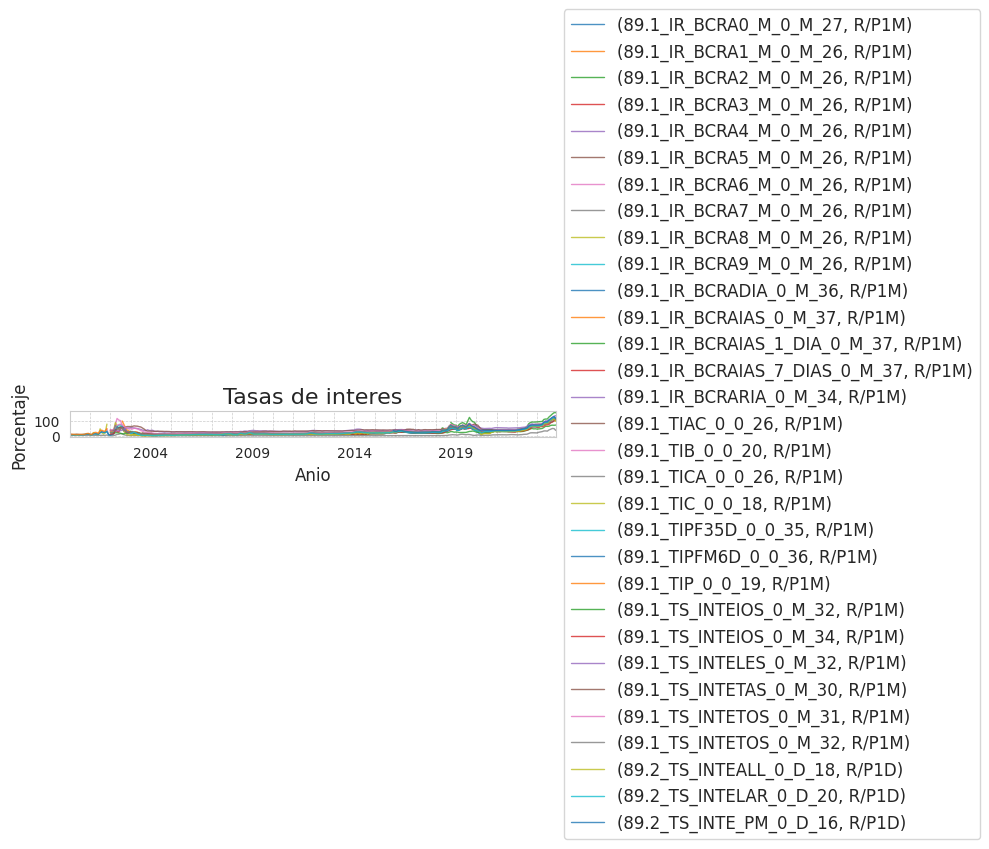

In [137]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Tasas de interes', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Porcentaje', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


In [138]:
## Comparar con ritmos de aumento, o con aumento interanual.

<Axes: xlabel='indice_tiempo'>

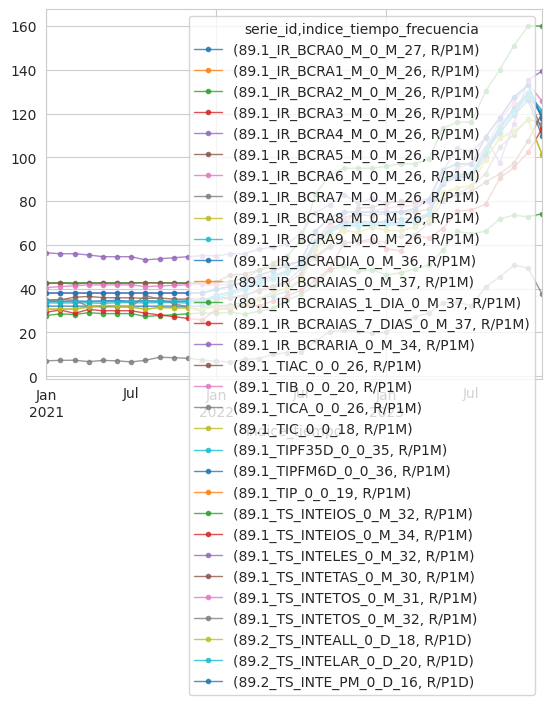

In [139]:

# Plot the data
# filtered_data.plot()
tasas_interes.dropna(how = 'all').tail(36).plot(linewidth=1, alpha = .8, marker = '.')


In [140]:
data_2021 = data.loc['2019': '2023']


In [141]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming data_2021 is loaded and contains the data for the year 2021

# Initialize dictionaries to store fit parameters and exponential detection results
fit_parameters = {}
exponential_detection = {}

# Step 3: Iterate over each series (column)
for col in data_2021.columns:

    
    # Resample to monthly frequency and compute the mean for each month
    y = data_2021[col].resample('M').mean()
    
    # Drop NaN values for linear regression
    y = y.dropna()
    
    # Skip series with all NaN values or less than 2 data points
    if len(y) < 2:
        continue
    
    # Convert time to timestamp for linear regression
    X = y.index.astype('int64').values.reshape(-1, 1) // 10**9
    
    # Take the natural logarithm of the data
    y_log = np.log(y)
    
    # Drop NaN or inf values after log transformation
    mask = ~np.isnan(y_log) & ~np.isinf(y_log)
    X = X[mask]
    y_log = y_log[mask]
    
    # Skip series if too few data points remain
    if len(y_log) < 2:
        print(f'Skipping {col} because too few data points remain after cleaning')
        continue
    
    # Fit a linear regression model
    model = LinearRegression().fit(X, y_log)
    
    # Calculate the slope, intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Calculate R^2 value
    r_squared = model.score(X, y_log)
    
    # Calculate the absolute squared error
    y_pred = np.exp(model.predict(X))
    abs_sq_err = np.sum((y[mask] - y_pred)**2)
    
    # Store the fit parameters
    fit_parameters[col] = {'slope': slope, 'intercept': intercept, 'r_squared': r_squared, 'abs_sq_err': abs_sq_err}
    
    # Determine whether the series exhibits an exponential trend
    exponential_detection[col] = r_squared > 0.965 and slope > 0


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('131.1_OIRJT_0_0_34', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('142.1_FACIL_2001_A_16', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.1_GANAN_2001_A_24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.1_INTERESES_DOS_0_A_17', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('142.1_SISTE_2001_A_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('142.2_FACIL_2001_T_16', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('142.2_GANAN_2001_T_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('142.2_INTERESES_DOS_0_T_17_11', 'R/P3M') because too few data points remain after cleaning
Skipping ('142.2_SISTE_2001_T_22', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('142.3_FACIL_2001_M_16', 'R/P1M') because too few data points remain after cleaning
Skipping ('142.3_GANAN_0_M_17', 'R/P1M') because too few data points remain after cleaning
Skipping ('142.3_GANAN_2001_M_24', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('142.3_SISTE_2001_M_22', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('144.3_AVOSOILES_0_A_18', 'R/P1Y') because too few data points remain after cleaning
Skipping ('144.3_GERNOGUAL_0_A_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('144.3_PVOSINLES_0_A_40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('144.3_SEDADESTOS_0_A_31', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('144.4_GERNOGRAL_0_T_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('144.4_PVOSINLES_0_T_40', 'R/P3M') because too few data points remain after cleaning
Skipping ('144.4_SEDADESTOS_0_T_31', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('160.1_AVOS_RERVA_0_A_15', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CCTE_INCTA_0_A_51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORDOS_0_A_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORION_0_A_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORION_0_A_58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORIOS_0_A_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_CORIOS_0_A_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINAUDA_0_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINCTA_0_A_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINUDA_0_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('160.1_CTA_FINVOS_0_A_51', 'R

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('160.2_CCTE_INCTA_0_T_51', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORDOS_0_T_49', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORION_0_T_57', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORION_0_T_58', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORIOS_0_T_41', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_CORIOS_0_T_49', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_CTA_FINUDA_0_T_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('160.2_IESOS_PERA_0_T_53', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('161.1_DA_BANCLES_0_0_50', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCTOS_0_0_36', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCUDA_0_0_33', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_BANCUDA_0_0_39', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_GOBILES_0_0_53', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_GOBITOS_0_0_40', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_GOBIUDA_0_0_42', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_OTRATOS_0_0_51', 'R/P3M') because too few data points remain after cleaning
Skipping ('161.1_DA_SOCITOS_0_0_48', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('162.1_XDAEDA_0_0_6', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('162.2_XDAEDA_0_0_6', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('162.3_XDAEDA_0_0_6', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('164.1_SABON_AVAR_0_0_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SACAO_PNES_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SALZADOTES_0_0_45', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SAL_AZUTOS_0_0_50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACERO_0_0_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACMUN_0_0_36', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACNTO_0_0_40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACRIA_0_0_35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACRIA_0_0_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SANUFACSAS_0_0_24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SAPEL_CTON_0_0_56', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.1_SEMAS_ADOS_0_0_42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SEMAS_FPEL_0_0_48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SEMAS_MRAS_0_0_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SERRAMIRIA_0_0_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SIBRAS_UAS_0_0_46', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SIDRIO_RAS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SILAMENLES_0_0_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SINC_MARAS_0_0_20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SINERALZAS_0_0_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SIQUEL_RAS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SLANTASURA_0_0_39', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.1_SPARATOTES_0_0_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRENDASNTO_0_0_47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRENDASNTO_0_0_55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SREPARASAS_0_0_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRMAS_MIOS_0_0_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCAS_0_0_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_22', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('164.1_SRODUCTCOS_0_0_56', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SANUFACSAS_0_0_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SAPEL_CTON_0_0_56', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SAQUINATES_0_0_46', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SARAGUANES_0_0_51', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SARCOS_TES_0_0_36', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SASTAS_CAS_0_0_52', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SAUCHO_RAS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SBONOSNOS_0_0_9', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEACTORNAS_0_0_40', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEDAEDA_0_0_7', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SEHICULTES_0_0_56', 'R/P3M') 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SIBRAS_UAS_0_0_46', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SIDRIO_RAS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SILAMENLES_0_0_37', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SINC_MARAS_0_0_20', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SIQUEL_RAS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SLASTICRAS_0_0_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SLFOMBRTIL_0_0_54', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SLUMAS_LES_0_0_47', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SNSTRUMIAS_0_0_58', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SNSTRUMIOS_0_0_43', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SOBRE_MBRE_0_0_27', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.2_SREPARASAS_0_0_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCAS_0_0_57', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_26', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_31', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SRODUCTCOS_0_0_42', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SSTANO_RAS_0_0_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUATA_FLES_0_0_51', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUEBLESAMA_0_0_53', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUGUETETES_0_0_50', 'R/P3M') because too few data points remain after cleaning
Skipping ('164.2_SUNDICIERO_0_0_25', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SAPEL_CTON_0_0_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SAQUINATES_0_0_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SARAGUANES_0_0_51', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SAUCHO_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SBONOSNOS_0_0_9', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEACTORNAS_0_0_40', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEDAEDA_0_0_7', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEHICULTES_0_0_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEJIDOSLES_0_0_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SEJIDO_NTO_0_0_15', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SELAS_IDAS_0_0_43', 'R/P1M') 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SIDRIO_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SILAMENLES_0_0_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SINC_MARAS_0_0_20', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SIQUEL_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SLASTICRAS_0_0_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SLFOMBRTIL_0_0_54', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SLUMAS_LES_0_0_47', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SNSTRUMIAS_0_0_58', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SNSTRUMIOS_0_0_43', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SOBRE_MBRE_0_0_27', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SOMAS_RLES_0_0_48', 'R/

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('164.3_SRODUCTCOS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_26', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_31', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SRODUCTCOS_0_0_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SSTANO_RAS_0_0_22', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SUATA_FLES_0_0_51', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SUEBLESAMA_0_0_53', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SUGUETETES_0_0_50', 'R/P1M') because too few data points remain after cleaning
Skipping ('164.3_SXTRACTTOS_0_0_51', 'R/P1M') because too few data points remain after cleaning
Skipping ('166.1_AI_MENODOS_0_0_48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('166.1_OBJETOS_VASOS_A_0_0_16_

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('166.2_AI_MENODOS_0_0_48', 'R/P3M') because too few data points remain after cleaning
Skipping ('166.2_OBJETOS_VASOS_T_0_0_16_70', 'R/P3M') because too few data points remain after cleaning
Skipping ('166.2_OS_RENTTAS_0_0_12', 'R/P3M') because too few data points remain after cleaning
Skipping ('166.2_RAS_NETEXT_0_0_25', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('167.1_SO_EXT_IOS_2004_0_18', 'R/P1Y') because too few data points remain after cleaning
Skipping ('167.1_TSF_CAPNET_2004_0_14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('167.1_TSF_COREXT_2004_0_21', 'R/P1Y') because too few data points remain after cleaning
Skipping ('167.2_SO_EXT_IOS_2004_0_18', 'R/P3M') because too few data points remain after cleaning
Skipping ('167.2_TSF_CAPNET_2004_0_14', 'R/P3M') because too few data points remain after cleaning
Skipping ('167.2_TSF_COREXT_2004_0_21', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('174.1_T_INTERO_II_0_0_57', 'R/P1M') because too few data points remain after cleaning
Skipping ('174.1_T_INTERS_0_0_56', 'R/P1M') because too few data points remain after cleaning
Skipping ('174.1_T_INTERUS_0_0_58', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('179.1_AF19_YIELDELD_0_0_10_69', 'R/P1D') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('182.1_CUENTA_CORIOS_0_M_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('182.1_CUENTA_CORRIO_0_M_49', 'R/P1M') because too few data points remain after cleaning
Skipping ('182.1_CUENTA_CORSES_0_M_59', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('182.1_C_CORR_INGTAS_0_M_57', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('185.1_TOTAL_SERVIOS_0_M_15', 'R/P1M') because too few data points remain after cleaning
Skipping ('186.1_PLAN_FAMILIAL_0_0_30', 'R/P1Y') because too few data points remain after cleaning
Skipping ('186.1_PROGRAMA_JDOS_0_0_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('186.1_PROGRAMA_RINA_0_0_39', 'R/P1Y') because too few data points remain after cleaning
Skipping ('186.1_SEGURO_DESTRE_0_0_24', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('186.2_PLAN_FAMILIAL_0_0_30', 'R/P3M') because too few data points remain after cleaning
Skipping ('186.2_PROGRAMA_JDOS_0_0_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('186.2_PROGRAMA_RINA_0_0_39', 'R/P3M') because too few data points remain after cleaning
Skipping ('186.2_SEGURO_DESTRE_0_0_24', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('300.1_AP_PAS_ASIDEG_0_M_54', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('300.1_AP_PAS_OBLVAS_0_M_49', 'R/P1M') because too few data points remain after cleaning
Skipping ('300.1_LEBAQ_NOBABAC_0_M_11_69', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('300.2_AP_ACT_TITCTS_0_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('300.2_AP_ACT_TITERO_0_A_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('300.2_AP_PAS_ASIDEG_0_A_54', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('300.2_AP_PAS_OBLVAS_0_A_49', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('322.1_SALDOLDO__5', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('323.1_C_EXPLOTACDAD__50', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_E_ELECTRICDAD__45', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('323.1_I_TRANSPORDAD__64', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('323.1_L_ADM_PUBLDAD__66', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_L_ADM_PUBLUTO__60', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_L_ADM_PUBLXTO__64', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_M_ENSENIANDAD__34', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('323.1_O_OTRAS_ACDAD__56', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('323.1_P_HOGARES_ACT__46', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_P_HOGARES_UTO__58', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_P_HOGARES_XTO__61', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRIADO__46', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRIDAD__36', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRIXTO__34', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_SIN_DISTRI_PB__21', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_TOTAL_EXCLDAD__51', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_TOTAL_GENEDAD__35', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('323.1_TOTAL_SECTDAD__42', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_TOTAL_SECTUTO__48', 'R/P3M') because too few data points remain after cleaning
Skipping ('323.1_TOTAL_SECTXTO__40', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('331.1_PASES_REDETOS__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('331.1_RESCATE_CUDAS__5', 'R/P1M') because too few data points remain after cleaning
Skipping ('331.1_TITULOS_DECRA__20', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('331.2_PASES_REDETOS__51', 'R/P1D') because too few data points remain after cleaning
Skipping ('331.2_RESCATE_CUDAS__5', 'R/P1D') because too few data points remain after cleaning
Skipping ('331.2_TITULOS_DECRA__20', 'R/P1D') because too few data points remain after cleaning
Skipping ('332.1_BANCOS_PRIADO__33', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('332.1_BANCOS_PRIRIV__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('332.1_BANCOS_PRIRIV__45', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('332.1_ENTIDADES_UAL__45', 'R/P1Y') because too few data points remain after cleaning
Skipping ('332.1_ENTIDADES_UAL__52', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('332.2_BANCOS_PRIADO__33', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.1_BANCOS_EXTDAD_A_42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTIAS_A_35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTICO_A_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTION_A_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTROS_A_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTSES_A_52', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_EXTVAS_A_35', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('333.1_BANCOS_PRIDAD_A_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIDAD__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIIAS__27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIIAS__31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIICO__32', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIICO__36', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIION__30', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIION__34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRINCS__35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRINCS__39', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIORI_A_19', '

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.1_BANCOS_PRISES__41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRISES__45', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIVAS_A_34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PRIVAS__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBDAD__32', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBIAS_A_29', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBICO__31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBION__29', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBNCS_A_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBROS__19', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.1_BANCOS_PUBSES__40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_BANCOS_PUBVAS_A_29', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANADO_A_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANADO_A_53', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANDAD_A_44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANIAS__34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANION__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANNCS__42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANORI_A_22', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('333.1_ENTI_FINANPUB_A_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANROS__27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANSES_A_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANSES__48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANTAL__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_ENTI_FINANVAS_A_37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANDAD__33', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANIAS__27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANICO_A_57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANION__30', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANNCS__35',

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.1_SIST_FINANSES__41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.1_SIST_FINANVAS__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTDAD_M_42', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTICO_M_59', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTION_M_38', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('333.2_BANCOS_EXTROS_M_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTSES_M_52', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_EXTVAS_M_35', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIDAD_M_41', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIDAD__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIICO_M_58', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIICO__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIION__33', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('333.2_BANCOS_PRIION__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIRIO_M_35', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIRIO__31', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIROS_M_36', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIROS__32', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('333.2_BANCOS_PRISES_M_51', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRISES__47', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIVAS_M_30', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PRIVAS_M_34', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBDAD__36', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBICO__56', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBION_M_32', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.2_BANCOS_PUBROS_M_31', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBSES_M_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_BANCOS_PUBVAS__29', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANDAD_M_44', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANICO__64', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANION_M_40', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.2_ENTI_FINANRIO__38', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANROS_M_39', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANSES__54', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_ENTI_FINANVAS_M_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANDAD_M_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANICO__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANION__33', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('333.2_SIST_FINANROS_M_32', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANSES__47', 'R/P1M') because too few data points remain after cleaning
Skipping ('333.2_SIST_FINANVAS__30', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('334.1_BCOS_PRIV_BIR18__56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_BIR__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_BIR__59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_COT16__60', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_COT__56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_COT__60', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_BCOS_PRIV_DRO_1V__59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_DRO__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_DRO__59', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.1_BCOS_PRIV_IOR23__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IOR__40', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IOR__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IVO7__51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IVO__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_IVO__48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_MOS14__46', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_MOS__42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_MOS__46', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_BCOS_PRIV_OS16__58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_OS__54', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PRIV_OS__58', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_BCOS_PUB_ABIR__54', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_ACOT__55', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_AIVO__47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_AMOS__41', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_BCOS_PUB_A_OS__53', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_PDAS__41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_BCOS_PUB_PDRO__54', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.1_EFNB_ACTIVBIR__50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVCOT__51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVICO__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVIOR__35', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVIVO__43', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_ACTIVMOS__37', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_EFNB_ACTIV_OS__49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVCRA__49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVCTE__47', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVDRO__50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_EFNB_PASIVICO__44', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_SIST_FINANBIR__57', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANCOT__58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANDRO__57', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.1_SIST_FINANIVO__50', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINANMOS__44', 'R/P1Y') because too few data points remain after cleaning
Skipping ('334.1_SIST_FINAN_OS__56', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.2_BCOS_PRIV_BIR18__56', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_BIR__55', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_BIR__59', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_COT16__60', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_COT__56', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_COT__60', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.2_BCOS_PRIV_DRO_1V__59', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_DRO__55', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_DRO__59', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.2_BCOS_PRIV_IOR23__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IOR__40', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IOR__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IVO7__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IVO__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_IVO__48', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_MOS14__46', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_MOS__42', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_MOS__46', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.2_BCOS_PRIV_OS16__58', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_OS__54', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PRIV_OS__58', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.2_BCOS_PUB_ABIR__54', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_ACOT__55', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_AIVO__46', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_AMOS__41', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.2_BCOS_PUB_A_OS__53', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_BCOS_PUB_PDRO__54', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('334.2_EFNB_ACTIVBIR__50', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVCOT__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVICO__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVIOR__35', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVIVO__42', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_ACTIVMOS__37', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('334.2_EFNB_ACTIV_OS__49', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVCRA__49', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVCTE__47', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVDRO__50', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_EFNB_PASIVICO__44', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.2_SIST_FINANBIR__57', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANCOT__58', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANDRO__57', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('334.2_SIST_FINANIVO__49', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINANMOS__44', 'R/P1M') because too few data points remain after cleaning
Skipping ('334.2_SIST_FINAN_OS__56', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('337.1_ANGOLAOLA__6', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('337.1_BOLIVIAVIA__7', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_IRAKRAK__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_KATARTAR__5', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_PAISES_BAJJOS__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_POLINESIA_CES__17', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('337.1_SUIZAIZA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_TIMOR_ORIETAL__14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('337.1_VENEZUELAELA__9', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('338.1_ANGOLAOLA__6', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('338.1_BOLIVIAVIA__7', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('338.1_KATARTAR__5', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('338.1_PAISES_BAJJOS__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_POLINESIA_CES__17', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('338.1_SUIZAIZA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_TIMOR_ORIETAL__14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('338.1_VENEZUELAELA__9', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_AFGANISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ALBANIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ANGUILAILA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ANTIGUA_BAUDA__15', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ARGELIALIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ARMENIANIA__7', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_BAHAMASMAS__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BANGLADESHESH__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BARBADOSDOS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BELICEICE__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BENINNIN__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BHUTANTAN__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BOLIVIAVIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BOSNIA_HERINA__18', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BOTSWANAANA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BRASILSIL__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_BULGARIARIA__8', 'R/P1Y') because too few data points rema

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_CABO_VERDERDE__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CAMBOYAOYA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CAMERUNRUN__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CANADAADA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CHADHAD__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CHILEILE__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_CHIPREPRE__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_COLOMBIABIA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_COMORASRAS__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_COSTA_RICAICA__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_COTE_DIVOIRE__13', 'R/P1Y') because too few data points remai

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_DOMINICAICA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_EGIPTOPTO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_EL_SALVADODOR__11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ESLOVAQUIAUIA__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ESTADOS_UNDOS__14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ESTADO_DE_INA__19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ESTONIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_ETIOPIAPIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_FILIPINASNAS__9', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_FIYIIYI__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GABONBON__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GAMBIABIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GEORGIAGIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GHANAANA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GRANADAADA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GRECIACIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GUAYANAANA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_GUINEA-BISSAU__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_HONDURASRAS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_HUNGRIARIA__7', 'R/P1Y') because too few data points remain after c

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_ISLAS_SALOMON__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_JAMAICAICA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_JORDANDAN__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_KAZAKHSTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_KENIANIA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_KIRGUISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LAOLAO__3', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LESOTOOTO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LETONIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LIBANOANO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_LIBIABIA__5', 'R/P1Y') because too few data points remain af

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_MADAGASCARCAR__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MALAWIAWI__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MALDIVASVAS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MALIALI__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MARRUECOSCOS__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MAURICIOCIO__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MAURITANIANIA__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MEJICOICO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MONGOLIALIA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MONTENEGROGRO__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_MOZAMBIQUEQUE__10', 'R/P1Y') because too few data p

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_NIGERGER__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_NIGERIARIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_NUEVA_ZELANDA__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_OMANMAN__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_PAKISTANTAN__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_PANAMAAMA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_PARAGUAYUAY__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_PERUERU__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_POLONIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_PORTUGALGAL__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_REINO_UNIDIDO__11', 'R/P1Y') because too few data points remain a

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_RUMANIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SANTA_LUCICIA__11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SANTO_TOMEIPE__19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SAN_CRISTOVES__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SAN_VICENTNAS__26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SENEGALGAL__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SERBIABIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SEYCHELLESLES__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SIERRA_LEOONA__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SINT_MAARTTEN__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_SRI_LANKANKA__9', 'R/P1Y') because t

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('339.1_TONGANGA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_TUNEZNEZ__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_TURQUIAUIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_UGANDANDA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_URUGUAYUAY__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('339.1_UZBEKISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_AFGANISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ALBANIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ANGUILAILA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ANTIGUA_BAUDA__15', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ARGELIALIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_ARMENIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BAHAMASMAS__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BANGLADESHESH__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BARBADOSDOS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BELICEICE__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_BENINNIN__5', 'R/P1Y') because too few data points 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_BURUNDINDI__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_C0TE_DIVOIRE__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CABO_VERDERDE__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CAMBOYAOYA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CAMERUNRUN__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CANADAADA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CHADHAD__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CHILEILE__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_CHIPREPRE__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_COLOMBIABIA__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_COMORASRAS__7', 'R/P1Y') because too few data points remain af

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_ETIOPIAPIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_FILIPINASNAS__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_FIYIIYI__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GABONBON__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GAMBIABIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GEORGIAGIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GHANAANA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GRANADAADA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GRECIACIA__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GUAYANAANA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_GUINEA-BISSAU__13', 'R/P1Y') because too few data points remain after 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_ISLAS_SALOMON__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_JAMAICAICA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_JORDANDAN__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_KAZAKHSTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_KENIANIA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_KIRGUISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_LAOLAO__3', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_LESOTOOTO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_LETONIANIA__7', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_LIBANOANO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_LIBIABIA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MADAGASCARCAR__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MALAWIAWI__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MALDIVASVAS__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MALIALI__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MARRUECOSCOS__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MAURICIOCIO__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MAURITANIANIA__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MEJICOICO__6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MONGOLIALIA__8', 'R/P1Y') because too few data points remai

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_MONTENEGROGRO__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MOZAMBIQUEQUE__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_MYANMARMAR__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NAMIBIABIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NEPALPAL__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NIGERGER__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NIGERIARIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_NUEVA_ZELANDA__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_OMANMAN__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_PAKISTANTAN__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_PANAMAAMA__6', 'R/P1Y') because too few data points remai

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_PARAGUAYUAY__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_PERUERU__4', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_POLONIANIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_PORTUGALGAL__8', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_REINO_UNIDIDO__11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_REPUBLICA_ANA__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_REPUBLICA_ANA__24', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_REPUBLICA_NIA__27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_REPUBLICA_OVA__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_REP_DEM_DENGO__17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_RUANDANDA__6', 'R/P1Y') because too few 

/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_SEYCHELLESLES__10', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_SIERRA_LEOONA__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_SINT_MAARTTEN__12', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_SRI_LANKANKA__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_SUDAN_DEL_SUR__13', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_TFYR_DE_MANIA__17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TONGANGA__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TUNEZNEZ__5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_TURQUIAUIA__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_UGANDANDA__6', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('340.1_URUGUAYUAY__7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('340.1_UZBEKISTANTAN__10', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('350.1_CATAMARCA_CYE__13', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_CHACO_CYECYE__9', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('350.1_JUJUY_CYECYE__9', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_LA_RIOJA_CCYE__12', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('350.1_MISIONES_CCYE__12', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('350.1_SANTIAGO_DCYE__23', 'R/P1Y') because too few data points remain after cleaning
Skipping ('350.1_SAN_JUAN_CCYE__12', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('357.1_INDETERMINLIA__21', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('363.1_PRODUCCIONRON__37', 'R/P1Y') because too few data points remain after cleaning
Skipping ('363.1_VENTAS_DE_RON__33', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('363.2_PRODUCCIONRON__37', 'R/P3M') because too few data points remain after cleaning
Skipping ('363.2_VENTAS_DE_RON__33', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('363.3_PRODUCCIONRON__37', 'R/P1M') because too few data points remain after cleaning
Skipping ('363.3_VENTAS_DE_RON__33', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('365.1_PRODUCCION_SA__38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('365.1_PRODUCCION_SA__51', 'R/P1Y') because too few data points remain after cleaning
Skipping ('365.1_VENTAS_DE_OIL_I__20', 'R/P1Y') because too few data points remain after cleaning
Skipping ('365.1_VENTAS_DE_OIL__20', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('365.2_PRODUCCION_SA__38', 'R/P3M') because too few data points remain after cleaning
Skipping ('365.2_PRODUCCION_SA__51', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('365.2_VENTAS_DE_OIL_I__20', 'R/P3M') because too few data points remain after cleaning
Skipping ('365.2_VENTAS_DE_OIL__20', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('365.3_PRODUCCION_SA__38', 'R/P1M') because too few data points remain after cleaning
Skipping ('365.3_PRODUCCION_SA__51', 'R/P1M') because too few data points remain after cleaning
Skipping ('365.3_VENTAS_DE_OIL_I__20', 'R/P1M') because too few data points remain after cleaning
Skipping ('365.3_VENTAS_DE_OIL__20', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('372.3_GTOS_CORR_017_0_A_44_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_GTOS_CORR_017__23_100', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_GTOS_CORR_017__42_66', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('372.3_RESULTADO_017__18_43', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_RESULTADO_017__36_80', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_RESULTADO_017__41_86', 'R/P1Y') because too few data points remain after cleaning
Skipping ('372.3_SUPERAVIT_017__23_94', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('372.6_GTOS_CORR_017_0_T_44_16', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_GTOS_CORR_017__42_100', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('372.6_RESULTADO_017__18_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_RESULTADO_017__36_47', 'R/P3M') because too few data points remain after cleaning
Skipping ('372.6_SUPERAVIT_017__23_67', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('372.9_GTOS_CAP_I017__37_10', 'R/P1M') because too few data points remain after cleaning
Skipping ('372.9_GTOS_CORR_017__45_32', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('372.9_ING_CORR_I017__27_83', 'R/P1M') because too few data points remain after cleaning
Skipping ('372.9_ING_CORR_O017__21_81', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('373.3_GTOS_CORR_017_0_A_44_17', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_GTOS_CORR_017__23_77', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_GTOS_CORR_017__42_0', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('373.3_RESULTADO_017__18_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('373.3_SUPERAVIT_017__23_70', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('373.6_CONTRIB_FI017__39_7', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_GTOS_CORR_017_0_T_44_69', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_GTOS_CORR_017__35_73', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('373.6_GTOS_CORR_017__42_6', 'R/P3M') because too few data points remain after cleaning
Skipping ('373.6_RESULTADO_017__18_44', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('373.6_SUPERAVIT_017__23_65', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('373.9_CONTRIB_FI017_0_M_39_10', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_CONTRIB_FI017__33_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_CONTRIB_FI017__36_80', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_CONTRIB_FI017__39_27', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_FTES_FIN_I017__22_37', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017_0_M_45_47', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017__35_4', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('373.9_GTOS_CORR_017__37_62', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_GTOS_CORR_017__43_76', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_ING_CORR_A017__37_73', 'R/P1M') because too few data points remain after cleaning
Skipping ('373.9_RESULTADO_017__18_45', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('374.3_AP_FIN_AMO017_0_A_50_30', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('374.3_RESULTADO_017__18_11', 'R/P1Y') because too few data points remain after cleaning
Skipping ('374.3_SUPERAVIT_017__23_32', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('374.6_AP_FIN_AMO017_0_T_50_32', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('374.6_GTOS_TRANS017__53_50', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('374.9_AP_FIN_AMO017_0_M_50_29', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_AP_FIN_AMO017__50_84', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_AP_FIN_AMO017__52_46', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_CONTRIB_FI017__36_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_FTES_FIN_E017_0_M_49_14', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_FTES_FIN_E017__47_92', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_GTOS_CORR_017_0_M_45_5', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('374.9_GTOS_CORR_017__23_66', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_GTOS_CORR_017__40_19', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_GTOS_CORR_017__53_7', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_I017__27_93', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_O017__21_9', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_R017__40_44', 'R/P1M') because too few data points remain after cleaning
Skipping ('374.9_ING_CORR_R017__48_17', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('375.3_GTOS_CORR_017_0_A_44_56', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_GTOS_CORR_017__42_30', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('375.3_RESULTADO_017__36_36', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_RESULTADO_017__38_60', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_RESULTADO_017__41_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('375.3_SUPERAVIT_017__43_18', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('375.6_GTOS_CORR_017_0_T_44_30', 'R/P3M') because too few data points remain after cleaning
Skipping ('375.6_GTOS_CORR_017__42_95', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('375.6_RESULTADO_017__36_25', 'R/P3M') because too few data points remain after cleaning
Skipping ('375.6_RESULTADO_017__41_19', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('375.9_FTES_FIN_E017_0_M_49_17', 'R/P1M') because too few data points remain after cleaning
Skipping ('375.9_FTES_FIN_E017__47_12', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('375.9_RESULTADO_017__36_18', 'R/P1M') because too few data points remain after cleaning
Skipping ('375.9_RESULTADO_017__41_83', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('376.3_RECURSOS_C017__33_53', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__31_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__36_67', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__38_19', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_RESULTADO_017__41_16', 'R/P1Y') because too few data points remain after cleaning
Skipping ('376.3_SUPERAVIT_017__43_33', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('376.6_RESULTADO_017__31_48', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_RESULTADO_017__36_80', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_RESULTADO_017__38_44', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_RESULTADO_017__41_59', 'R/P3M') because too few data points remain after cleaning
Skipping ('376.6_SUPERAVIT_017__43_100', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('376.9_AP_FIN_AMO017__52_58', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('377.3_GTOS_CORR_017_0_A_50_48', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__18_63', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__31_62', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__36_5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__38_29', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_RESULTADO_017__41_76', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_SUPERAVIT_017__23_41', 'R/P1Y') because too few data points remain after cleaning
Skipping ('377.3_SUPERAVIT_017__43_31', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('377.6_AP_FIN_CIN017__20_18', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_FTES_FIN_E017_0_T_49_7', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_GTOS_CORR_017_0_T_50_56', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__18_98', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__31_92', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__36_18', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__38_76', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_RESULTADO_017__41_45', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_SUPERAVIT_017__23_74', 'R/P3M') because too few data points remain after cleaning
Skipping ('377.6_SUPERAVIT_017__43_65', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('377.9_AP_FIN_CIN017__20_95', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_FTES_FIN_E017_0_M_49_78', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_GTOS_CORR_017_0_M_50_66', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_GTOS_CORR_017__28_34', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_RESULTADO_017__18_84', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_RESULTADO_017__36_70', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_RESULTADO_017__41_19', 'R/P1M') because too few data points remain after cleaning
Skipping ('377.9_SUPERAVIT_017__23_55', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('378.3_GTOS_CORR_017_0_A_38_83', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_GTOS_CORR_017_0_A_44_64', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_GTOS_CORR_017__42_90', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('378.3_ING_CORR_V017__35_7', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_RESULTADO_017__36_59', 'R/P1Y') because too few data points remain after cleaning
Skipping ('378.3_RESULTADO_017__41_83', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('378.6_GTOS_CORR_017_0_T_38_82', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_GTOS_CORR_017_0_T_44_22', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_GTOS_CORR_017__42_92', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('378.6_RESULTADO_017__36_38', 'R/P3M') because too few data points remain after cleaning
Skipping ('378.6_RESULTADO_017__41_25', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('378.9_GTOS_CORR_017_0_M_23_12', 'R/P1M') because too few data points remain after cleaning
Skipping ('378.9_GTOS_CORR_017_II_0_M_38_68', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('378.9_RESULTADO_017__36_61', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('379.3_FTES_FIN_E017__43_79', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_GTOS_CORR_017_I_0_A_44_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_GTOS_CORR_017__23_6', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_GTOS_CORR_017__42_4', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('379.3_RESULTADO_017__18_83', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_RESULTADO_017__31_14', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_RESULTADO_017__36_42', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_RESULTADO_017__41_58', 'R/P1Y') because too few data points remain after cleaning
Skipping ('379.3_SUPERAVIT_017__23_25', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('379.6_GTOS_CORR_017_I_0_T_44_24', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_GTOS_CORR_017__42_72', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/e

Skipping ('379.6_RESULTADO_017__18_10', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_RESULTADO_017__31_80', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_RESULTADO_017__36_15', 'R/P3M') because too few data points remain after cleaning
Skipping ('379.6_RESULTADO_017__41_16', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('379.9_ING_CORR_I017__27_19', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('379.9_RESULTADO_017__18_38', 'R/P1M') because too few data points remain after cleaning
Skipping ('379.9_RESULTADO_017__36_89', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('38.2_R_1994_T_8', 'R/P3M') because too few data points remain after cleaning
Skipping ('38.3_NC_1994_M_11', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('4.2_OBJETOS_VASOS_2004_T_16_84', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('41.1_FO_0_M_8', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('41.2_FO_0_T_8', 'R/P3M') because too few data points remain after cleaning
Skipping ('41.2_NNTP_0_T_28', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('41.3_FO_0_A_8', 'R/P1M') because too few data points remain after cleaning
Skipping ('41.3_NNTP_0_A_28', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda

Skipping ('430.1_MEDIANA_IP019_M_0_0_44_45', 'R/P1M') because too few data points remain after cleaning
Skipping ('430.1_MEDIANA_IP019_M_0_0_47_19', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('430.1_REM_RESULT021_M_0_0_39_76', 'R/P1M') because too few data points remain after cleaning
Skipping ('430.1_REM_RESULT022_M_0_0_39_58', 'R/P1M') because too few data points remain after cleaning
Skipping ('430.1_REM_RESULT023_M_0_0_39_65', 'R/P1M') because too few data points remain after cleaning
Skipping ('430.1_REM_RESULT023_M_0_0_39_77', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('452.1_COMBUSTIBLLES_0_A_12_22', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('452.2_FONDO_FEDERIO_0_T_23_0', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_FONDO_FEDERIO_0_T_23_1', 'R/P3M') because too few data points remain after cleaning
Skipping ('452.2_OTROS_CORRCAS_0_T_52_16', 'R/P3M') because too few data points remain after cleaning
Skipping ('452.2_OTROS_CORRCAS_0_T_52_50', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3

Skipping ('452.2_PROGRAMA_IIAS_0_T_33_1', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_PROGRAMA_IIAS_0_T_33_81', 'R/P3M') because too few data points remain after cleaning
Skipping ('452.2_RESULTADO_ERO_0_T_20_31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_RESULTADO_ERO_0_T_20_32', 'R/P3M') because too few data points remain after cleaning
Skipping ('452.2_RESULTADO_RIO_0_T_18_1', 'R/P1Y') because too few data points remain after cleaning
Skipping ('452.2_TRANSFERENIAL_0_T_54_54', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('452.3_FONDO_FEDERIO_0_M_23_90', 'R/P1M') because too few data points remain after cleaning
Skipping ('452.3_PROGRAMA_IIAS_0_M_33_38', 'R/P1M') because too few data points remain after cleaning
Skipping ('452.3_RESULTADO_ERO_0_M_20_25', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('53.1_TINSA_0_0_41', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/

Skipping ('79.1_ISCAP_0_A_33', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCAUS_0_A_27_49', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCA_0_A_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCBEL_0_A_27_38', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCB_0_A_26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCB_0_A_27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCC_0_A_25', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCEU_0_A_34', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skipping ('79.1_ISCF_0_A_27', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCI_0_A_26', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCJ_0_A_25', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCM_0_A_26_41', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.1_ISCP_0_A_28', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCRU_0_A_31', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTAI_0_A_29_5', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTM_0_A_34', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.1_ISCTN_0_A_31', 'R/P1Y') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.1_ISCTW_0_A_26_86', 'R/P1Y') because too few data points remain after cleaning
Skipping ('79.2_ISCAUS_0_A_27_34', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCA_0_A_28', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.2_ISCB_0_A_27', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCEU_0_A_34', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCF_0_A_27', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.2_ISCM_0_A_26', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.2_ISCTAI_0_A_29_82', 'R/P3M') because too few data points remain after cleaning
Skipping ('79.2_ISCTN_0_A_31', 'R/P3M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('79.3_ISCAUS_0_A_27_1', 'R/P1M') because too few data points remain after cleaning
Skipping ('79.3_ISCA_0_A_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('79.3_ISCB_0_A_27', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/en

Skipping ('90.1_DCCPRI_0_0_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('90.1_DCCPUB_0_0_28', 'R/P1M') because too few data points remain after cleaning
Skipping ('90.1_DCCT_0_0_26', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matias/anacond

Skipping ('93.1_P91DCIV_0_0_24', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_P91DCI_0_0_20', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_PM1DCIV_0_0_25', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_PM1DCI_0_0_21', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_UUM9DCIV_0_0_30', 'R/P1M') because too few data points remain after cleaning
Skipping ('93.1_UUM9DCI_0_0_26', 'R/P1M') because too few data points remain after cleaning


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [142]:
fit_parameters

{('101.1_I2ABA_2016_M_28', 'R/P1M'): {'slope': 1.5723866607242813e-08,
  'intercept': -19.43043609453536,
  'r_squared': 0.9584136849542226,
  'abs_sq_err': 2131297.9578450075},
 ('101.1_I2AB_2016_M_26', 'R/P1M'): {'slope': 1.681034377520127e-08,
  'intercept': -20.95637369092517,
  'r_squared': 0.952204828136147,
  'abs_sq_err': 6764033.891648328},
 ('101.1_I2AMS_2016_M_30', 'R/P1M'): {'slope': 1.6004454802564003e-08,
  'intercept': -19.66073135863645,
  'r_squared': 0.9542419711103378,
  'abs_sq_err': 4913434.84207351},
 ('101.1_I2BSV_2016_M_15', 'R/P1M'): {'slope': 1.5131813210976157e-08,
  'intercept': -18.36824263205284,
  'r_squared': 0.9433946136302432,
  'abs_sq_err': 3321188.614462722},
 ('101.1_I2EDH_2016_M_31', 'R/P1M'): {'slope': 1.6632922626897636e-08,
  'intercept': -20.708917852910137,
  'r_squared': 0.956819476087885,
  'abs_sq_err': 5525173.9963122755},
 ('101.1_I2ED_2016_M_13', 'R/P1M'): {'slope': 1.5286462173407368e-08,
  'intercept': -18.609627339372857,
  'r_square

<Axes: xlabel='indice_tiempo'>

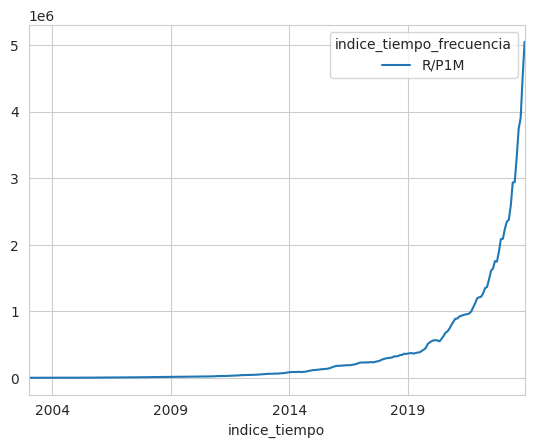

In [143]:
data['91.1_DETALLE_PRTAS_0_0_60'].dropna().plot()

In [144]:
import pandas as pd

# Convert the exponential_detection dictionary to a DataFrame
exponential_detection_df = pd.DataFrame.from_dict(exponential_detection, orient='index', columns=['is_exponential'])
exponential_detection_df.index = pd.MultiIndex.from_tuples(exponential_detection_df.index, names=['serie_id', 'indice_tiempo_frecuencia'])

# Convert the fit_parameters dictionary to a DataFrame
fit_parameters_df = pd.DataFrame.from_dict(fit_parameters, orient='index')
fit_parameters_df.index.names = exponential_detection_df.index.names

# Merge the two DataFrames based on their index
result_df = pd.merge(exponential_detection_df, fit_parameters_df, left_index=True, right_index=True).reset_index()

result_df


serie_id indice_tiempo_frecuencia  is_exponential  \
0     101.1_I2ABA_2016_M_28                    R/P1M           False   
1      101.1_I2AB_2016_M_26                    R/P1M           False   
2     101.1_I2AMS_2016_M_30                    R/P1M           False   
3     101.1_I2BSV_2016_M_15                    R/P1M           False   
4     101.1_I2EDH_2016_M_31                    R/P1M           False   
...                     ...                      ...             ...   
9712    93.1_UU68DCI_0_0_25                    R/P1M           False   
9713       94.2_CD_D_0_0_10                    R/P1D            True   
9714     94.2_UVAD_D_0_0_10                    R/P1D            True   
9715     94.2_UVID_D_0_0_10                    R/P1D            True   
9716      _ISCCAN_0_0_23_80                    R/P1M           False   

             slope  intercept  r_squared    abs_sq_err  
0     1.572387e-08 -19.430436   0.958414  2.131298e+06  
1     1.681034e-08 -20.956374   0.952205  6.764034e+06  
2     1.600445e-08 -19.660731   0.954242  4.913435e+06  
3     1.513181e-08 -18.368243   0.943395  3.321189e+06  
4     1.663292e-08 -20.708918   0.956819  5.525174e+06  
...            ...        ...        ...           ...  
9712  0.000000e+00   1.098612   1.000000  1.183291e-29  
9713  1.541706e-08 -21.493776   0.966578  8.568500e+03  
9714  1.539805e-08 -20.538807   0.966768  5.370726e+04  
9715  1.525320e-08 -20.364234   0.978004  2.870171e+04  
9716  6.371857e-09   8.294871   0.145161  3.634285e+17  

[9717 rows x 7 columns]

In [145]:
exp_indicator = result_df[['serie_id', 'is_exponential']].drop_duplicates()

In [146]:
csv_filename1 = './datos/series-tiempo.csv'
# serie = 
series_info = pd.read_csv(csv_filename1)

In [147]:
serie_exp = series_info.merge(exp_indicator, how = 'left')

In [148]:
serie_exp.head()

catalogo_id  dataset_id  distribucion_id             serie_id indice_tiempo  \
0        sspm           1              1.1  1.1_OGP_D_1993_A_17    1993-01-01   
1        sspm           1              1.1  1.1_OGP_D_1993_A_17    1994-01-01   
2        sspm           1              1.1  1.1_OGP_D_1993_A_17    1995-01-01   
3        sspm           1              1.1  1.1_OGP_D_1993_A_17    1996-01-01   
4        sspm           1              1.1  1.1_OGP_D_1993_A_17    1997-01-01   

  indice_tiempo_frecuencia          valor       serie_titulo  \
0                    R/P1Y  236520.033577  oferta_global_pib   
1                    R/P1Y  250307.886000  oferta_global_pib   
2                    R/P1Y  243186.101750  oferta_global_pib   
3                    R/P1Y  256626.244000  oferta_global_pib   
4                    R/P1Y  277441.317250  oferta_global_pib   

                        serie_unidades  \
0  Millones de pesos a precios de 1993   
1  Millones de pesos a precios de 1993   
2  Millones de pesos a precios de 1993   
3  Millones de pesos a precios de 1993   
4  Millones de pesos a precios de 1993   

                                                   serie_descripcion  \
0  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
1  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
2  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
3  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   
4  PIB desestacionalizado, en millones de pesos de 1993 y Trimestral   

                                                                                                                distribucion_descripcion  \
0  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
1  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
2  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
3  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   
4  Oferta y Demanda Globales por componente, a precios de comprador, en millones de pesos de 1993 y valores anuales desestacionalizados.   

  dataset_tema                           dataset_responsable  \
0    Actividad  Subsecretaría de Programación Macroeconómica   
1    Actividad  Subsecretaría de Programación Macroeconómica   
2    Actividad  Subsecretaría de Programación Macroeconómica   
3    Actividad  Subsecretaría de Programación Macroeconómica   
4    Actividad  Subsecretaría de Programación Macroeconómica   

                                       dataset_fuente  \
0  Instituto Nacional de Estadística y Censos (INDEC)   
1  Instituto Nacional de Estadística y Censos (INDEC)   
2  Instituto Nacional de Estadística y Censos (INDEC)   
3  Instituto Nacional de Estadística y Censos (INDEC)   
4  Instituto Nacional de Estadística y Censos (INDEC)   

                                                    dataset_titulo  \
0  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
1  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
2  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
3  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   
4  Oferta y Demanda Globales. Datos desestacionalizados. Base 1993   

  is_exponential  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [149]:
is_exponential = serie_exp.groupby(['dataset_id', 'serie_unidades', 'indice_tiempo_frecuencia', 'is_exponential']).size().unstack()
dataset_titulo = pd.DataFrame(serie_exp.groupby(['dataset_id', 'serie_unidades', 'indice_tiempo_frecuencia'])['dataset_titulo'].first())


out = pd.concat([dataset_titulo, is_exponential], axis = 1)

In [150]:
out.loc[out[True] > out[False]]

dataset_titulo  \
dataset_id serie_unidades               indice_tiempo_frecuencia                                                                                                        
4          Millones de pesos            R/P1Y                                                                                    Oferta y Demanda Globales. Base 2004   
25         Índice 2004=100              R/P1Y                                                 Índice de precios implícitos de la Oferta y Demanda Globales. Base 2004   
37         Miles de pesos               R/P3M                                                                            Ventas en centros de compras (DISCONTINUADO)   
90         Millones de pesos            R/P1M                                                                                                    Agregados monetarios   
112        Índice 2004=100              R/P1Y                                          Índice de Precios Implícitos del Producto Interno Bruto (IPI - PIB). Base 2004   
166        Millones de Pesos            R/P1Y                                                                       Ingreso nacional, Ahorro nacional y Préstamo neto   
171        Millones de pesos            R/P1Y                                                                                             Fondos Comunes de Inversión   
193        Índice base 100              R/P1M                     Índice de Precios al Consumidor de la Ciudad de Buenos Aires. Nivel general y principales aperturas   
334        Millones de pesos corrientes R/P1Y                                                                            Situación patrimonial del sistema financiero   

                                                                   False  \
dataset_id serie_unidades               indice_tiempo_frecuencia           
4          Millones de pesos            R/P1Y                      160.0   
25         Índice 2004=100              R/P1Y                       80.0   
37         Miles de pesos               R/P3M                       62.0   
90         Millones de pesos            R/P1M                     4096.0   
112        Índice 2004=100              R/P1Y                       38.0   
166        Millones de Pesos            R/P1Y                      102.0   
171        Millones de pesos            R/P1Y                       23.0   
193        Índice base 100              R/P1M                      258.0   
334        Millones de pesos corrientes R/P1Y                     1498.0   

                                                                    True  
dataset_id serie_unidades               indice_tiempo_frecuencia          
4          Millones de pesos            R/P1Y                      263.0  
25         Índice 2004=100              R/P1Y                      320.0  
37         Miles de pesos               R/P3M                      620.0  
90         Millones de pesos            R/P1M                     4864.0  
112        Índice 2004=100              R/P1Y                      779.0  
166        Millones de Pesos            R/P1Y                      221.0  
171        Millones de pesos            R/P1Y                      133.0  
193        Índice base 100              R/P1M                     2040.0  
334        Millones de pesos corrientes R/P1Y                     2506.0

In [151]:
serie.loc[serie.serie_id.str[:3] == '334'][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]

serie_id  \
7868    334.1_BCOS_PRIV_ADO11__53   
7869    334.1_BCOS_PRIV_ADO29__53   
7870     334.1_BCOS_PRIV_ADO2__53   
7871    334.1_BCOS_PRIV_ADO95__28   
7872  334.1_BCOS_PRIV_ADO_III__49   
...                           ...   
8357      334.2_SIST_FINANUBL__58   
8358   334.2_SIST_FINANVOS_76__32   
8359      334.2_SIST_FINANVOS__32   
8360      334.2_SIST_FINAN_ON__58   
8361      334.2_SIST_FINAN_OS__56   

                                                    serie_titulo  \
7868       bcos_priv_ext_activo_detalle_prestamos_sector_privado   
7869       bcos_priv_ext_pasivo_detalle_depositos_sector_privado   
7870       bcos_priv_nac_pasivo_detalle_depositos_sector_privado   
7871                                bcos_priv_ext_activo_neteado   
7872           bcos_priv_pasivo_detalle_depositos_sector_privado   
...                                                          ...   
8357  sist_financ_activo_detalle_titulos_publ_otros_titulos_publ   
8358                            sist_financ_pasivo_otros_pasivos   
8359                            sist_financ_activo_otros_activos   
8360  sist_financ_pasivo_otras_oblig_por_intermediacion_finan_on   
8361    sist_financ_activo_otros_creditos_por_interm_finan_on_os   

                    serie_unidades  \
7868  Millones de pesos corrientes   
7869  Millones de pesos corrientes   
7870  Millones de pesos corrientes   
7871  Millones de pesos corrientes   
7872  Millones de pesos corrientes   
...                            ...   
8357  Millones de pesos corrientes   
8358  Millones de pesos corrientes   
8359  Millones de pesos corrientes   
8360  Millones de pesos corrientes   
8361  Millones de pesos corrientes   

                                                                                           serie_descripcion  
7868                                          Bancos Privados Extranjeros. Activo. Préstamos. Sector Privado  
7869                                           Bancos Privados Extranjeros. Pasivo. Depósitos Sector Privado  
7870                                            Bancos Privados Nacionales. Pasivo. Depósitos Sector Privado  
7871                                                             Bancos Privados Extranjeros. Activo neteado  
7872                                                       Bancos Privados. Pasivo. Depósitos Sector Privado  
...                                                                                                      ...  
8357                                    Sistema Financiero. Activo. Títulos Públicos. Otros Títulos públicos  
8358                                                               Sistema Financiero. Pasivo. Otros pasivos  
8359                                                               Sistema Financiero. Activo. Otros activos  
8360  Sistema Financiero. Pasivo. Otras obligaciones por intermediación financiera. Obligaciones negociables  
8361                       Sistema Financiero. Activo. Otros créditos por intermediación financiera. ON y OS  

[494 rows x 4 columns]

## Situación patrimonial del sistema financiero	

In [152]:
data_ = data.loc['2019':'2024']

subset = '334'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
8349  334.2_SIST_FINANIVO__24              145                 20   
8334  334.2_SIST_FINANDOS__35              136                 20   
8325  334.2_SIST_FINANBAC__55              143                 13   
8332  334.2_SIST_FINANDES__35              133                 18   
8350  334.2_SIST_FINANIVO__49              138                 21   
8353  334.2_SIST_FINANPIA__58              132                 18   
8357  334.2_SIST_FINANUBL__58              119                 17   
8133  334.2_BCOS_PRIV_BAC__53              110                 26   
8327  334.2_SIST_FINANCOS__35              129                 17   
8344  334.2_SIST_FINANICO__51              125                 19   

      consultas_90_dias  consultas_180_dias  
8349                 20                  57  
8334                 17                  55  
8325                 17                  54  
8332                 19                  51  
8350                 16                  51  
8353                 17                  49  
8357                 15                  49  
8133                 35                  48  
8327                 17                  47  
8344                 13                  47

In [153]:
series_subset = serie.loc[serie.serie_id.isin(top_consultas.head(10).serie_id)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
data_subset = data[series_subset.serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [154]:
pd.options.display.precision = 4

In [155]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

def analyze_time_series(data, time_period='M'):
    """
    Analyzes time series data by calculating average percent change and slope of log-transformed data.
    
    :param data: DataFrame containing time series data
    :param time_period: String representing the time period for resampling ('D' for daily, 'M' for monthly, etc.)
    :return: DataFrame with average percent change and slope for each series
    """
    # Resample the data according to the specified time period
    resampled_data = data.resample(time_period).mean()
    
    # Calculate percent change
    pct_change = resampled_data.pct_change().mean()
    
    # Apply log transformation
    log_data = np.log(resampled_data + 1)  # Adding 1 to avoid log(0)
    
    # Prepare results DataFrame
    results = pd.DataFrame(index=data.columns, columns=['Average Percent Change', 'Slope'])
    results['Average Percent Change'] = pct_change
    
    # Calculate slope of log-transformed data
    for col in log_data.columns:
        y = log_data[col].dropna().values.reshape(-1, 1)
        x = np.arange(len(y)).reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        slope = model.coef_[0][0]
        results.loc[col, 'Slope'] = slope
    
    return results


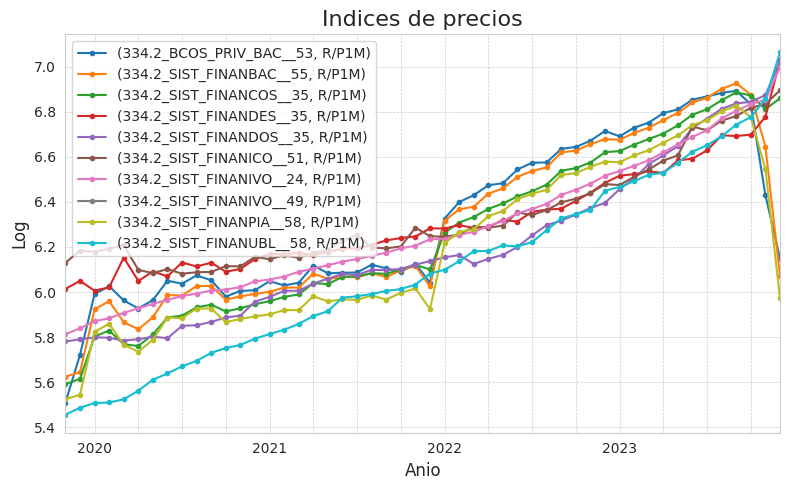

In [156]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend()

plt.tight_layout()
plt.show()


In [157]:

# Example usage:
# Assume 'aligned_data' is the DataFrame containing your time series data
analyze_time_series(data_subset.loc['2022-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                indice_tiempo_frecuencia                           
334.2_BCOS_PRIV_BAC__53 R/P1M                                    -0.0042   
334.2_SIST_FINANBAC__55 R/P1M                                     0.0031   
334.2_SIST_FINANCOS__35 R/P1M                                     0.0611   
334.2_SIST_FINANDES__35 R/P1M                                     0.0942   
334.2_SIST_FINANDOS__35 R/P1M                                     0.1064   
334.2_SIST_FINANICO__51 R/P1M                                     0.0712   
334.2_SIST_FINANIVO__24 R/P1M                                     0.0855   
334.2_SIST_FINANIVO__49 R/P1M                                        NaN   
334.2_SIST_FINANPIA__58 R/P1M                                     0.0031   
334.2_SIST_FINANUBL__58 R/P1M                                     0.1075   

                                                   Slope  
serie_id                indice_tiempo_frecuencia          
334.2_BCOS_PRIV_BAC__53 R/P1M                     0.0203  
334.2_SIST_FINANBAC__55 R/P1M                     0.0297  
334.2_SIST_FINANCOS__35 R/P1M                     0.0623  
334.2_SIST_FINANDES__35 R/P1M                     0.0626  
334.2_SIST_FINANDOS__35 R/P1M                      0.096  
334.2_SIST_FINANICO__51 R/P1M                      0.069  
334.2_SIST_FINANIVO__24 R/P1M                     0.0716  
334.2_SIST_FINANIVO__49 R/P1M                        0.0  
334.2_SIST_FINANPIA__58 R/P1M                     0.0297  
334.2_SIST_FINANUBL__58 R/P1M                     0.0841

## Valor Agregado Bruto a precios básicos por rama de actividad económica	

In [158]:
data_ = data.loc['2019':'2024']

subset = '305.2'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
5983       305.2_VALOR_AGRECOS_0_36              150                 23   
5920       305.2_AGRI_GANADTAL_0_27              128                 14   
5923   305.2_CAZA_REPOBNEX_0_T_46_2              107                 14   
5937       305.2_EXPL_MIN_COSP_0_59              114                 17   
5927  305.2_CRIA_ANIMALES_0_T_13_85              106                 16   
5942       305.2_IND_MANUFAACO_0_35              112                 17   
5936       305.2_EXPLO_MINATAL_0_22              103                 15   
5922       305.2_AGRI_GANADXOS_0_53              101                 17   
5921       305.2_AGRI_GANADXOS_0_50              111                 15   
5976  305.2_SERVICIOS_IOS_0_T_48_66               99                 16   

      consultas_90_dias  consultas_180_dias  
5983                  4                  42  
5920                  6                  38  
5923                  7                  36  
5937                  6                  35  
5927                  8                  35  
5942                  7                  34  
5936                  3                  34  
5922                  7                  33  
5921                  5                  33  
5976                  6                  33

In [159]:
series_subset = serie.loc[serie.serie_id.isin(top_consultas.serie_id)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
# # series_subset = series_subset.loc[series_subset.serie_unidades == 'Índice']
# series_subset

In [160]:
data_subset = data[series_subset.serie_id.values]

x = data_subset.dropna(how = 'all').loc['2022'].mean()
x = x.sort_values(ascending = False)

main = (x/x.sum()).cumsum().head(10)


In [161]:
data_subset = data[main.index.get_level_values('serie_id')]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



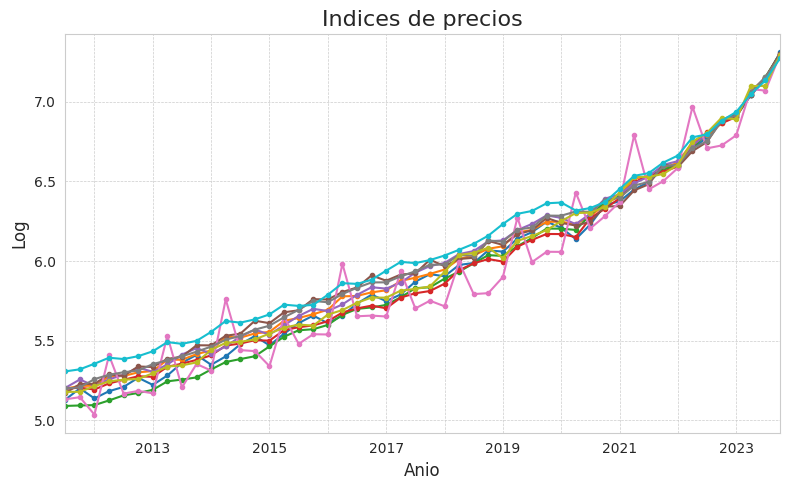

In [162]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [163]:
analyze_time_series(data_subset.loc['2020-06':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                 indice_tiempo_frecuencia                           
305.2_VALOR_AGRECOS_0_36 R/P3M                                     0.0672   
305.2_COMERCIO_MNES_0_41 R/P3M                                     0.0668   
305.2_IND_MANUFATAL_0_17 R/P3M                                     0.0686   
305.2_ACT_INMOBITAL_0_36 R/P3M                                     0.0657   
305.2_ACT_INMOBISTO_0_36 R/P3M                                     0.0723   
305.2_ADM_PUB_DERIA_0_59 R/P3M                                     0.0712   
305.2_AGRI_GANADTAL_0_27 R/P3M                                     0.1183   
305.2_ENSENIANZATAL_0_16 R/P3M                                     0.0651   
305.2_IND_MANUFADAS_0_49 R/P3M                                     0.0691   
305.2_TRANSP_COMTAL_0_17 R/P3M                                     0.0617   

                                                    Slope  
serie_id                 indice_tiempo_frecuencia          
305.2_VALOR_AGRECOS_0_36 R/P3M                     0.1669  
305.2_COMERCIO_MNES_0_41 R/P3M                     0.1665  
305.2_IND_MANUFATAL_0_17 R/P3M                     0.1712  
305.2_ACT_INMOBITAL_0_36 R/P3M                     0.1636  
305.2_ACT_INMOBISTO_0_36 R/P3M                     0.1748  
305.2_ADM_PUB_DERIA_0_59 R/P3M                      0.176  
305.2_AGRI_GANADTAL_0_27 R/P3M                     0.1599  
305.2_ENSENIANZATAL_0_16 R/P3M                     0.1658  
305.2_IND_MANUFADAS_0_49 R/P3M                     0.1647  
305.2_TRANSP_COMTAL_0_17 R/P3M                     0.1573

## Índice de Precios al Consumidor de la Provincia de San Luis. Base oct 2005 = 100		

In [164]:
data_ = data.loc['2019':'2024']

subset = '197'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
4894  197.1_NIVEL_GENERAL_2014_0_13            14125               1400   
4892  197.1_ESPARCIMIENTO_2014_0_13              792                 81   
4890    197.1_EDUCACIONION_2014_0_9              480                 74   
4891  197.1_EQUIPAMIENGAR_2014_0_32              407                 64   
4888  197.1_ALIMENTOS_DAS_2014_0_17              403                 71   
4893  197.1_INDUMENTARRIA_2014_0_12              382                 68   
4897  197.1_VIVIENDA_SCOS_2014_0_26              352                 64   
4889  197.1_ATENCION_MLUD_2014_0_28              353                 65   
4896  197.1_TRANSPORTENES_2014_0_25              344                 58   
4895  197.1_OTROS_BIENIOS_2014_0_29              329                 58   

      consultas_90_dias  consultas_180_dias  
4894               1684                4792  
4892                 91                 213  
4890                 85                 187  
4891                 83                 185  
4888                 84                 182  
4893                 81                 176  
4897                 81                 174  
4889                 85                 173  
4896                 77                 166  
4895                 71                 161

In [165]:
# aligned_data.loc['2021':].min(1)

In [166]:
data_subset = data[top_consultas.head(10).serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



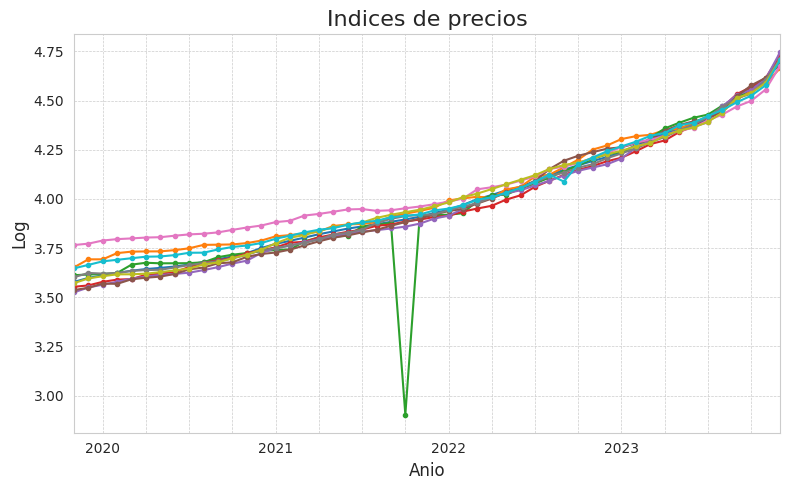

In [167]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [168]:
analyze_time_series(data_subset.loc['2022-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                      indice_tiempo_frecuencia                           
197.1_NIVEL_GENERAL_2014_0_13 R/P1M                                     0.0844   
197.1_ESPARCIMIENTO_2014_0_13 R/P1M                                     0.0752   
197.1_EDUCACIONION_2014_0_9   R/P1M                                     0.0797   
197.1_EQUIPAMIENGAR_2014_0_32 R/P1M                                     0.0906   
197.1_ALIMENTOS_DAS_2014_0_17 R/P1M                                     0.0895   
197.1_INDUMENTARRIA_2014_0_12 R/P1M                                     0.0813   
197.1_VIVIENDA_SCOS_2014_0_26 R/P1M                                     0.0728   
197.1_ATENCION_MLUD_2014_0_28 R/P1M                                     0.0849   
197.1_TRANSPORTENES_2014_0_25 R/P1M                                     0.0792   
197.1_OTROS_BIENIOS_2014_0_29 R/P1M                                     0.0837   

                                                         Slope  
serie_id                      indice_tiempo_frecuencia          
197.1_NIVEL_GENERAL_2014_0_13 R/P1M                     0.0707  
197.1_ESPARCIMIENTO_2014_0_13 R/P1M                     0.0666  
197.1_EDUCACIONION_2014_0_9   R/P1M                     0.0724  
197.1_EQUIPAMIENGAR_2014_0_32 R/P1M                     0.0769  
197.1_ALIMENTOS_DAS_2014_0_17 R/P1M                     0.0742  
197.1_INDUMENTARRIA_2014_0_12 R/P1M                     0.0698  
197.1_VIVIENDA_SCOS_2014_0_26 R/P1M                     0.0598  
197.1_ATENCION_MLUD_2014_0_28 R/P1M                     0.0714  
197.1_TRANSPORTENES_2014_0_25 R/P1M                     0.0638  
197.1_OTROS_BIENIOS_2014_0_29 R/P1M                     0.0697

In [169]:
analyze_time_series(data_subset.loc['2023-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                      indice_tiempo_frecuencia                           
197.1_NIVEL_GENERAL_2014_0_13 R/P1M                                     0.1168   
197.1_ESPARCIMIENTO_2014_0_13 R/P1M                                     0.0912   
197.1_EDUCACIONION_2014_0_9   R/P1M                                     0.1013   
197.1_EQUIPAMIENGAR_2014_0_32 R/P1M                                     0.1247   
197.1_ALIMENTOS_DAS_2014_0_17 R/P1M                                     0.1252   
197.1_INDUMENTARRIA_2014_0_12 R/P1M                                     0.1033   
197.1_VIVIENDA_SCOS_2014_0_26 R/P1M                                     0.1034   
197.1_ATENCION_MLUD_2014_0_28 R/P1M                                     0.1166   
197.1_TRANSPORTENES_2014_0_25 R/P1M                                     0.1174   
197.1_OTROS_BIENIOS_2014_0_29 R/P1M                                     0.1070   

                                                         Slope  
serie_id                      indice_tiempo_frecuencia          
197.1_NIVEL_GENERAL_2014_0_13 R/P1M                     0.1007  
197.1_ESPARCIMIENTO_2014_0_13 R/P1M                     0.0842  
197.1_EDUCACIONION_2014_0_9   R/P1M                     0.0893  
197.1_EQUIPAMIENGAR_2014_0_32 R/P1M                     0.1113  
197.1_ALIMENTOS_DAS_2014_0_17 R/P1M                     0.1061  
197.1_INDUMENTARRIA_2014_0_12 R/P1M                     0.0938  
197.1_VIVIENDA_SCOS_2014_0_26 R/P1M                     0.0858  
197.1_ATENCION_MLUD_2014_0_28 R/P1M                     0.1009  
197.1_TRANSPORTENES_2014_0_25 R/P1M                     0.0996  
197.1_OTROS_BIENIOS_2014_0_29 R/P1M                     0.0874

## Índice de Precios al Consumidor de la Provincia de Mendoza.		

In [170]:
data_ = data.loc['2019':'2024']

subset = '195'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
4883  195.1_NIVEL_GENERAL_0_0_13             2875                335   
4879    195.1_EDUCACIONION_0_0_9              748                 37   
4881  195.1_ESPARCIMIENTO_0_0_13              356                 27   
4882  195.1_INDUMENTARRIA_0_0_12              406                 39   
4880  195.1_EQUIPAMIENGAR_0_0_32              204                 19   
4877  195.1_ALIMENTOS_DAS_0_0_17              241                 21   
4885  195.1_TRANSPORTENES_0_0_25              229                 17   
4886  195.1_VIVIENDA_SCOS_0_0_26              200                 20   
4878  195.1_ATENCION_MLUD_0_0_28              196                 21   
4884  195.1_OTROS_BIENIOS_0_0_29              184                 21   

      consultas_90_dias  consultas_180_dias  
4883                370                1668  
4879                 31                 112  
4881                 28                 112  
4882                 33                 111  
4880                 25                  75  
4877                 18                  74  
4885                 17                  72  
4886                 20                  72  
4878                 20                  70  
4884                 20                  70

In [171]:
subset = '195'
series_subset = serie.loc[serie.serie_id.str.startswith(subset)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
# series_subset = series_subset.loc[series_subset.serie_unidades == 'Índice']
series_subset

serie_id                      serie_titulo  \
4877  195.1_ALIMENTOS_DAS_0_0_17                 alimentos_bebidas   
4878  195.1_ATENCION_MLUD_0_0_28      atencion_medica_gastos_salud   
4879    195.1_EDUCACIONION_0_0_9                         educacion   
4880  195.1_EQUIPAMIENGAR_0_0_32  equipamiento_mantenimiento_hogar   
4881  195.1_ESPARCIMIENTO_0_0_13                     esparcimiento   
4882  195.1_INDUMENTARRIA_0_0_12                      indumentaria   
4883  195.1_NIVEL_GENERAL_0_0_13                     nivel_general   
4884  195.1_OTROS_BIENIOS_0_0_29     otros_bienes_servicios_varios   
4885  195.1_TRANSPORTENES_0_0_25         transporte_comunicaciones   
4886  195.1_VIVIENDA_SCOS_0_0_26        vivienda_servicios_basicos   

       serie_unidades                                     serie_descripcion  
4877  Índice base 100                 Nivel de precios de alimentos bebidas  
4878  Índice base 100      Nivel de precios de atención medica gastos salud  
4879  Índice base 100                         Nivel de precios de educacion  
4880  Índice base 100  Nivel de precios de equipamiento mantenimiento hogar  
4881  Índice base 100                     Nivel de precios de esparcimiento  
4882  Índice base 100                      Nivel de precios de indumentaria  
4883  Índice base 100                    Nivel de precios del nivel general  
4884  Índice base 100     Nivel de precios de otros bienes servicios varios  
4885  Índice base 100         Nivel de precios de transporte comunicaciones  
4886  Índice base 100        Nivel de precios de vivienda servicios basicos

In [172]:
data_subset = data[series_subset.serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



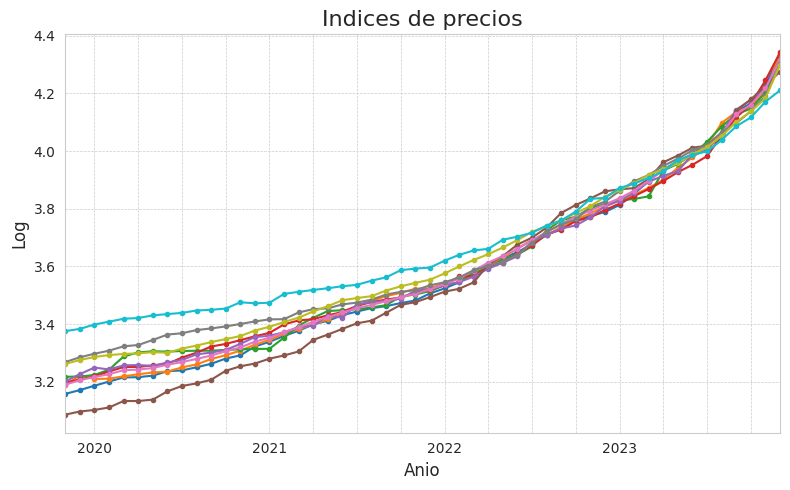

In [173]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [174]:
analyze_time_series(data_subset.loc['2022-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                                     0.0867   
195.1_ATENCION_MLUD_0_0_28 R/P1M                                     0.0896   
195.1_EDUCACIONION_0_0_9   R/P1M                                     0.0867   
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                                     0.0903   
195.1_ESPARCIMIENTO_0_0_13 R/P1M                                     0.0872   
195.1_INDUMENTARRIA_0_0_12 R/P1M                                     0.0848   
195.1_NIVEL_GENERAL_0_0_13 R/P1M                                     0.0843   
195.1_OTROS_BIENIOS_0_0_29 R/P1M                                     0.0827   
195.1_TRANSPORTENES_0_0_25 R/P1M                                     0.0783   
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                                     0.0633   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                     0.0741  
195.1_ATENCION_MLUD_0_0_28 R/P1M                     0.0735  
195.1_EDUCACIONION_0_0_9   R/P1M                      0.073  
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                     0.0742  
195.1_ESPARCIMIENTO_0_0_13 R/P1M                      0.075  
195.1_INDUMENTARRIA_0_0_12 R/P1M                     0.0713  
195.1_NIVEL_GENERAL_0_0_13 R/P1M                     0.0718  
195.1_OTROS_BIENIOS_0_0_29 R/P1M                     0.0716  
195.1_TRANSPORTENES_0_0_25 R/P1M                     0.0652  
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                     0.0589

In [175]:
analyze_time_series(data_subset.loc['2023-03':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                                     0.1203   
195.1_ATENCION_MLUD_0_0_28 R/P1M                                     0.1302   
195.1_EDUCACIONION_0_0_9   R/P1M                                     0.1319   
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                                     0.1307   
195.1_ESPARCIMIENTO_0_0_13 R/P1M                                     0.1160   
195.1_INDUMENTARRIA_0_0_12 R/P1M                                     0.1020   
195.1_NIVEL_GENERAL_0_0_13 R/P1M                                     0.1145   
195.1_OTROS_BIENIOS_0_0_29 R/P1M                                     0.1053   
195.1_TRANSPORTENES_0_0_25 R/P1M                                     0.1048   
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                                     0.0812   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
195.1_ALIMENTOS_DAS_0_0_17 R/P1M                     0.1045  
195.1_ATENCION_MLUD_0_0_28 R/P1M                      0.111  
195.1_EDUCACIONION_0_0_9   R/P1M                      0.106  
195.1_EQUIPAMIENGAR_0_0_32 R/P1M                     0.1179  
195.1_ESPARCIMIENTO_0_0_13 R/P1M                     0.1071  
195.1_INDUMENTARRIA_0_0_12 R/P1M                     0.0919  
195.1_NIVEL_GENERAL_0_0_13 R/P1M                     0.1004  
195.1_OTROS_BIENIOS_0_0_29 R/P1M                     0.0879  
195.1_TRANSPORTENES_0_0_25 R/P1M                     0.0896  
195.1_VIVIENDA_SCOS_0_0_26 R/P1M                     0.0766

## IPC. Nivel General. Base dic 2016. Mensual.

In [176]:
subset = '145.3'
series_subset = serie.loc[serie.serie_id.str.startswith(subset)][['serie_id', 'serie_titulo', 'serie_unidades', 'serie_descripcion']]
series_subset = series_subset.loc[series_subset.serie_unidades == 'Índice']
series_subset

serie_id      serie_titulo serie_unidades  \
2081  145.3_INGCUYUYO_DICI_M_11       ipc_ng_cuyo         Índice   
2082  145.3_INGGBAGBA_DICI_M_10        ipc_ng_gba         Índice   
2086  145.3_INGNACNAL_DICI_M_15   ipc_ng_nacional         Índice   
2089  145.3_INGNEANEA_DICI_M_10        ipc_ng_nea         Índice   
2092  145.3_INGNOANOA_DICI_M_10        ipc_ng_noa         Índice   
2094  145.3_INGPAMANA_DICI_M_15   ipc_ng_pampeana         Índice   
2098  145.3_INGPATNIA_DICI_M_16  ipc_ng_patagonia         Índice   

                                                  serie_descripcion  
2081               IPC. Nivel General Cuyo. Base dic 2016. Mensual.  
2082  IPC. Nivel General Gran Buenos Aires. Base dic 2016. Mensual.  
2086           IPC. Nivel General Nacional. Base dic 2016. Mensual.  
2089     IPC. Nivel General Región Noreste. Base dic 2016. Mensual.  
2092    IPC. Nivel General región Noroeste. Base dic 2016. Mensual.  
2094    IPC. Nivel General Región Pampeana. Base dic 2016. Mensual.  
2098  IPC. Nivel General Región Patagónica. Base dic 2016. Mensual.

In [177]:
data_subset = data[series_subset.serie_id.values]

aligned_data = align_time_series(data_subset, anchor_col=series_subset.serie_id.values[0])
aligned_data = aligned_data.dropna(how = 'all')

plot_data = np.log10(aligned_data).dropna(how = 'all')



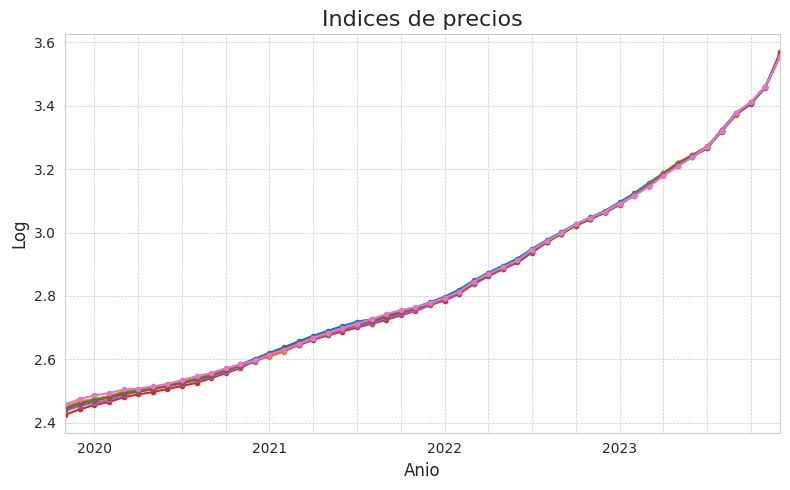

In [178]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [179]:
analyze_time_series(data_subset.loc['2022'].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                  indice_tiempo_frecuencia                           
145.3_INGCUYUYO_DICI_M_11 R/P1M                                     0.0585   
145.3_INGGBAGBA_DICI_M_10 R/P1M                                     0.0590   
145.3_INGNACNAL_DICI_M_15 R/P1M                                     0.0589   
145.3_INGNEANEA_DICI_M_10 R/P1M                                     0.0599   
145.3_INGNOANOA_DICI_M_10 R/P1M                                     0.0589   
145.3_INGPAMANA_DICI_M_15 R/P1M                                     0.0586   
145.3_INGPATNIA_DICI_M_16 R/P1M                                     0.0589   

                                                     Slope  
serie_id                  indice_tiempo_frecuencia          
145.3_INGCUYUYO_DICI_M_11 R/P1M                     0.0578  
145.3_INGGBAGBA_DICI_M_10 R/P1M                     0.0587  
145.3_INGNACNAL_DICI_M_15 R/P1M                     0.0586  
145.3_INGNEANEA_DICI_M_10 R/P1M                     0.0599  
145.3_INGNOANOA_DICI_M_10 R/P1M                     0.0589  
145.3_INGPAMANA_DICI_M_15 R/P1M                     0.0585  
145.3_INGPATNIA_DICI_M_16 R/P1M                     0.0587

In [180]:
analyze_time_series(data_subset.loc['2023'].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                  indice_tiempo_frecuencia                           
145.3_INGCUYUYO_DICI_M_11 R/P1M                                     0.1026   
145.3_INGGBAGBA_DICI_M_10 R/P1M                                     0.1037   
145.3_INGNACNAL_DICI_M_15 R/P1M                                     0.1041   
145.3_INGNEANEA_DICI_M_10 R/P1M                                     0.1075   
145.3_INGNOANOA_DICI_M_10 R/P1M                                     0.1042   
145.3_INGPAMANA_DICI_M_15 R/P1M                                     0.1046   
145.3_INGPATNIA_DICI_M_16 R/P1M                                     0.1030   

                                                     Slope  
serie_id                  indice_tiempo_frecuencia          
145.3_INGCUYUYO_DICI_M_11 R/P1M                     0.0889  
145.3_INGGBAGBA_DICI_M_10 R/P1M                     0.0904  
145.3_INGNACNAL_DICI_M_15 R/P1M                     0.0909  
145.3_INGNEANEA_DICI_M_10 R/P1M                     0.0926  
145.3_INGNOANOA_DICI_M_10 R/P1M                     0.0915  
145.3_INGPAMANA_DICI_M_15 R/P1M                     0.0912  
145.3_INGPATNIA_DICI_M_16 R/P1M                     0.0919

In [181]:
analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all'), time_period='M')


Average Percent Change  \
serie_id                  indice_tiempo_frecuencia                           
145.3_INGCUYUYO_DICI_M_11 R/P1M                                     0.1305   
145.3_INGGBAGBA_DICI_M_10 R/P1M                                     0.1287   
145.3_INGNACNAL_DICI_M_15 R/P1M                                     0.1302   
145.3_INGNEANEA_DICI_M_10 R/P1M                                     0.1366   
145.3_INGNOANOA_DICI_M_10 R/P1M                                     0.1295   
145.3_INGPAMANA_DICI_M_15 R/P1M                                     0.1313   
145.3_INGPATNIA_DICI_M_16 R/P1M                                     0.1306   

                                                     Slope  
serie_id                  indice_tiempo_frecuencia          
145.3_INGCUYUYO_DICI_M_11 R/P1M                      0.116  
145.3_INGGBAGBA_DICI_M_10 R/P1M                      0.115  
145.3_INGNACNAL_DICI_M_15 R/P1M                     0.1161  
145.3_INGNEANEA_DICI_M_10 R/P1M                     0.1198  
145.3_INGNOANOA_DICI_M_10 R/P1M                     0.1157  
145.3_INGPAMANA_DICI_M_15 R/P1M                      0.117  
145.3_INGPATNIA_DICI_M_16 R/P1M                     0.1168

## Índice de Precios al Consumidor Nacional (IPC). Base diciembre 2016.	

In [182]:
data_ = data.loc['2019':'2024']

subset = '145.1'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
1784  145.1_IPC_NG_NACNAL_DICI_T_15              515                 87   
1788     145.1_PVOSOTIONC_DICI_T_16              433                 78   
1783  145.1_IPC_NG_GBAGBA_DICI_T_10              374                 67   
1782  145.1_IPC_NG_CUYUYO_DICI_T_11              365                 71   
1787  145.1_IPC_NG_PAMANA_DICI_T_15              365                 71   
1786  145.1_IPC_NG_NOANOA_DICI_T_10              359                 71   
1785  145.1_IPC_NG_NEANEA_DICI_T_10              412                 68   

      consultas_90_dias  consultas_180_dias  
1784                 17                 157  
1788                 19                 148  
1783                 11                 140  
1782                 16                 139  
1787                 12                 139  
1786                 11                 138  
1785                 13                 137

In [183]:
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])

# plot_data = np.log10(aligned_data).dropna(how = 'all')
# plot_data = np.log10(data_subset).dropna(how = 'all')
plot_data = data_subset.dropna(how = 'all')

In [184]:
data_subset.dropna()

serie_id                 145.1_IPC_NG_CUYUYO_DICI_T_11  \
indice_tiempo_frecuencia                         R/P3M   
indice_tiempo                                            
2017-01-01                                    103.6321   
2017-04-01                                    111.0632   
2017-07-01                                    115.7212   
2017-10-01                                    122.1977   
2018-01-01                                    130.5776   
2018-04-01                                    141.3977   
2018-07-01                                    157.9296   
2018-10-01                                    182.5064   
2019-01-01                                    201.0445   
2019-04-01                                    222.5311   
2019-07-01                                    246.5203   
2019-10-01                                    280.2904   
2020-01-01                                    305.4982   
2020-04-01                                    323.5458   
2020-07-01                                    347.6297   
2020-10-01                                    385.3183   
2021-01-01                                    435.6830   
2021-04-01                                    490.1386   
2021-07-01                                    534.8391   
2021-10-01                                    582.7092   
2022-01-01                                    664.8178   
2022-04-01                                    787.2154   
2022-07-01                                    946.0589   
2022-10-01                                   1117.0343   
2023-01-01                                   1336.8284   
2023-04-01                                   1643.8560   
2023-07-01                                   2097.0791   
2023-10-01                                   2998.9594   

serie_id                 145.1_IPC_NG_GBAGBA_DICI_T_10  \
indice_tiempo_frecuencia                         R/P3M   
indice_tiempo                                            
2017-01-01                                    103.7947   
2017-04-01                                    110.5054   
2017-07-01                                    115.8295   
2017-10-01                                    121.8106   
2018-01-01                                    130.2696   
2018-04-01                                    140.5254   
2018-07-01                                    156.5943   
2018-10-01                                    178.8900   
2019-01-01                                    197.0837   
2019-04-01                                    218.6456   
2019-07-01                                    239.9612   
2019-10-01                                    270.7298   
2020-01-01                                    293.4852   
2020-04-01                                    311.6689   
2020-07-01                                    331.7589   
2020-10-01                                    364.5444   
2021-01-01                                    405.7949   
2021-04-01                                    456.4884   
2021-07-01                                    500.0944   
2021-10-01                                    552.0826   
2022-01-01                                    625.2638   
2022-04-01                                    738.6113   
2022-07-01                                    890.4747   
2022-10-01                                   1060.0553   
2023-01-01                                   1266.4872   
2023-04-01                                   1584.2495   
2023-07-01                                   2017.2380   
2023-10-01                                   2889.2142   

serie_id                 145.1_IPC_NG_NACNAL_DICI_T_15  \
indice_tiempo_frecuencia                         R/P3M   
indice_tiempo                                            
2017-01-01                                    103.8065   
2017-04-01                                    110.4482   
2017-07-01                                    115.5797   
2017-10-01                                    121.7141

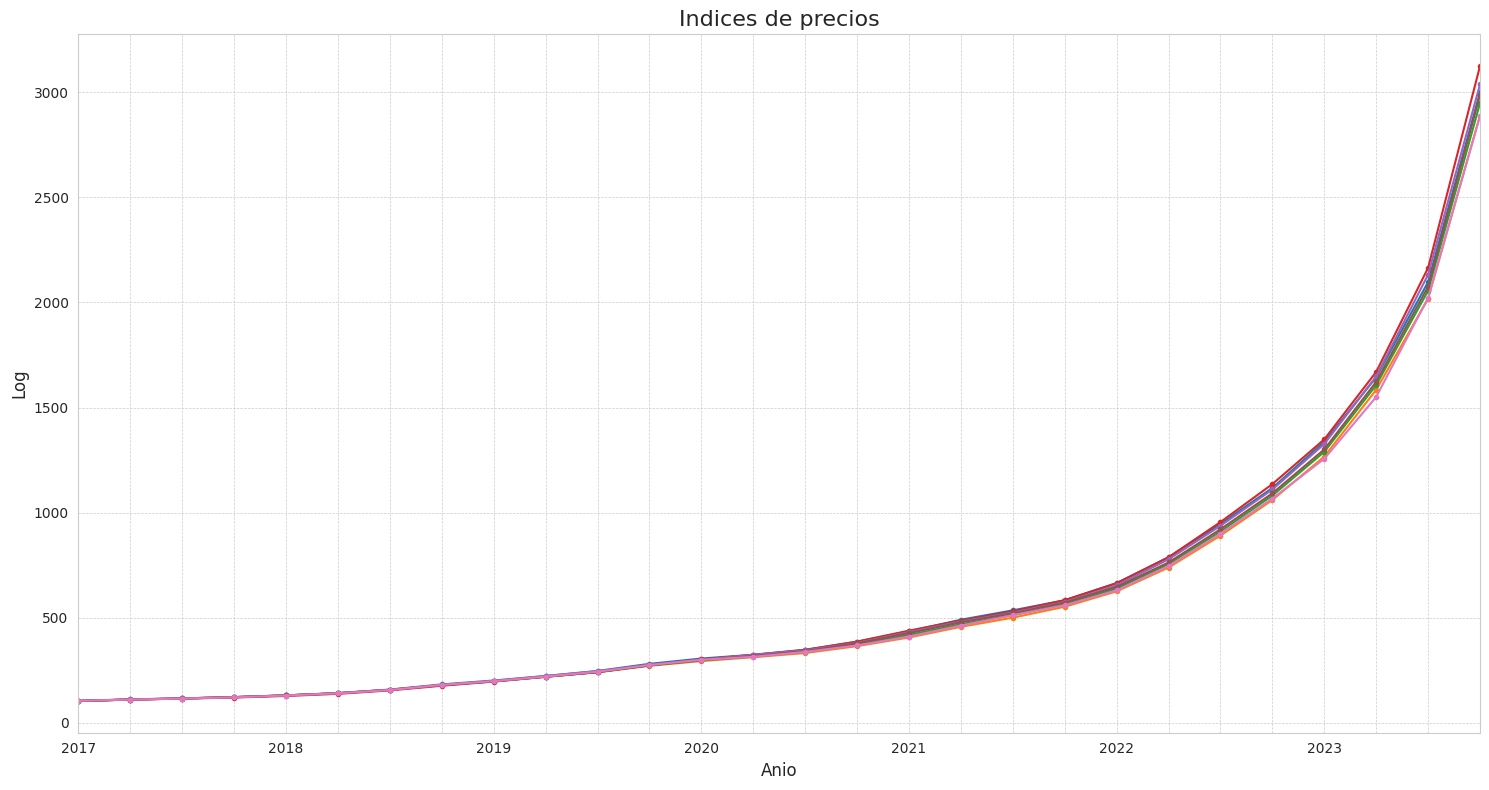

In [185]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [186]:
data_ = data.loc['2019':'2024']

subset = '145.1'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
1784  145.1_IPC_NG_NACNAL_DICI_T_15              515                 87   
1788     145.1_PVOSOTIONC_DICI_T_16              433                 78   
1783  145.1_IPC_NG_GBAGBA_DICI_T_10              374                 67   
1782  145.1_IPC_NG_CUYUYO_DICI_T_11              365                 71   
1787  145.1_IPC_NG_PAMANA_DICI_T_15              365                 71   
1786  145.1_IPC_NG_NOANOA_DICI_T_10              359                 71   
1785  145.1_IPC_NG_NEANEA_DICI_T_10              412                 68   

      consultas_90_dias  consultas_180_dias  
1784                 17                 157  
1788                 19                 148  
1783                 11                 140  
1782                 16                 139  
1787                 12                 139  
1786                 11                 138  
1785                 13                 137

In [187]:
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])

# plot_data = np.log10(aligned_data).dropna(how = 'all')
# plot_data = np.log10(data_subset).dropna(how = 'all')
plot_data = data_subset.dropna(how = 'all')

In [188]:
# data_subset.dropna()

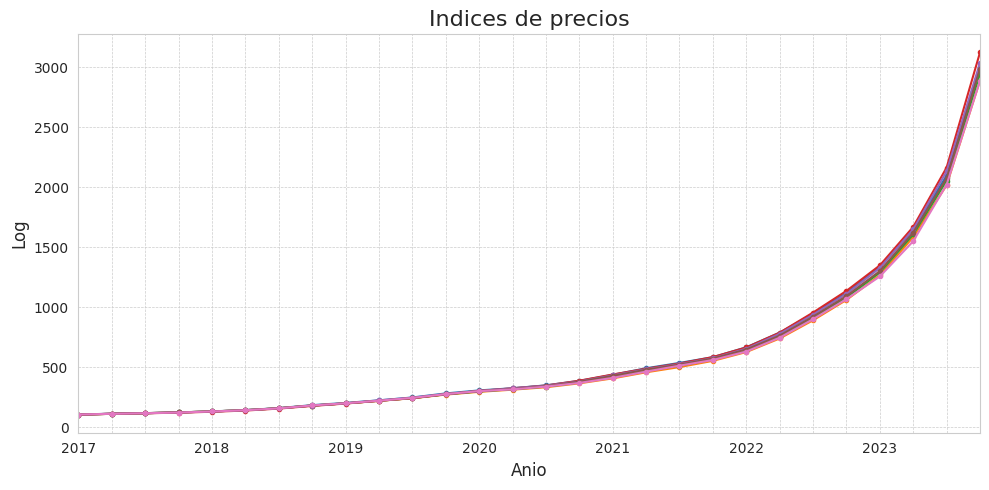

In [189]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


## Índice de Precios Implícitos del Producto Interno Bruto (IPI - PIB). Base 2004	

In [190]:
data_ = data.loc['2015':'2024']

subset = '112'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

serie_id  consultas_total  consultas_30_dias  \
928  112.1_IAGCS_2004_A_43              184                 24   
932     112.1_IC_2004_A_16              205                 27   
944      112.1_IP_2004_A_9              195                 32   
934   112.1_IEMC_2004_A_30              162                 28   
945  112.1_ISEGA_2004_A_36              180                 30   
937    112.1_IHR_2004_A_24              183                 27   
939    112.1_IIM_2004_A_27              197                 25   
946   112.1_ISPB_2004_A_31              169                 25   
938    112.1_IIF_2004_A_29              156                 25   
931  112.1_ICMMR_2004_A_45              175                 25   

     consultas_90_dias  consultas_180_dias  
928                 26                  61  
932                 23                  61  
944                 26                  60  
934                 23                  56  
945                 22                  56  
937                 24                  56  
939                 21                  55  
946                 23                  55  
938                 23                  53  
931                 23                  53

In [191]:
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col=top_consultas.serie_id.values[0])

plot_data = np.log10(aligned_data).dropna(how = 'all')

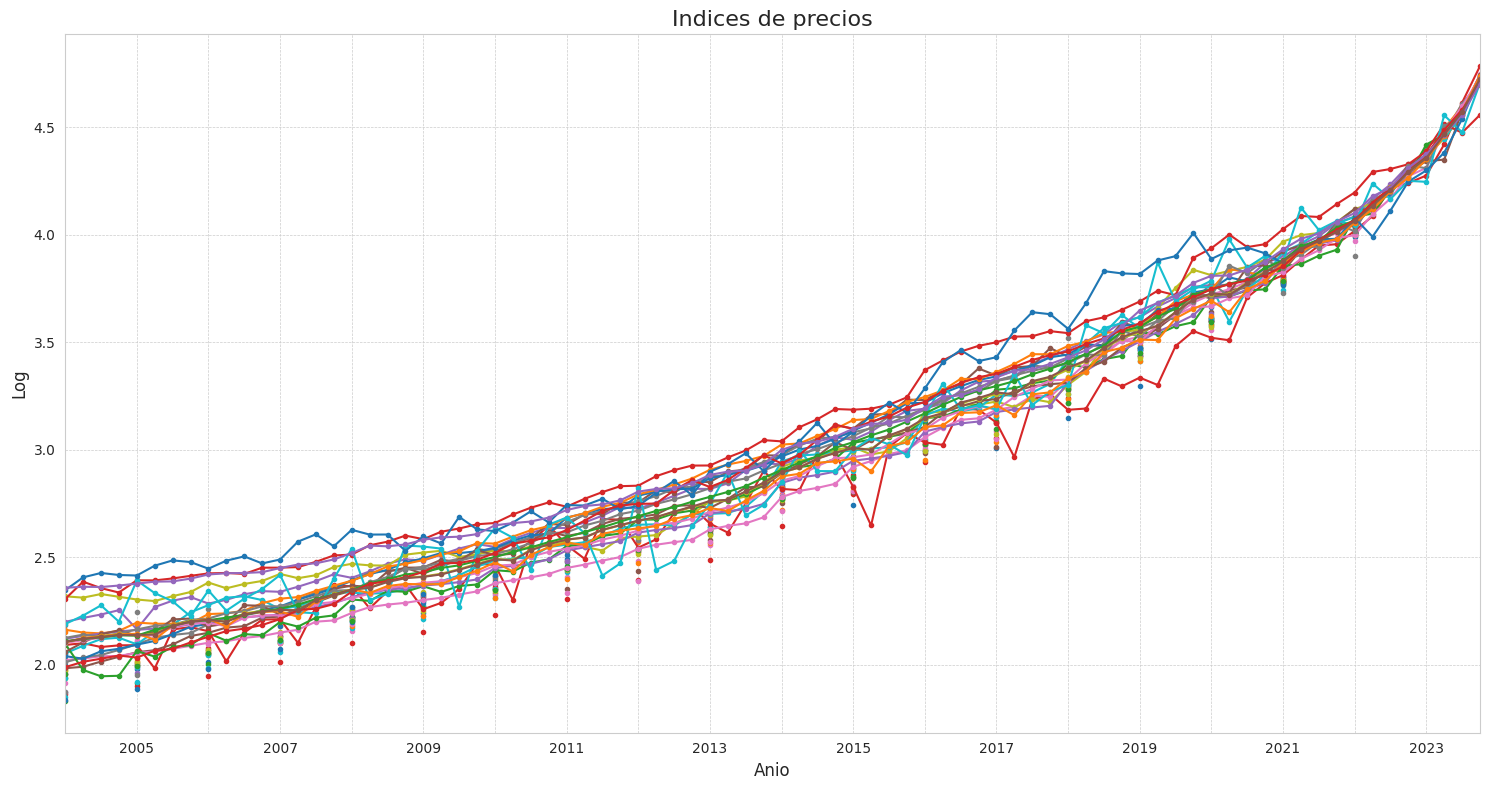

In [192]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# No legend
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [193]:
analyze_time_series(data_subset.loc['2022'].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change  \
serie_id                indice_tiempo_frecuencia                           
112.1_IAGCS_2004_A_43   R/P1Y                                     0.0000   
112.1_IAIEA_2004_A_52   R/P1Y                                     0.0000   
112.1_IAPDSS_2004_A_51  R/P1Y                                     0.0000   
112.1_ICMMR_2004_A_45   R/P1Y                                     0.0000   
112.1_IC_2004_A_16      R/P1Y                                     0.0000   
112.1_IDI_2004_A_24     R/P1Y                                     0.0000   
112.1_IEMC_2004_A_30    R/P1Y                                     0.0000   
112.1_IE_2004_A_14      R/P1Y                                     0.0000   
112.1_IHPSD_2004_A_39   R/P1Y                                     0.0000   
112.1_IHR_2004_A_24     R/P1Y                                     0.0000   
112.1_IIF_2004_A_29     R/P1Y                                     0.0000   
112.1_IIM_2004_A_27     R/P1Y                                     0.0000   
112.1_IIPNS_2004_A_39   R/P1Y                                     0.0000   
112.1_IIVA_2004_A_27    R/P1Y                                     0.0000   
112.1_IOASCSP_2004_A_45 R/P1Y                                     0.0000   
112.1_IPIBPM_2004_A_42  R/P1Y                                     0.0000   
112.1_IP_2004_A_9       R/P1Y                                     0.0000   
112.1_ISEGA_2004_A_36   R/P1Y                                     0.0000   
112.1_ISPB_2004_A_31    R/P1Y                                     0.0000   
112.1_ISPS_2004_A_34    R/P1Y                                     0.0000   
112.1_ISSS_2004_A_28    R/P1Y                                     0.0000   
112.1_ITAC_2004_A_44    R/P1Y                                     0.0000   
112.1_IVABPB_2004_A_40  R/P1Y                                     0.0000   
112.2_IAGCS_2004_T_43   R/P3M                                     0.0643   
112.2_IAIEA_2004_T_52   R/P3M                                     0.0668   
112.2_IAPDSS_2004_T_51  R/P3M                                     0.0846   
112.2_ICMMR_2004_T_45   R/P3M                                     0.0661   
112.2_IC_2004_T_16      R/P3M                                     0.0618   
112.2_IDI_2004_T_24     R/P3M                                     0.0517   
112.2_IEMC_2004_T_30    R/P3M                                     0.0503   
112.2_IE_2004_T_14      R/P3M                                     0.0732   
112.2_IHPSD_2004_T_39   R/P3M                                     0.0660   
112.2_IHR_2004_T_24     R/P3M                                     0.0526   
112.2_IIF_2004_T_29     R/P3M                                     0.0368   
112.2_IIM_2004_T_27     R/P3M                                     0.0589   
112.2_IIPNS_2004_T_39   R/P3M                                     0.0485   
112.2_IIVA_2004_T_27    R/P3M                                     0.0784   
112.2_IOASCSP_2004_T_45 R/P3M                                     0.0907   
112.2_IPIBPM_2004_T_42  R/P3M                                     0.0635   
112.2_IP_2004_T_9       R/P3M                                     0.0693   
112.2_ISEGA_2004_T_36   R/P3M                                     0.0561   
112.2_ISPB_2004_T_31    R/P3M                                     0.0584   
112.2_ISPS_2004_T_34    R/P3M                                     0.0674   
112.2_ISSS_2004_T_28    R/P3M                                     0.0670   
112.2_ITAC_2004_T_44    R/P3M                                     0.0587   
112.2_IVABPB_2004_T_40  R/P3M                                     0.0641   

                                                   Slope  
serie_id                indice_tiempo_frecuencia          
112.1_IAGCS_2004_A_43   R/P1Y                        0.0  
112.1_IAIEA_2004_A_52   R/P1Y                        0.0  
112.1_IAPDSS_2004_A_51  R/P1Y                        0.0  
112.1_ICMMR_2004_A_45   R/P1Y                        0.0  
112.1_IC_2004_A_16      R/P1Y                  

## Indice de Precios al Consumidor

In [194]:
data_ = data.loc['2019':'2024']

subset = '101'
dataset = data_[[col for col in data_.columns if subset == col[0][:len(subset)]]].dropna(how = 'all')
# dataset.plot()

display(consultas.loc[consultas.serie_id.str.startswith(subset)].sort_values(by = 'consultas_180_dias', ascending = False).head(10))

serie_id  consultas_total  consultas_30_dias  \
51         101.1_I2NG_2016_M_22           141191               1721   
54         101.1_I2TC_2016_M_19            22348                 69   
127  101.2_I2016_TRTE_2016_T_19             2235                 40   
50          101.1_I2I_2016_M_21             4511                 44   
46        101.1_I2BSV_2016_M_15              273                 42   
124  101.2_I2016_NRAL_2016_T_22            18071                 23   
128  101.2_I2016_VNDA_2016_T_17            17524                 19   
47        101.1_I2EDH_2016_M_31            21320                 34   
44         101.1_I2AB_2016_M_26              412                 30   
55          101.1_I2V_2016_M_17              425                 33   

     consultas_90_dias  consultas_180_dias  
51                 451                4681  
54                  18                2074  
127                 27                2058  
50                  15                  84  
46                   6                  62  
124                 30                  62  
128                 18                  57  
47                  12                  55  
44                  10                  53  
55                  13                  53

In [195]:
subset = '101'
data_subset = data[[col for col in data.columns if subset == col[0][:len(subset)]]]
aligned_data = align_time_series(data_subset, anchor_col='101.1_I2NG_2016_M_22')

plot_data = np.log10(aligned_data).dropna(how = 'all')

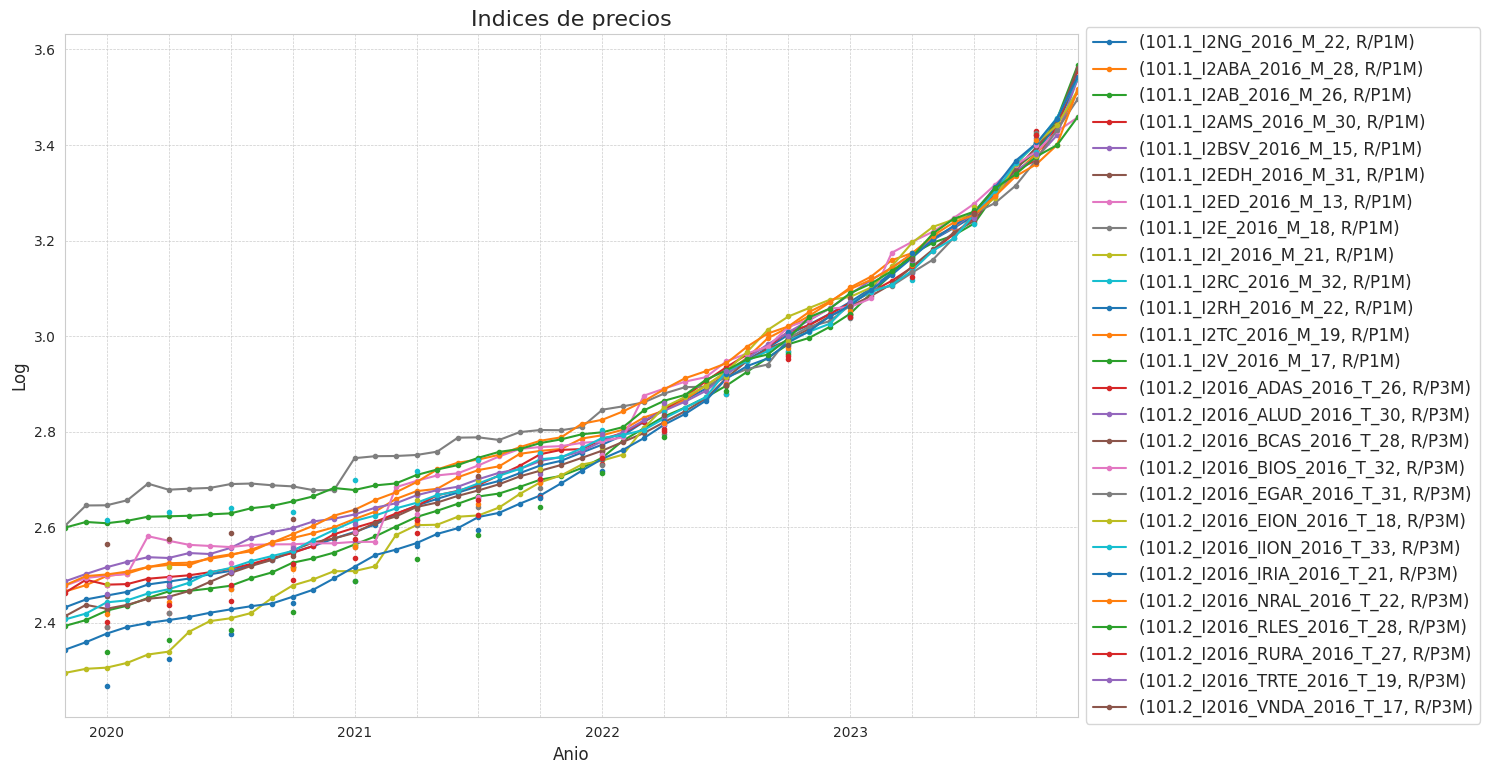

In [196]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data
# filtered_data.plot()
# tasas_interes.dropna(how = 'all').plot(ax=ax, linewidth=1, alpha = .8)
plot_data.tail(50).plot(ax = ax, marker = '.')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the minimum y-axis limit to 0
# ax.set_ylim(bottom=0)

# Add titles and labels
ax.set_title('Indices de precios', fontsize=16)
ax.set_xlabel('Anio', fontsize=12)
ax.set_ylabel('Log', fontsize=12)

# Move the legend out of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


<Axes: xlabel='indice_tiempo'>

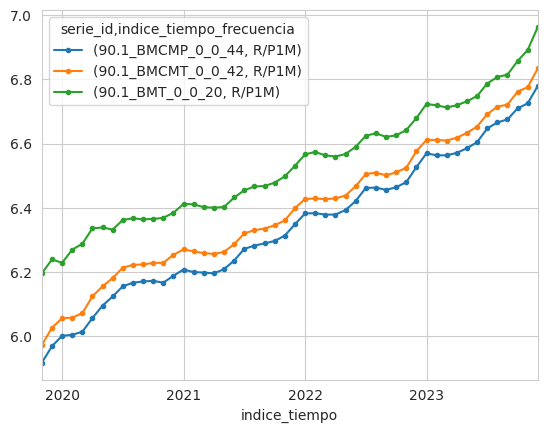

In [197]:
subset = '90.1_BM'
np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').iloc[:, 2:].tail(50).plot(marker = '.')

In [198]:
analyze_time_series(data_subset.loc['2023'].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
101.1_I2ABA_2016_M_28      R/P1M                                     0.0904   
101.1_I2AB_2016_M_26       R/P1M                                     0.1169   
101.1_I2AMS_2016_M_30      R/P1M                                     0.1094   
101.1_I2BSV_2016_M_15      R/P1M                                     0.1009   
101.1_I2EDH_2016_M_31      R/P1M                                     0.1122   
101.1_I2ED_2016_M_13       R/P1M                                     0.0879   
101.1_I2E_2016_M_18        R/P1M                                     0.0952   
101.1_I2I_2016_M_21        R/P1M                                     0.0959   
101.1_I2NG_2016_M_22       R/P1M                                     0.1037   
101.1_I2RC_2016_M_32       R/P1M                                     0.1045   
101.1_I2RH_2016_M_22       R/P1M                                     0.1064   
101.1_I2TC_2016_M_19       R/P1M                                     0.0935   
101.1_I2V_2016_M_17        R/P1M                                     0.0807   
101.2_I2016_ADAS_2016_T_26 R/P3M                                     0.0953   
101.2_I2016_ALUD_2016_T_30 R/P3M                                     0.0899   
101.2_I2016_BCAS_2016_T_28 R/P3M                                     0.0756   
101.2_I2016_BIOS_2016_T_32 R/P3M                                     0.0801   
101.2_I2016_EGAR_2016_T_31 R/P3M                                     0.0956   
101.2_I2016_EION_2016_T_18 R/P3M                                     0.0753   
101.2_I2016_IION_2016_T_33 R/P3M                                     0.0838   
101.2_I2016_IRIA_2016_T_21 R/P3M                                     0.0835   
101.2_I2016_NRAL_2016_T_22 R/P3M                                     0.0870   
101.2_I2016_RLES_2016_T_28 R/P3M                                     0.0913   
101.2_I2016_RURA_2016_T_27 R/P3M                                     0.0934   
101.2_I2016_TRTE_2016_T_19 R/P3M                                     0.0739   
101.2_I2016_VNDA_2016_T_17 R/P3M                                     0.0708   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
101.1_I2ABA_2016_M_28      R/P1M                     0.0801  
101.1_I2AB_2016_M_26       R/P1M                     0.0968  
101.1_I2AMS_2016_M_30      R/P1M                     0.0941  
101.1_I2BSV_2016_M_15      R/P1M                     0.0843  
101.1_I2EDH_2016_M_31      R/P1M                     0.0977  
101.1_I2ED_2016_M_13       R/P1M                     0.0815  
101.1_I2E_2016_M_18        R/P1M                     0.0878  
101.1_I2I_2016_M_21        R/P1M                     0.0856  
101.1_I2NG_2016_M_22       R/P1M                     0.0904  
101.1_I2RC_2016_M_32       R/P1M                     0.0971  
101.1_I2RH_2016_M_22       R/P1M                     0.0949  
101.1_I2TC_2016_M_19       R/P1M                     0.0783  
101.1_I2V_2016_M_17        R/P1M                     0.0764  
101.2_I2016_ADAS_2016_T_26 R/P3M                     0.2905  
101.2_I2016_ALUD_2016_T_30 R/P3M                     0.2831  
101.2_I2016_BCAS_2016_T_28 R/P3M                     0.2403  
101.2_I2016_BIOS_2016_T_32 R/P3M                     0.2527  
101.2_I2016_EGAR_2016_T_31 R/P3M                     0.2946  
101.2_I2016_EION_2016_T_18 R/P3M                     0.2417  
101.2_I2016_IION_2016_T_33 R/P3M                     0.2656  
101.2_I2016_IRIA_2016_T_21 R/P3M                     0.2567  
101.2_I2016_NRAL_2016_T_22 R/P3M                     0.2714  
101.2_I2016_RLES_2016_T_28 R/P3M                     0.2848  
101.2_I2016_RURA_2016_T_27 R/P3M                     0.2934  
101.2_I2016_TRTE_2016_T_19 R/P3M                     0.2346  
101.2_I2016_VNDA_2016_T_17 R/P3M                      0.229

In [199]:
analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change  \
serie_id                   indice_tiempo_frecuencia                           
101.1_I2ABA_2016_M_28      R/P1M                                     0.1163   
101.1_I2AB_2016_M_26       R/P1M                                     0.1488   
101.1_I2AMS_2016_M_30      R/P1M                                     0.1431   
101.1_I2BSV_2016_M_15      R/P1M                                     0.1289   
101.1_I2EDH_2016_M_31      R/P1M                                     0.1443   
101.1_I2ED_2016_M_13       R/P1M                                     0.0843   
101.1_I2E_2016_M_18        R/P1M                                     0.1185   
101.1_I2I_2016_M_21        R/P1M                                     0.1109   
101.1_I2NG_2016_M_22       R/P1M                                     0.1287   
101.1_I2RC_2016_M_32       R/P1M                                     0.1379   
101.1_I2RH_2016_M_22       R/P1M                                     0.1286   
101.1_I2TC_2016_M_19       R/P1M                                     0.1161   
101.1_I2V_2016_M_17        R/P1M                                     0.0859   
101.2_I2016_ADAS_2016_T_26 R/P3M                                     0.1018   
101.2_I2016_ALUD_2016_T_30 R/P3M                                     0.0870   
101.2_I2016_BCAS_2016_T_28 R/P3M                                     0.0791   
101.2_I2016_BIOS_2016_T_32 R/P3M                                     0.0817   
101.2_I2016_EGAR_2016_T_31 R/P3M                                     0.0989   
101.2_I2016_EION_2016_T_18 R/P3M                                     0.0555   
101.2_I2016_IION_2016_T_33 R/P3M                                     0.0832   
101.2_I2016_IRIA_2016_T_21 R/P3M                                     0.0838   
101.2_I2016_NRAL_2016_T_22 R/P3M                                     0.0865   
101.2_I2016_RLES_2016_T_28 R/P3M                                     0.0869   
101.2_I2016_RURA_2016_T_27 R/P3M                                     0.0903   
101.2_I2016_TRTE_2016_T_19 R/P3M                                     0.0732   
101.2_I2016_VNDA_2016_T_17 R/P3M                                     0.0569   

                                                      Slope  
serie_id                   indice_tiempo_frecuencia          
101.1_I2ABA_2016_M_28      R/P1M                     0.1052  
101.1_I2AB_2016_M_26       R/P1M                     0.1311  
101.1_I2AMS_2016_M_30      R/P1M                     0.1202  
101.1_I2BSV_2016_M_15      R/P1M                     0.1096  
101.1_I2EDH_2016_M_31      R/P1M                     0.1266  
101.1_I2ED_2016_M_13       R/P1M                     0.0825  
101.1_I2E_2016_M_18        R/P1M                     0.1077  
101.1_I2I_2016_M_21        R/P1M                     0.1068  
101.1_I2NG_2016_M_22       R/P1M                      0.115  
101.1_I2RC_2016_M_32       R/P1M                     0.1242  
101.1_I2RH_2016_M_22       R/P1M                      0.117  
101.1_I2TC_2016_M_19       R/P1M                     0.0982  
101.1_I2V_2016_M_17        R/P1M                     0.0809  
101.2_I2016_ADAS_2016_T_26 R/P3M                     0.4113  
101.2_I2016_ALUD_2016_T_30 R/P3M                      0.361  
101.2_I2016_BCAS_2016_T_28 R/P3M                     0.3331  
101.2_I2016_BIOS_2016_T_32 R/P3M                     0.3422  
101.2_I2016_EGAR_2016_T_31 R/P3M                     0.4016  
101.2_I2016_EION_2016_T_18 R/P3M                     0.2449  
101.2_I2016_IION_2016_T_33 R/P3M                     0.3476  
101.2_I2016_IRIA_2016_T_21 R/P3M                     0.3499  
101.2_I2016_NRAL_2016_T_22 R/P3M                     0.3591  
101.2_I2016_RLES_2016_T_28 R/P3M                     0.3605  
101.2_I2016_RURA_2016_T_27 R/P3M                     0.3724  
101.2_I2016_TRTE_2016_T_19 R/P3M                     0.3117  
101.2_I2016_VNDA_2016_T_17 R/P3M                     0.2503

## Agregados Monetarios


Estas series son fundamentales para entender la liquidez en el sistema financiero, la política monetaria del banco central y la salud económica en general.

### Agregados Monetarios
1. **M3* (90.1_AMTMA_0_0_43)**: Es una medida amplia de la oferta monetaria, incluyendo M3 más otros elementos.
2. **M3 (90.1_AMTM3_0_0_31)**: Incluye M2 más depósitos a plazo y otros depósitos a largo plazo.
3. **M2 (90.1_AMTM2_0_0_31)**: Incluye dinero en circulación, depósitos a la vista y otros depósitos líquidos.
4. **M2 Privado (90.1_AMTMA_0_0_39)**: M2 pero solo contando el sector privado.


<Axes: xlabel='indice_tiempo'>

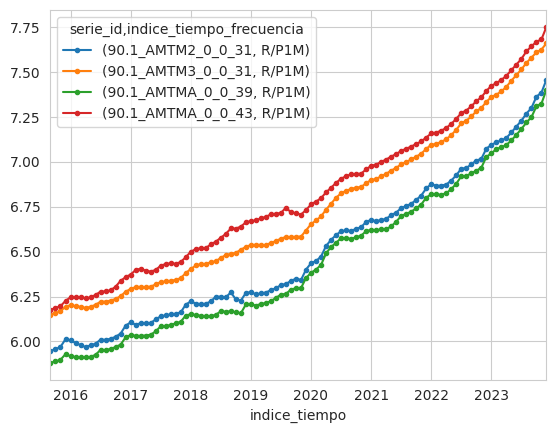

In [200]:

data_subset = data[[col for col in data.columns if '90.1_AMTM' == col[0][:len('90.1_AMTM')]]]
np.log10(data_subset).dropna(how = 'all').tail(100).plot(marker = '.')

In [201]:
analyze_time_series(data_subset.loc['2023':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change   Slope
serie_id          indice_tiempo_frecuencia                                
90.1_AMTM2_0_0_31 R/P1M                                     0.0803  0.0756
90.1_AMTM3_0_0_31 R/P1M                                     0.0649  0.0662
90.1_AMTMA_0_0_39 R/P1M                                     0.0782  0.0716
90.1_AMTMA_0_0_43 R/P1M                                     0.0719  0.0681

In [202]:
analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M')


Average Percent Change   Slope
serie_id          indice_tiempo_frecuencia                                
90.1_AMTM2_0_0_31 R/P1M                                     0.1066   0.098
90.1_AMTM3_0_0_31 R/P1M                                     0.0705  0.0667
90.1_AMTMA_0_0_39 R/P1M                                     0.1024  0.0927
90.1_AMTMA_0_0_43 R/P1M                                     0.0850  0.0742


### Depósitos Totales en Pesos
5. **Sector Público (90.1_DTPPUB_0_0_31)**: Depósitos totales del sector público en pesos.
6. **Sector Privado (90.1_DTPPRI_0_0_31)**: Depósitos totales del sector privado en pesos.
7. **Total (90.1_DTPT_0_0_29)**: Depósitos totales en pesos, incluyendo sector público y privado.


<Axes: xlabel='indice_tiempo'>

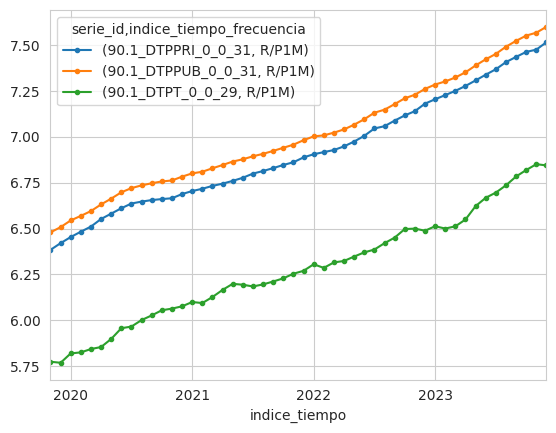

In [203]:
np.log10(data[[col for col in data.columns if '90.1_DTP' == col[0][:len('90.1_DTP')]]]).dropna(how = 'all').tail(50).plot(marker = '.')

In [204]:
data_subset = data[[col for col in data.columns if '90.1_DTP' == col[0][:len('90.1_DTP')]]]

display(analyze_time_series(data_subset.loc['2023':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))
display(analyze_time_series(data_subset.loc['2023-06':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DTPPRI_0_0_31 R/P1M                                     0.0675  0.0665
90.1_DTPPUB_0_0_31 R/P1M                                     0.0683  0.0696
90.1_DTPT_0_0_29   R/P1M                                     0.0734  0.0845

Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DTPPRI_0_0_31 R/P1M                                     0.0707  0.0659
90.1_DTPPUB_0_0_31 R/P1M                                     0.0705  0.0677
90.1_DTPT_0_0_29   R/P1M                                     0.0709  0.0758


### Base Monetaria

### Base Monetaria
8. **Total (90.1_BMT_0_0_20)**: Dinero emitido por el Banco Central, incluyendo efectivo en circulación y reservas.
9. **Circulación Monetaria Total (90.1_BMCMT_0_0_42)**: Dinero en circulación, tanto en poder del público como de entidades financieras.
10. **Circulación Monetaria Público (90.1_BMCMP_0_0_44)**: Dinero en efectivo en manos de las personas y empresas.
9. **Circulación Monetaria Total (90.1_BMCMT_0_0_42)**: Dinero en circulación, tanto en poder del público como de entidades financieras.
10. **Circulación Monetaria Público (90.1_BMCMP_0_0_44)**: Dinero en efectivo en manos de las personas y empresas.


<Axes: xlabel='indice_tiempo'>

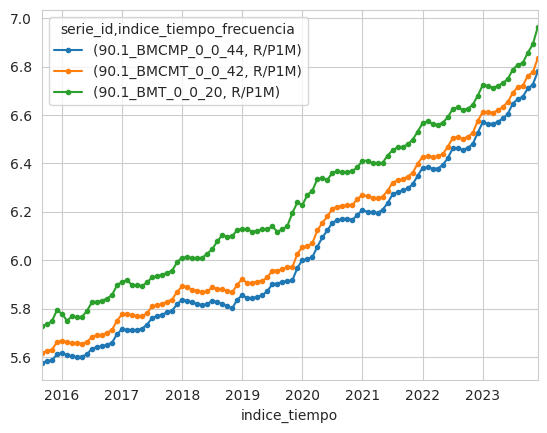

In [205]:
subset = '90.1_BM'
np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').iloc[:, 2:].tail(100).plot(marker = '.')

In [206]:
data_subset = data[[col for col in data.columns if '90.1_BM' == col[0][:len('90.1_BM')]]]

display(analyze_time_series(data_subset.loc['2020':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_BMCCB_0_0_36  R/P1M                                     0.0353  0.0185
90.1_BMCMEF_0_0_52 R/P1M                                     0.0423   0.028
90.1_BMCMP_0_0_44  R/P1M                                     0.0397  0.0341
90.1_BMCMT_0_0_42  R/P1M                                     0.0397  0.0334
90.1_BMT_0_0_20    R/P1M                                     0.0376  0.0294

In [207]:
am = data[[col for col in data.columns if '90.1_AMTM' == col[0][:len('90.1_AMTM')]]].dropna(how = 'all')
depos = data[[col for col in data.columns if '90.1_DTP' == col[0][:len('90.1_DTP')]]].dropna(how = 'all')

subset = '90.1_BM'
bm = data[[col for col in data.columns if subset == col[0][:len(subset)]]].dropna(how = 'all').iloc[:, 2:]

In [208]:
am.div(bm['90.1_BMT_0_0_20']).tail()

serie_id                 90.1_AMTM2_0_0_31 90.1_AMTM3_0_0_31  \
indice_tiempo_frecuencia             R/P1M             R/P1M   
indice_tiempo                                                  
2023-08-01                          2.8940            5.5488   
2023-09-01                          3.0597            5.8317   
2023-10-01                          3.2072            5.6604   
2023-11-01                          3.1219            5.4227   
2023-12-01                          3.1239            4.9777   

serie_id                 90.1_AMTMA_0_0_39 90.1_AMTMA_0_0_43  
indice_tiempo_frecuencia             R/P1M             R/P1M  
indice_tiempo                                                 
2023-08-01                          2.5820            6.4278  
2023-09-01                          2.7188            6.7485  
2023-10-01                          2.8347            6.4777  
2023-11-01                          2.7115            6.1787  
2023-12-01                          2.7424            6.1458

In [209]:
depos.div(bm['90.1_BMT_0_0_20']).tail()

serie_id                 90.1_DTPPRI_0_0_31 90.1_DTPPUB_0_0_31  \
indice_tiempo_frecuencia              R/P1M              R/P1M   
indice_tiempo                                                    
2023-08-01                           3.9799             4.8272   
2023-09-01                           4.1759             5.1065   
2023-10-01                           4.0330             4.9483   
2023-11-01                           3.8310             4.7409   
2023-12-01                           3.5645             4.3228   

serie_id                 90.1_DTPT_0_0_29  
indice_tiempo_frecuencia            R/P1M  
indice_tiempo                              
2023-08-01                         0.8473  
2023-09-01                         0.9307  
2023-10-01                         0.9153  
2023-11-01                         0.9099  
2023-12-01                         0.7584

In [210]:
depos.div(bm['90.1_BMT_0_0_20'])

serie_id                 90.1_DTPPRI_0_0_31 90.1_DTPPUB_0_0_31  \
indice_tiempo_frecuencia              R/P1M              R/P1M   
indice_tiempo                                                    
2003-01-01                           1.6363             1.8387   
2003-02-01                           1.6721             1.8661   
2003-03-01                           1.6417             1.8491   
2003-04-01                           1.6151             1.8218   
2003-05-01                           1.5454             1.7775   
...                                     ...                ...   
2023-08-01                           3.9799             4.8272   
2023-09-01                           4.1759             5.1065   
2023-10-01                           4.0330             4.9483   
2023-11-01                           3.8310             4.7409   
2023-12-01                           3.5645             4.3228   

serie_id                 90.1_DTPT_0_0_29  
indice_tiempo_frecuencia            R/P1M  
indice_tiempo                              
2003-01-01                         0.2023  
2003-02-01                         0.1940  
2003-03-01                         0.2074  
2003-04-01                         0.2067  
2003-05-01                         0.2320  
...                                   ...  
2023-08-01                         0.8473  
2023-09-01                         0.9307  
2023-10-01                         0.9153  
2023-11-01                         0.9099  
2023-12-01                         0.7584  

[252 rows x 3 columns]


### Depósitos Específicos
11-13. **Cuenta Corriente (90.1_DCCPUB_0_0_34, 90.1_DCCPRI_0_0_34)**: Depósitos a la vista en cuentas corrientes, diferenciados por sector público y privado.
14-15. **Caja de Ahorro (90.1_DCAPRI_0_0_29, 90.1_DCAPUB_0_0_29)**: Depósitos en cuentas de ahorro, diferenciados por sector público y privado.
16-18. **Plazos Fijos No Ajustables (90.1_DPNACUPUB_0_0_41, 90.1_DPNACUPRIV_0_0_41)**: Depósitos a plazo fijo que no se ajustan por CER/UVA, diferenciados por sector público y privado.


/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<Axes: xlabel='indice_tiempo'>

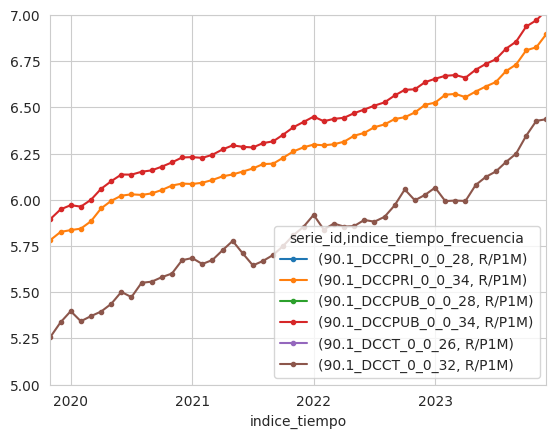

In [211]:
subset = '90.1_DCC'
np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').tail(50).plot(marker = '.', ylim = (5, 7))

In [212]:
data_subset = data[[col for col in data.columns if '90.1_DCC' == col[0][:len('90.1_DCC')]]]

display(analyze_time_series(data_subset.loc['2023-04':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DCCPRI_0_0_28 R/P1M                                        NaN     0.0
90.1_DCCPRI_0_0_34 R/P1M                                     0.1051  0.0989
90.1_DCCPUB_0_0_28 R/P1M                                        NaN     0.0
90.1_DCCPUB_0_0_34 R/P1M                                     0.1120  0.1063
90.1_DCCT_0_0_26   R/P1M                                        NaN     0.0
90.1_DCCT_0_0_32   R/P1M                                     0.1382  0.1288

In [213]:
data_subset = data[[col for col in data.columns if '90.1_DCC' == col[0][:len('90.1_DCC')]]]

display(analyze_time_series(data_subset.loc['2022-08':].dropna(how = 'all', axis = 1).dropna(how = 'all', axis = 0), time_period='M'))


Average Percent Change   Slope
serie_id           indice_tiempo_frecuencia                                
90.1_DCCPRI_0_0_28 R/P1M                                        NaN     0.0
90.1_DCCPRI_0_0_34 R/P1M                                     0.0747  0.0636
90.1_DCCPUB_0_0_28 R/P1M                                        NaN     0.0
90.1_DCCPUB_0_0_34 R/P1M                                     0.0760  0.0643
90.1_DCCT_0_0_26   R/P1M                                        NaN     0.0
90.1_DCCT_0_0_32   R/P1M                                     0.0852  0.0663

### Plazos Fijos Desagregados
19-25. **Detalle Desagregado de Plazo Fijo (90.1_DET_DESAGRTAL_0_0_38, 90.1_DET_DESAGRTAS_0_0_58, 90.1_DET_DESAGRTAS_VI_O_0_0_53, etc.)**: Desglose detallado de los plazos fijos, incluyendo total, mayoristas, minoristas, y diferenciados por duración.


In [214]:
# subset = '90.1_DET_DESAGRTA'
# np.log10(data[[col for col in data.columns if subset == col[0][:len(subset)]]]).dropna(how = 'all').tail(50).plot(marker = '.')



### Relaciones
- **Base Monetaria** es parte de **M1**, que a su vez es parte de **M2**.
- **M2** incluye **M1** más depósitos a plazo y otros depósitos líquidos.
- **M3** añade a **M2** depósitos a plazo más grandes y otros depósitos a largo plazo.
- **M3*** es una versión aún más amplia de **M3**.
- **Depósitos Totales en Pesos** incluyen todas las formas de depósitos en el sistema financiero.
- **Depósitos Específicos** y **Plazos Fijos Desagregados** proporcionan un desglose más detallado de los tipos de depósitos.



In [215]:
dataset_no = '90.'

data_ = data.loc['2000':'2024']

dataset = data_[[col for col in data_.columns if dataset_no == col[0][:len(dataset_no)]]].dropna(how = 'all')

In [216]:
pd.options.display.max_rows = 120

In [217]:
series_info.loc[series_info.dataset_id == 90][['serie_id', 'serie_descripcion']].drop_duplicates()

serie_id  \
2651971                 90.1_BMT_0_0_20   
2652227               90.1_BMCMT_0_0_42   
2652483               90.1_BMCMP_0_0_44   
2652739              90.1_BMCMEF_0_0_52   
2652995               90.1_BMCCB_0_0_36   
2653251                90.1_DCCT_0_0_32   
2653507              90.1_DCCPRI_0_0_34   
2653763              90.1_DCCPUB_0_0_34   
2654019                90.1_DCAT_0_0_27   
2654275              90.1_DCAPUB_0_0_29   
2654531              90.1_DCAPRI_0_0_29   
2654787             90.1_DPNACUT_0_0_39   
2655043          90.1_DPNACUPRIV_0_0_41   
2655299           90.1_DPNACUPUB_0_0_41   
2655555              90.1_DPACUT_0_0_36   
2655811            90.1_DPACUPUB_0_0_38   
2656067            90.1_DPACUPRI_0_0_38   
2656323                90.1_DODT_0_0_31   
2656579              90.1_DODPRI_0_0_33   
2656835              90.1_DODPUB_0_0_33   
2657091                90.1_DCCT_0_0_26   
2657347              90.1_DCCPRI_0_0_28   
2657603              90.1_DCCPUB_0_0_28   
2657859                90.1_DTPT_0_0_29   
2658115              90.1_DTPPRI_0_0_31   
2658371              90.1_DTPPUB_0_0_31   
2658627                90.1_DTDT_0_0_31   
2658883              90.1_DTDPRI_0_0_33   
2659139              90.1_DTDPUB_0_0_33   
2659395               90.1_AMTM2_0_0_31   
2659651               90.1_AMTM3_0_0_31   
2659907               90.1_AMTMA_0_0_43   
2660163               90.1_AMTMA_0_0_39   
2660419       90.1_DET_DESAGRICO_0_0_37   
2660675        90.1_DET_DESAGRIV_0_0_35   
2660931       90.1_DET_DESAGRTAL_0_0_31   
2661187       90.1_DET_DESAGRICO_0_0_40   
2661443        90.1_DET_DESAGRIV_0_0_38   
2661699       90.1_DET_DESAGRTAL_0_0_34   
2661955    90.1_DET_DESAGRICO_II_0_0_39   
2662211        90.1_DET_DESAGRIV_0_0_37   
2662467       90.1_DET_DESAGRTAL_0_0_33   
2662723       90.1_DET_DESAGRICO_0_0_39   
2662979      90.1_DET_DESAGRIV_V_0_0_37   
2663235     90.1_DET_DESAGRTAL_V_0_0_33   
2663491       90.1_DET_DESAGRTAL_0_0_44   
2663747       90.1_DET_DESAGRTAS_0_0_49   
2664003    90.1_DET_DESAGRTAS_II_0_0_49   
2664259       90.1_DET_DESAGRIAS_0_0_52   
2664515       90.1_DET_DESAGRIAS_0_0_49   
2664771       90.1_DET_DESAGRIAS_0_0_50   
2665027       90.1_DET_DESAGRIAS_0_0_51   
2665283       90.1_DET_DESAGRMAS_0_0_46   
2665539       90.1_DET_DESAGRTAL_0_0_42   
2665795       90.1_DET_DESAGRTAS_0_0_52   
2666051   90.1_DET_DESAGRTAS_III_0_0_47   
2666307     90.1_DET_DESAGRIAS_X_0_0_50   
2666563   90.1_DET_DESAGRIAS_III_0_0_47   
2666819       90.1_DET_DESAGRIAS_0_0_53   
2667075       90.1_DET_DESAGRIAS_0_0_54   
2667331       90.1_DET_DESAGRMAS_0_0_49   
2667587       90.1_DET_DESAGRTAL_0_0_38   
2667843       90.1_DET_DESAGRTAS_0_0_58   
2668099  90.1_DET_DESAGRTAS_VI_O_0_0_53   
2668355       90.1_DET_DESAGRIAS_0_0_61   
2668611       90.1_DET_DESAGRIAS_0_0_58   
2668867       90.1_DET_DESAGRIAS_0_0_59   
2669123       90.1_DET_DESAGRIAS_0_0_60   
2669379       90.1_DET_DESAGRMAS_0_0_55   

                                                                                                                                        serie_descripcion  
2651971                                                                                    Base monetaria total. Promedios mensuales en millones de pesos  
2652227                                                             Base monetaria. Circulación monetaria total. Promedios mensuales en millones de pesos  
2652483                                              Base monetaria. Circulación monetaria en poder del público. Promedios mensuales en millones de pesos  
2652739                                 Base monetaria. Circulación monetaria en poder de entidades financieras. Promedios mensuales en millones de pesos  
2652995                                                               Base monetaria. Cuenta corriente del BCRA. Promedios mensuales en millones de pesos  
2653251                                                                         Depó

In [218]:
data.head().columns.get_level_values('indice_tiempo_frecuencia').value_counts()

indice_tiempo_frecuencia
R/P1Y    6553
R/P1M    5507
R/P3M    5051
R/P6M     392
R/P1D     365
Name: count, dtype: int64

In [219]:
totales_bm = dataset.resample('Y').mean().sum().reset_index().rename(columns = {0: 'Total'})
totales_bm

serie_id indice_tiempo_frecuencia       Total
0                90.1_AMTM2_0_0_31                    R/P1M  4.5810e+07
1                90.1_AMTM3_0_0_31                    R/P1M  8.0738e+07
2                90.1_AMTMA_0_0_39                    R/P1M  4.0607e+07
3                90.1_AMTMA_0_0_43                    R/P1M  9.5072e+07
4                90.1_BMCCB_0_0_36                    R/P1M  5.5802e+06
5               90.1_BMCMEF_0_0_52                    R/P1M  1.7565e+06
6                90.1_BMCMP_0_0_44                    R/P1M  1.4217e+07
7                90.1_BMCMT_0_0_42                    R/P1M  1.5974e+07
8                  90.1_BMT_0_0_20                    R/P1M  2.1559e+07
9               90.1_DCAPRI_0_0_29                    R/P1M  1.5278e+07
10              90.1_DCAPUB_0_0_29                    R/P1M  1.4525e+07
11                90.1_DCAT_0_0_27                    R/P1M  7.5267e+05
12              90.1_DCCPRI_0_0_28                    R/P1M  1.4034e+04
13              90.1_DCCPRI_0_0_34                    R/P1M  1.1865e+07
14              90.1_DCCPUB_0_0_28                    R/P1M  1.4105e+04
15              90.1_DCCPUB_0_0_34                    R/P1M  1.6310e+07
16                90.1_DCCT_0_0_26                    R/P1M  7.0466e+01
17                90.1_DCCT_0_0_32                    R/P1M  4.4452e+06
18       90.1_DET_DESAGRIAS_0_0_49                    R/P1M  1.6873e+06
19       90.1_DET_DESAGRIAS_0_0_50                    R/P1M  1.7302e+06
20       90.1_DET_DESAGRIAS_0_0_51                    R/P1M  6.1718e+05
21       90.1_DET_DESAGRIAS_0_0_52                    R/P1M  2.0264e+07
22       90.1_DET_DESAGRIAS_0_0_53                    R/P1M  1.7110e+04
23       90.1_DET_DESAGRIAS_0_0_54                    R/P1M  1.1775e+04
24       90.1_DET_DESAGRIAS_0_0_58                    R/P1M  1.9832e+06
25       90.1_DET_DESAGRIAS_0_0_59                    R/P1M  2.1940e+06
26       90.1_DET_DESAGRIAS_0_0_60                    R/P1M  9.7814e+05
27       90.1_DET_DESAGRIAS_0_0_61                    R/P1M  2.1961e+07
28   90.1_DET_DESAGRIAS_III_0_0_47                    R/P1M  1.1982e+04
29     90.1_DET_DESAGRIAS_X_0_0_50                    R/P1M  4.4112e+04
30       90.1_DET_DESAGRICO_0_0_37                    R/P1M  3.9477e+01
31       90.1_DET_DESAGRICO_0_0_39                    R/P1M  8.4407e+03
32       90.1_DET_DESAGRICO_0_0_40                    R/P1M  2.6951e+04
33    90.1_DET_DESAGRICO_II_0_0_39                    R/P1M  1.0062e+04
34        90.1_DET_DESAGRIV_0_0_35                    R/P1M  1.1529e+02
35        90.1_DET_DESAGRIV_0_0_37                    R/P1M  8.6249e+04
36        90.1_DET_DESAGRIV_0_0_38                    R/P1M  1.4804e+05
37      90.1_DET_DESAGRIV_V_0_0_37                    R/P1M  1.1300e+04
38       90.1_DET_DESAGRMAS_0_0_46                    R/P1M  7.5976e+04
39       90.1_DET_DESAGRMAS_0_0_49                    R/P1M  1.7395e+03
40       90.1_DET_DESAGRMAS_0_0_55                    R/P1M  1.2154e+05
41       90.1_DET_DESAGRTAL_0_0_31                    R/P1M  1.5675e+02
42       90.1_DET_DESAGRTAL_0_0_33                    R/P1M  9.7306e+04
43       90.1_DET_DESAGRTAL_0_0_34                    R/P1M  1.7565e+05
44       90.1_DET_DESAGRTAL_0_0_38                    R/P1M  2.7227e+07
45       90.1_DET_DESAGRTAL_0_0_42                    R/P1M  8.6712e+04
46       90.1_DET_DESAGRTAL_0_0_44                    R/P1M  2.4364e+07
47     90.1_DET_DESAGRTAL_V_0_0_33                    R/P1M  2.0104e+04
48       90.1_DET_DESAGRTAS_0_0_49                    R/P1M  1.8232e+07
49       90.1_DET_DESAGRTAS_0_0_52                    R/P1M  1.8742e+04
50       90.1_DET_DESAGRTAS_0_0_58                    R/P1M  1.8978e+07
51   90.1_DET_DESAGRTAS_III_0_0_47                    R/P1M  6.7970e+04
52    90.1_DET_DESAGRTAS_II_0_0_49                    R/P1M  6.1323e+06
53  90.1_DET_DESAGRTAS_VI_O_0_0_53                    R/P1M  8.2494e+06
54              90.1_DODPRI_0_0_33                    R/P1M  1.038

In [220]:
# x = totales_bm['Total'].sort_values(ascending = False).reset_index(drop = True)
# (x/x.sum()).cumsum()
# Con los 20 primeros esta el 90% de la BM

In [221]:
serie.loc[serie.serie_unidades == 'Millones de pesos'].merge(totales_bm).dropna(subset = ['Total']).sort_values('Total', ascending = False).head(20)

serie_id                      serie_id.1  \
3                90.1_AMTMA_0_0_43               90.1_AMTMA_0_0_43   
1                90.1_AMTM3_0_0_31               90.1_AMTM3_0_0_31   
36              90.1_DTPPUB_0_0_31              90.1_DTPPUB_0_0_31   
35              90.1_DTPPRI_0_0_31              90.1_DTPPRI_0_0_31   
0                90.1_AMTM2_0_0_31               90.1_AMTM2_0_0_31   
2                90.1_AMTMA_0_0_39               90.1_AMTMA_0_0_39   
33           90.1_DPNACUPUB_0_0_41           90.1_DPNACUPUB_0_0_41   
23       90.1_DET_DESAGRTAL_0_0_38       90.1_DET_DESAGRTAL_0_0_38   
32          90.1_DPNACUPRIV_0_0_41          90.1_DPNACUPRIV_0_0_41   
21       90.1_DET_DESAGRIAS_0_0_61       90.1_DET_DESAGRIAS_0_0_61   
8                  90.1_BMT_0_0_20                 90.1_BMT_0_0_20   
24       90.1_DET_DESAGRTAS_0_0_58       90.1_DET_DESAGRTAS_0_0_58   
15              90.1_DCCPUB_0_0_34              90.1_DCCPUB_0_0_34   
7                90.1_BMCMT_0_0_42               90.1_BMCMT_0_0_42   
9               90.1_DCAPRI_0_0_29              90.1_DCAPRI_0_0_29   
10              90.1_DCAPUB_0_0_29              90.1_DCAPUB_0_0_29   
6                90.1_BMCMP_0_0_44               90.1_BMCMP_0_0_44   
37                90.1_DTPT_0_0_29                90.1_DTPT_0_0_29   
13              90.1_DCCPRI_0_0_34              90.1_DCCPRI_0_0_34   
25  90.1_DET_DESAGRTAS_VI_O_0_0_53  90.1_DET_DESAGRTAS_VI_O_0_0_53   

                                                serie_titulo  \
3                agregados_monetarios_totales_m3_alternativa   
1                            agregados_monetarios_totales_m3   
36                           depositos_totales_pesos_publico   
35                           depositos_totales_pesos_privado   
0                            agregados_monetarios_totales_m2   
2                    agregados_monetarios_totales_m2_privado   
33                 depositos_pf_no_ajustable_cer_uva_publico   
23                    det_desagreg_plazo_fijo_sec_priv_total   
32                 depositos_pf_no_ajustable_cer_uva_privado   
21  det_desagreg_plazo_fijo_sec_priv_pesos_usd_hasta_59_dias   
8                                       base_monetaria_total   
24     det_desagreg_plazo_fijo_sec_priv_pesos_usd_mayoristas   
15                        depositos_cuenta_corriente_publico   
7                 base_monetaria_circulacion_monetaria_total   
9                              depositos_caja_ahorro_publico   
10                             depositos_caja_ahorro_privado   
6               base_monetaria_circulacion_monetaria_publico   
37                             depositos_totales_pesos_total   
13                        depositos_cuenta_corriente_privado   
25     det_desagreg_plazo_fijo_sec_priv_pesos_usd_minoristas   

       serie_unidades  \
3   Millones de pesos   
1   Millones de pesos   
36  Millones de pesos   
35  Millones de pesos   
0   Millones de pesos   
2   Millones de pesos   
33  Millones de pesos   
23  Millones de pesos   
32  Millones de pesos   
21  Millones de pesos   
8   Millones de pesos   
24  Millones de pesos   
15  Millones de pesos   
7   Millones de pesos   
9   Millones de pesos   
10  Millones de pesos   
6   Millones de pesos   
37  Millones de pesos   
13  Millones de pesos   
25  Millones de pesos   

                                                                                           serie_descripcion  \
3                                                    Agregados monetarios totales. M3*. En millones de pesos   
1                                                     Agregados monetarios totales. M3. En millones de pesos   
36                                         Depósitos del sector privado y del sector público. Sector público   
35                                         Depósitos del sector privado y del sector público. Sector privado   
0                                                     Agregados monetarios totales. M2. En millones de pesos   
2           

In [222]:
totales_bm

serie_id indice_tiempo_frecuencia       Total
0                90.1_AMTM2_0_0_31                    R/P1M  4.5810e+07
1                90.1_AMTM3_0_0_31                    R/P1M  8.0738e+07
2                90.1_AMTMA_0_0_39                    R/P1M  4.0607e+07
3                90.1_AMTMA_0_0_43                    R/P1M  9.5072e+07
4                90.1_BMCCB_0_0_36                    R/P1M  5.5802e+06
5               90.1_BMCMEF_0_0_52                    R/P1M  1.7565e+06
6                90.1_BMCMP_0_0_44                    R/P1M  1.4217e+07
7                90.1_BMCMT_0_0_42                    R/P1M  1.5974e+07
8                  90.1_BMT_0_0_20                    R/P1M  2.1559e+07
9               90.1_DCAPRI_0_0_29                    R/P1M  1.5278e+07
10              90.1_DCAPUB_0_0_29                    R/P1M  1.4525e+07
11                90.1_DCAT_0_0_27                    R/P1M  7.5267e+05
12              90.1_DCCPRI_0_0_28                    R/P1M  1.4034e+04
13              90.1_DCCPRI_0_0_34                    R/P1M  1.1865e+07
14              90.1_DCCPUB_0_0_28                    R/P1M  1.4105e+04
15              90.1_DCCPUB_0_0_34                    R/P1M  1.6310e+07
16                90.1_DCCT_0_0_26                    R/P1M  7.0466e+01
17                90.1_DCCT_0_0_32                    R/P1M  4.4452e+06
18       90.1_DET_DESAGRIAS_0_0_49                    R/P1M  1.6873e+06
19       90.1_DET_DESAGRIAS_0_0_50                    R/P1M  1.7302e+06
20       90.1_DET_DESAGRIAS_0_0_51                    R/P1M  6.1718e+05
21       90.1_DET_DESAGRIAS_0_0_52                    R/P1M  2.0264e+07
22       90.1_DET_DESAGRIAS_0_0_53                    R/P1M  1.7110e+04
23       90.1_DET_DESAGRIAS_0_0_54                    R/P1M  1.1775e+04
24       90.1_DET_DESAGRIAS_0_0_58                    R/P1M  1.9832e+06
25       90.1_DET_DESAGRIAS_0_0_59                    R/P1M  2.1940e+06
26       90.1_DET_DESAGRIAS_0_0_60                    R/P1M  9.7814e+05
27       90.1_DET_DESAGRIAS_0_0_61                    R/P1M  2.1961e+07
28   90.1_DET_DESAGRIAS_III_0_0_47                    R/P1M  1.1982e+04
29     90.1_DET_DESAGRIAS_X_0_0_50                    R/P1M  4.4112e+04
30       90.1_DET_DESAGRICO_0_0_37                    R/P1M  3.9477e+01
31       90.1_DET_DESAGRICO_0_0_39                    R/P1M  8.4407e+03
32       90.1_DET_DESAGRICO_0_0_40                    R/P1M  2.6951e+04
33    90.1_DET_DESAGRICO_II_0_0_39                    R/P1M  1.0062e+04
34        90.1_DET_DESAGRIV_0_0_35                    R/P1M  1.1529e+02
35        90.1_DET_DESAGRIV_0_0_37                    R/P1M  8.6249e+04
36        90.1_DET_DESAGRIV_0_0_38                    R/P1M  1.4804e+05
37      90.1_DET_DESAGRIV_V_0_0_37                    R/P1M  1.1300e+04
38       90.1_DET_DESAGRMAS_0_0_46                    R/P1M  7.5976e+04
39       90.1_DET_DESAGRMAS_0_0_49                    R/P1M  1.7395e+03
40       90.1_DET_DESAGRMAS_0_0_55                    R/P1M  1.2154e+05
41       90.1_DET_DESAGRTAL_0_0_31                    R/P1M  1.5675e+02
42       90.1_DET_DESAGRTAL_0_0_33                    R/P1M  9.7306e+04
43       90.1_DET_DESAGRTAL_0_0_34                    R/P1M  1.7565e+05
44       90.1_DET_DESAGRTAL_0_0_38                    R/P1M  2.7227e+07
45       90.1_DET_DESAGRTAL_0_0_42                    R/P1M  8.6712e+04
46       90.1_DET_DESAGRTAL_0_0_44                    R/P1M  2.4364e+07
47     90.1_DET_DESAGRTAL_V_0_0_33                    R/P1M  2.0104e+04
48       90.1_DET_DESAGRTAS_0_0_49                    R/P1M  1.8232e+07
49       90.1_DET_DESAGRTAS_0_0_52                    R/P1M  1.8742e+04
50       90.1_DET_DESAGRTAS_0_0_58                    R/P1M  1.8978e+07
51   90.1_DET_DESAGRTAS_III_0_0_47                    R/P1M  6.7970e+04
52    90.1_DET_DESAGRTAS_II_0_0_49                    R/P1M  6.1323e+06
53  90.1_DET_DESAGRTAS_VI_O_0_0_53                    R/P1M  8.2494e+06
54              90.1_DODPRI_0_0_33                    R/P1M  1.038

serie_id  consultas_total  consultas_30_dias  \
19541    90.1_BMCMP_0_0_44             9737                386   
19543      90.1_BMT_0_0_20             9147                317   
19540   90.1_BMCMEF_0_0_52             9297                336   
19539    90.1_BMCCB_0_0_36             9208                334   
19552     90.1_DCCT_0_0_32             8883                329   
19548   90.1_DCCPRI_0_0_34             8914                329   
19545   90.1_DCAPUB_0_0_29             8894                303   
19546     90.1_DCAT_0_0_27             8867                325   
19597  90.1_DPNACUT_0_0_39             8925                326   
19594   90.1_DPACUT_0_0_36             8881                306   

       consultas_90_dias  consultas_180_dias  
19541                136                3394  
19543                 68                3224  
19540                 65                3192  
19539                 72                3187  
19552                 61                3186  
19548                 57                3177  
19545                 55                3172  
19546                 59                3172  
19597                 56                3168  
19594                 48                3152

/tmp/ipykernel_377955/2915153740.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


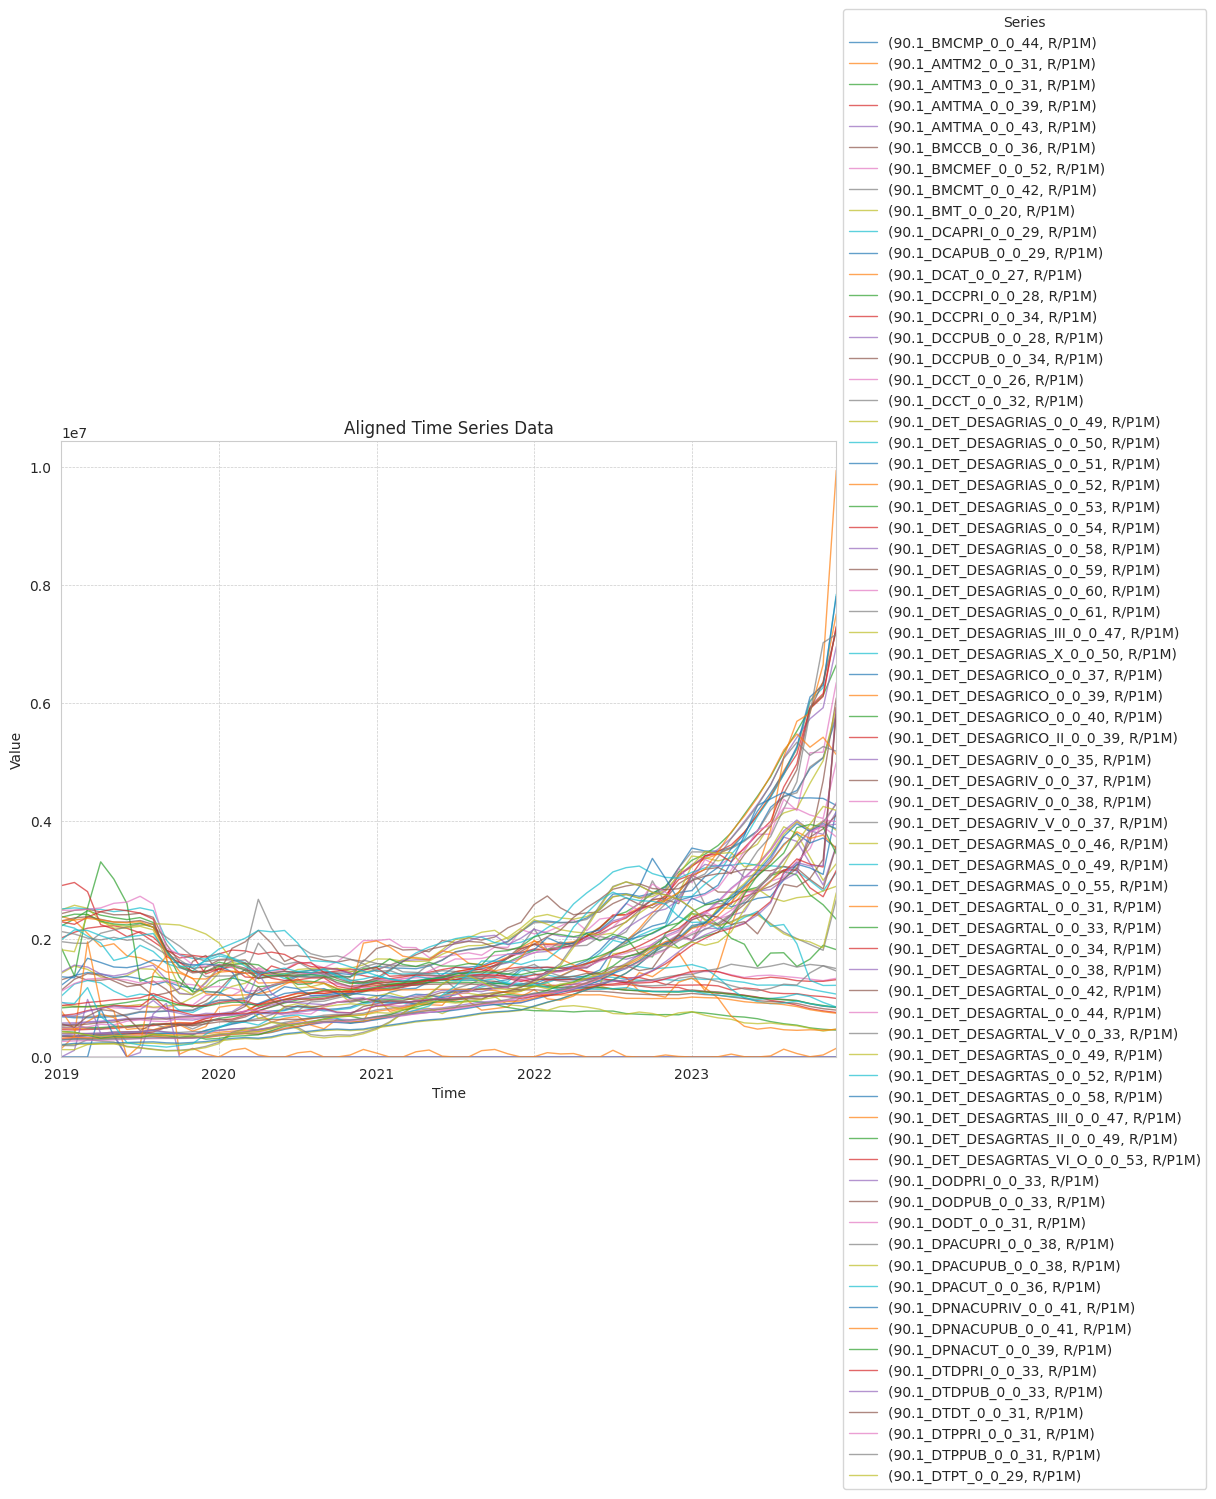

In [223]:
dataset_no = '90.'

data_ = data.loc['2019':'2024']

dataset = data_[[col for col in data_.columns if dataset_no == col[0][:len(dataset_no)]]].dropna(how = 'all')
# dataset.plot()

top_consultas = consultas.loc[consultas.serie_id.str.startswith(dataset_no)].sort_values(by = 'consultas_180_dias', ascending = False)
display(top_consultas.head(10))

aligned_data = align_time_series(dataset, anchor_col=top_consultas.serie_id.values[0])


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

aligned_data.dropna(how='all').plot(ax=ax, linewidth=1, alpha=0.7)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set(ylim=(0, None), title='Aligned Time Series Data', xlabel='Time', ylabel='Value')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Series', fontsize=10)

plt.tight_layout()
plt.show()


In [224]:
LinearRegression().fit(X, y_log)

LinearRegression()

In [225]:
consultas.loc[consultas.serie_id.str.startswith('89.')][['serie_id', 'consultas_180_dias']]

serie_id  consultas_180_dias
19482         89.1_IR_BCRA0_M_0_M_27                  98
19483         89.1_IR_BCRA1_M_0_M_26                6246
19484         89.1_IR_BCRA2_M_0_M_26                 187
19485         89.1_IR_BCRA3_M_0_M_26                 181
19486         89.1_IR_BCRA4_M_0_M_26                 145
19487         89.1_IR_BCRA5_M_0_M_26                 140
19488         89.1_IR_BCRA6_M_0_M_26                 121
19489         89.1_IR_BCRA7_M_0_M_26                  99
19490         89.1_IR_BCRA8_M_0_M_26                 101
19491         89.1_IR_BCRA9_M_0_M_26                  89
19492         89.1_IR_BCRADIA_0_M_36                 240
19493         89.1_IR_BCRAIAS_0_M_37                 228
19494   89.1_IR_BCRAIAS_1_DIA_0_M_37                 217
19495  89.1_IR_BCRAIAS_7_DIAS_0_M_37                 207
19496         89.1_IR_BCRARIA_0_M_34                3268
19497               89.1_TIAC_0_0_26                 546
19498                89.1_TIB_0_0_20                3565
19499               89.1_TICA_0_0_26                 447
19500                89.1_TIC_0_0_18                3483
19501            89.1_TIPF35D_0_0_35                6566
19502            89.1_TIPFM6D_0_0_36                 454
19503                89.1_TIP_0_0_19                 253
19504         89.1_TS_INTEIOS_0_M_32                 136
19505         89.1_TS_INTEIOS_0_M_34                 146
19506         89.1_TS_INTELES_0_M_32                 155
19507         89.1_TS_INTETAS_0_M_30                 152
19508         89.1_TS_INTETOS_0_M_31                 149
19509         89.1_TS_INTETOS_0_M_32                 151
19510         89.2_TS_INTEALL_0_D_18                7268
19511         89.2_TS_INTELAR_0_D_20                7430
19512         89.2_TS_INTE_PM_0_D_16               41563

In [226]:
consultas

serie_id  consultas_total  consultas_30_dias  \
0      1.1_DGCP_D_1993_A_27              261                  5   
1      1.1_DGCP_D_1993_A_30            24711                 15   
2       1.1_DGE_D_1993_A_26              114                 12   
3       1.1_DGI_D_1993_A_19            24528                 15   
4       1.1_OGI_D_1993_A_25              103                 10   
...                     ...              ...                ...   
19886   124.3_TUE_OCTU_0_23               89                  6   
19887     124.3_T_OCTU_0_10               92                  8   
19888      124.3_T_OCTU_0_7              104                  9   
19889   124.3_VSB_OCTU_0_26               78                  6   
19890      124.3_V_OCTU_0_8               91                  8   

       consultas_90_dias  consultas_180_dias  
0                      9                  31  
1                     14                  35  
2                      9                  33  
3                     15                  35  
4                      9                  31  
...                  ...                 ...  
19886                 10                  25  
19887                 10                  27  
19888                 12                  29  
19889                 10                  20  
19890                  8                  26  

[19891 rows x 5 columns]